<a href="https://colab.research.google.com/github/Irina-Na/EDA_and_CDA/blob/main/Highly_permeable_transformer_steel_EDA_CDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import datetime as dt
import calendar
import matplotlib
import scipy
import statsmodels

from matplotlib import pyplot as plt
from sklearn import preprocessing

from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Read and prepair datasets

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dataset.xlsx')

df

–ò–Ω–¥–µ–∫—Å  –ù–æ–º–µ—Ä –ø–∞—Ä—Ç–∏–∏  ...  CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1  CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3
0           0        522350  ...             0.10             0.06
1           1        522350  ...             0.10             0.06
2           2        522350  ...             0.10             0.06
3           3        522350  ...             0.10             0.06
4           4        522350  ...             0.10             0.06
...       ...           ...  ...              ...              ...
12786   12786        522380  ...             0.09             0.05
12787   12787        522380  ...             0.09             0.05
12788   12788        522380  ...             0.09             0.05
12789   12789        522380  ...             0.09             0.05
12790   12790        522380  ...             0.09             0.05

[12791 rows x 120 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12791 entries, 0 to 12790
Columns: 120 entries, –ò–Ω–¥–µ–∫—Å to CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3
dtypes: datetime64[ns](4), float64(100), int64(14), object(2)
memory usage: 11.7+ MB


In [ ]:
df.describe()

–ò–Ω–¥–µ–∫—Å   –ù–æ–º–µ—Ä –ø–∞—Ä—Ç–∏–∏  ...  CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1  CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3
count  12791.000000   12791.000000  ...     12791.000000     12791.000000
mean    6395.000000  522363.075365  ...         0.089100         0.044719
std     3692.587981       8.543076  ...         0.008611         0.007113
min        0.000000  522350.000000  ...         0.065600         0.030000
25%     3197.500000  522356.000000  ...         0.080000         0.040000
50%     6395.000000  522362.000000  ...         0.090000         0.040000
75%     9592.500000  522371.000000  ...         0.100000         0.050000
max    12790.000000  522380.000000  ...         0.110000         0.060000

[8 rows x 114 columns]

In [ ]:
df.astype('object').describe()

–ò–Ω–¥–µ–∫—Å  –ù–æ–º–µ—Ä –ø–∞—Ä—Ç–∏–∏  ...  CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1  CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3
count    12791         12791  ...         12791.00         12791.00
unique   12791            18  ...           102.00            66.00
top      12790        522354  ...             0.09             0.04
freq         1           758  ...          4759.00          5569.00

[4 rows x 120 columns]

Exist many categorical features (with a low count of unique values).

Exist n/a values in –¢–æ—á–∫–∞_—Ä–æ—Å—ã_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1,	–¢–æ—á–∫–∞_—Ä–æ—Å—ã_–≠—Ç–∞–ø1_–∑–æ–Ω–∞2,  CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1,	CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞2  and datetime values

Will not delete rows with nan data before chek correlation with target feature.
For future use we can delete columns with many nan data and delete rows for less nan data if the correlation with this feature is higth.

Exist also non types columns and 4 datetime columns about timedelta only. 
 
### Prepaire:

In [ ]:
df.select_dtypes('object')

–®–û–° –¢–æ–ª—â–∏–Ω–∞_–ø–µ—Ä–µ–¥_—Å–º–æ—Ç–∫–æ–π
0      Melubir 6736/LI             —Ç—Ä–µ–Ω–¥ 2,3
1      Melubir 6736/LI             —Ç—Ä–µ–Ω–¥ 2,3
2      Melubir 6736/LI             —Ç—Ä–µ–Ω–¥ 2,3
3      Melubir 6736/LI             —Ç—Ä–µ–Ω–¥ 2,3
4      Melubir 6736/LI             —Ç—Ä–µ–Ω–¥ 2,3
...                ...                   ...
12786  Melubir 6731/LI     —Ç—Ä–µ–¥–Ω2,3112691771
12787  Melubir 6731/LI     —Ç—Ä–µ–¥–Ω2,3084518828
12788  Melubir 6731/LI     —Ç—Ä–µ–¥–Ω2,3056345886
12789  Melubir 6731/LI     —Ç—Ä–µ–¥–Ω2,3028172943
12790  Melubir 6731/LI              —Ç—Ä–µ–¥–Ω2,3

[12791 rows x 2 columns]

In [ ]:
print(df['–®–û–°'].unique())
shos = pd.CategoricalDtype(categories=df['–®–û–°'].unique(), ordered=False)
df['–®–û–°']= df['–®–û–°'].astype(shos)

['Melubir 6736/LI' 'Melubir 6733/LI' 'Melubir 6739/LI' 'Melubir 6738/LI'
 'Melubir 6731/LI']


In [ ]:
import re
df['–¢–æ–ª—â–∏–Ω–∞_–ø–µ—Ä–µ–¥_—Å–º–æ—Ç–∫–æ–π']=df['–¢–æ–ª—â–∏–Ω–∞_–ø–µ—Ä–µ–¥_—Å–º–æ—Ç–∫–æ–π'].apply(lambda x: float(re.findall('\d+.\d+', x.replace(',', '.') )[0]  ) )
df['–¢–æ–ª—â–∏–Ω–∞_–ø–µ—Ä–µ–¥_—Å–º–æ—Ç–∫–æ–π']

0        2.300000
1        2.300000
2        2.300000
3        2.300000
4        2.300000
           ...   
12786    2.311269
12787    2.308452
12788    2.305635
12789    2.302817
12790    2.300000
Name: –¢–æ–ª—â–∏–Ω–∞_–ø–µ—Ä–µ–¥_—Å–º–æ—Ç–∫–æ–π, Length: 12791, dtype: float64

In [ ]:
df['–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏' ]= df['–í—ã–µ–∑–¥_–∏–∑_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏' ]-df['–ü–æ—Å—Ç—É–ø–ª–µ–Ω–∏–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫—É—é_—Å–µ–∫—Ü–∏—é']
df.drop(['–í—ã–µ–∑–¥_–∏–∑_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏', '–ü–æ—Å—Ç—É–ø–ª–µ–Ω–∏–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫—É—é_—Å–µ–∫—Ü–∏—é'], axis=1,   inplace=True)
df['–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏' ].min(), df['–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏' ].max()
df['–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏' ]=df['–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏' ]/ np.timedelta64(1,'m')
df['–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏' ]

0              NaN
1        44.733333
2        44.733333
3        44.733333
4              NaN
           ...    
12786    45.916667
12787          NaN
12788          NaN
12789    45.916667
12790    45.916667
Name: –í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏, Length: 12791, dtype: float64

In [ ]:
df['–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞' ]= df['–û–∫–æ–Ω—á–∞–Ω–∏–µ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ–≥–æ –æ—Ç–∂–∏–≥–∞' ]-df['–ù–∞—á–∞–ª–æ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ–≥–æ –æ—Ç–∂–∏–≥–∞']
df.drop(['–û–∫–æ–Ω—á–∞–Ω–∏–µ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ–≥–æ –æ—Ç–∂–∏–≥–∞', '–ù–∞—á–∞–ª–æ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ–≥–æ –æ—Ç–∂–∏–≥–∞'], axis=1,   inplace=True)
print(df['–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞' ].min(), df['–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞' ].max())
df['–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞' ]=df['–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞' ]/ np.timedelta64(1,'m')
df['–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞' ]

0 days 00:43:50 0 days 00:45:55


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
12786          NaN
12787          NaN
12788    45.916667
12789          NaN
12790          NaN
Name: –í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞, Length: 12791, dtype: float64

### Group and order parameters by stages:

In [ ]:
param=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Parameters.xlsx')
param

–ù–∞–∑–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞  ... –ù–æ–º–µ—Ä –ø–ø
0                                           –î–ª–∏–Ω–∞_–ì–ü  ...        2
1                                T_–∑–∞_—Å—Ä–µ–¥–Ω–µ–π_–∫–ª–µ—Ç—å—é  ...        2
2                                    T_–∫–æ–Ω—Ü–∞_–ø—Ä–æ–∫–∞—Ç–∞  ...        2
3                                           T_—Ä—É–ª–æ–Ω–∞  ...        2
4                              –¢–æ–ª—â–∏–Ω–∞_–ø–µ—Ä–µ–¥_—Å–º–æ—Ç–∫–æ–π  ...        2
..                                               ...  ...      ...
115                                       T_–ø—Ä–æ—Ö–æ–¥_5  ...        4
116                                       T_–ø—Ä–æ—Ö–æ–¥_2  ...        4
117                                       T_–ø—Ä–æ—Ö–æ–¥_4  ...        4
118  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_–ø–æ–ª–æ—Å—ã_–Ω–∞_–≤—ã—Ö–æ–¥–µ_—Ä–µ–≤–µ—Ä—Å–∏–≤–Ω–æ–≥–æ —Å—Ç–∞–Ω–∞  ...        4
119       –¢—Ä–µ–Ω–¥_—Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã_–ø–µ—Ä–µ–¥_—Ä–µ–≤–µ—Ä—Å–∏–≤–Ω—ã–º_—Å—Ç–∞–Ω–æ–º  ...        4

[120 rows x 4 columns]

In [ ]:
#Add new parameters, delete uselessly
param=param.replace('–í—ã–µ–∑–¥_–∏–∑_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏', '–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏', regex=True)
param=param.replace('–û–∫–æ–Ω—á–∞–Ω–∏–µ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ–≥–æ –æ—Ç–∂–∏–≥–∞', '–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞', regex=True)
param=param[~param['–ù–∞–∑–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞'].isin(['–ü–æ—Å—Ç—É–ø–ª–µ–Ω–∏–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫—É—é_—Å–µ–∫—Ü–∏—é', '–ù–∞—á–∞–ª–æ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ–≥–æ –æ—Ç–∂–∏–≥–∞'])]
print (param['–≠—Ç–∞–ø –æ–±—Ä–∞–±–æ—Ç–∫–∏'].unique())
#param[param['–≠—Ç–∞–ø –æ–±—Ä–∞–±–æ—Ç–∫–∏'].isin(['–û–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏–µ']) ]


['–ì–æ—Ä—è—á–∏–π –ø—Ä–æ–∫–∞—Ç' '–ú–∞–≥–Ω–∏—Ç–Ω—ã–µ —Å–≤–æ–π—Å—Ç–≤–∞' '–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è' '–û–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏–µ'
 '–û–±—â–∏–µ –¥–∞–Ω–Ω—ã–µ' '–•–∏–º–∏—è –ø–ª–∞–≤–∫–∏' '–•–∏–º–∏—è –∏—Ç–æ–≥' '–•–æ–ª–æ–¥–Ω—ã–π –ø—Ä–æ–∫–∞—Ç']


In [ ]:
param['–≠—Ç–∞–ø_–æ–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏—è']=param['–ù–∞–∑–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞'].apply(lambda x: 0 if '–≠—Ç–∞–ø' not in x else int(re.findall('–≠—Ç–∞–ø\d', x)[0][4:])  )
param['–ó–æ–Ω–∞_–æ–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏—è']=param['–ù–∞–∑–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞'].apply(lambda x: 0 if '–∑–æ–Ω–∞' not in x else int(re.findall('–∑–æ–Ω–∞\d', x)[0][4:])  )
param.sort_values(['–ù–æ–º–µ—Ä –ø–ø', '–≠—Ç–∞–ø_–æ–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏—è',	'–ó–æ–Ω–∞_–æ–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏—è'], ascending=[True, True, True], inplace=True, ignore_index=True)
param[48:100]

–ù–∞–∑–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞  ... –ó–æ–Ω–∞_–æ–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏—è
48                               CO2_–≠—Ç–∞–ø1  ...                      0
49                                H2_–≠—Ç–∞–ø1  ...                      0
50                           T_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1  ...                      1
51                  –¢–æ—á–∫–∞_—Ä–æ—Å—ã_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1  ...                      1
52                          CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1  ...                      1
53                           T_–≠—Ç–∞–ø1_–∑–æ–Ω–∞2  ...                      2
54                  –¢–æ—á–∫–∞_—Ä–æ—Å—ã_–≠—Ç–∞–ø1_–∑–æ–Ω–∞2  ...                      2
55                          CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞2  ...                      2
56                           T_–≠—Ç–∞–ø1_–∑–æ–Ω–∞3  ...                      3
57                           T_–≠—Ç–∞–ø1_–∑–æ–Ω–∞4  ...                      4
58                           T_–≠—Ç–∞–ø1_–∑–æ–Ω–∞5  ...                      5
59                           T_–≠—Ç–∞–ø1_–∑–æ–Ω–∞6  ...                      6
60                          CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1  ...                      1
61                         CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1  ...                      1
62                          H2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1  ...                      1
63                           T_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1  ...                      1
64                          CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞2  ...                      2
65                          H2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞2  ...                      2
66                           T_–≠—Ç–∞–ø2_–∑–æ–Ω–∞2  ...                      2
67                  –¢–æ—á–∫–∞_—Ä–æ—Å—ã_–≠—Ç–∞–ø2_–∑–æ–Ω–∞2  ...                      2
68                          CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3  ...                      3
69                         CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3  ...                      3
70                          H2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3  ...                      3
71                           T_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3  ...                      3
72                  –¢–æ—á–∫–∞_—Ä–æ—Å—ã_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3  ...                      3
73                          CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞4  ...                      4
74  –ö–∞–ª–∏–±—Ä–æ–≤–∞–Ω–Ω–æ–µ_–∑–Ω–∞—á–µ–Ω–∏–µ_CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞4  ...                      4
75       –ù–∞—Å—Ç—Ä–æ–π–∫–∞_–¥–∞—Ç—á–∏–∫–∞_CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞4  ...                      4
76                          H2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞4  ...                      4
77                           T_–≠—Ç–∞–ø2_–∑–æ–Ω–∞4  ...                      4
78                          CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞5  ...                      5
79                           T_–≠—Ç–∞–ø2_–∑–æ–Ω–∞5  ...                      5
80                         CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞5  ...                      5
81                          H2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞5  ...                      5
82                           T_–≠—Ç–∞–ø2_–∑–æ–Ω–∞6  ...                      6
83                           T_–≠—Ç–∞–ø2_–∑–æ–Ω–∞7  ...                      7
84                          H2_–≠—Ç–∞–ø3_–∑–æ–Ω–∞1  ...                      1
85                         NH3_–≠—Ç–∞–ø3_–∑–æ–Ω–∞1  ...                      1
86                           T_–≠—Ç–∞–ø3_–∑–æ–Ω–∞1  ...                      1
87                          H2_–≠—Ç–∞–ø3_–∑–æ–Ω–∞2  ...                      2
88                         NH3_–≠—Ç–∞–ø3_–∑–æ–Ω–∞2  ...                      2
89                           T_–≠—Ç–∞–ø3_–∑–æ–Ω–∞2  ...                      2
90                         NH3_–≠—Ç–∞–ø3_–∑–æ–Ω–∞3  ...                      3
91                          H2_–≠—Ç–∞–ø3_–∑–æ–Ω–∞3  ...                      3
92                           T_–≠—Ç–∞–ø3_–∑–æ–Ω–∞3  ...                      3
93                           T_–≠—Ç–∞–ø3_–∑–æ–Ω–∞4  ...                      4
94                          H2_–≠—Ç–∞–ø4_–∑–æ–Ω–∞1  ...                      1
95                           –¢_–≠—Ç–∞–ø4_–∑–æ–Ω–∞1  ...                      1
96                  –¢–æ—á–∫–∞_—Ä–æ—Å—ã_–≠—Ç–∞–ø4_–∑–æ–Ω–

In [ ]:
df=df[param['–ù–∞–∑–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞'].to_numpy()]
df.columns==param['–ù–∞–∑–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞'].to_numpy()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Dataset ordered in the stages order

In [ ]:
#Made dict of paramerts on each stage
stages = {}
#Use stages range from tasks description:
for s in { '–•–∏–º–∏—è –ø–ª–∞–≤–∫–∏',  '–ì–æ—Ä—è—á–∏–π –ø—Ä–æ–∫–∞—Ç', '–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è', '–•–æ–ª–æ–¥–Ω—ã–π –ø—Ä–æ–∫–∞—Ç', '–û–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏–µ', '–•–∏–º–∏—è –∏—Ç–æ–≥'}:
  stages[s]= param['–ù–∞–∑–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞'][param['–≠—Ç–∞–ø –æ–±—Ä–∞–±–æ—Ç–∫–∏'].isin([s])].to_list()

In [ ]:
decarbonization = pd.DataFrame(param['–ù–∞–∑–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞'][param['–≠—Ç–∞–ø –æ–±—Ä–∞–±–æ—Ç–∫–∏'].isin(['–û–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏–µ']) ])
decarbonization['–≠—Ç–∞–ø_–æ–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏—è']=decarbonization['–ù–∞–∑–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞'].apply(lambda x: 0 if '–≠—Ç–∞–ø' not in x else int(re.findall('–≠—Ç–∞–ø\d', x)[0][4:])  )
decarbonization['–ó–æ–Ω–∞_–æ–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏—è']=decarbonization['–ù–∞–∑–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞'].apply(lambda x: 0 if '–∑–æ–Ω–∞' not in x else int(re.findall('–∑–æ–Ω–∞\d', x)[0][4:])  )
decarbonization.sort_values(['–≠—Ç–∞–ø_–æ–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏—è',	'–ó–æ–Ω–∞_–æ–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏—è'], ascending=[True, True], inplace=True, ignore_index=True)


In [ ]:
list(range(1,6))

[1, 2, 3, 4, 5]

In [ ]:
#numerical features for correlation:
num_param=param['–ù–∞–∑–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞'][param['–ù–æ–º–µ—Ä –ø–ø'].isin(list(range(2,6)))].to_list()


# **Statement**

–î–ª—è –æ—Ç–±–æ—Ä–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º—ã –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ñ–∏–ª—å—Ç—Ä—ã –∏ –æ–±–µ—Ä—Ç–∫–∏, –∞ —Ç–∞–∫–∂–µ –∏—Ö —Å—Ç–µ–∫–∏ (–≥–∏–±—Ä–∏–¥–Ω—ã–µ –º–µ—Ç–æ–¥—ã). –í —Ä–∞–º–∫–∞—Ö —ç—Ç–æ–≥–æ –¢–ó —è –±—É–¥—É –æ–ø–µ—Ä–∏—Ä–æ–≤–∞—Ç—å —Ç–æ–ª—å–∫–æ —Ñ–∏–ª—å—Ç—Ä–∞–º–∏ –≤ —Å–≤—è–∑–∏ —Å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è–º–∏ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.


–î–∞–ª–µ–µ –≤ –¥–≤—É—Ö —Ä–∞–∑–¥–µ–ª–∞—Ö –±—É–¥—É—Ç –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω—ã –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø–æ —ç—Ç–∞–ø–∞–º, –≤—ã–¥–≤–∏–Ω—É—Ç—ã –≥–∏–ø–æ—Ç–µ–∑—ã –∏ –ø—Ä–æ–≤–µ—Ä–µ–Ω—ã –∫—Ä–∏—Ç–µ—Ä–∏—è–º–∏ (–•–∏-–∫–≤–∞–¥—Ä–∞—Ç –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∏ –°—Ç—å—é–¥–µ–Ω—Ç–æ–º –¥–ª—è –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã—Ö —á–∏—Å–ª–æ–≤—ã—Ö). –ó–Ω–∞—á–µ–Ω–∏—è –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–µ–Ω–Ω–æ –≤–∫–ª–∞–¥–∞ –±—É–¥—É—Ç –æ—Ü–µ–Ω–µ–Ω—ã –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –ø–æ CFS (Correlation-based feature selection, –æ—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏). –û–¥–Ω–∞–∫–æ —É –Ω–∞—Å –µ—Å—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ —Ç–∏–ø—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Ç—É—Ç –ø–æ–ª—É—á–∏—Ç—Å—è –Ω–µ–º–Ω–æ–≥–æ —Å–ª–æ–∂–Ω–µ–µ (—Ä–∞–∑—ã–Ω–µ –ø–æ–¥—Ö–æ–¥—ã –∫ –æ—Ü–µ–Ω–∫–µ), –≤ –¥–æ–±–∞–≤–æ–∫ —Å–Ω–∞—á–∞–ª–∞ –º—ã –æ—Ü–µ–Ω–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å —Ü–µ–ª–µ–≤—ã–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–º, –∑–∞—Ç–µ–º –±—É–¥–µ—Ç –ø—Ä–æ–¥–ª–æ–∂–µ–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å –∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å –∏ –∏—Å–∫–ª—é—á–∏—Ç—å —á–∞—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ —ç—Ç–æ–º—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—é.

–°–æ–∑–¥–∞–¥–∏–º —Å—Ä–∞–∑—É —Å–ø–∏—Å–æ–∫ –±–µ—Å–ø–æ–ª–µ–∑–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –î–∏—Å–ø–µ—Ä—Å–∏–∏. –ë—ã–ª–æ –ø–æ–∫–∞–∑–∞–Ω–æ, —á—Ç–æ –æ—Ü–µ–Ω–∫–∞ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞ –º–æ–∂–µ—Ç –±—ã—Ç—å —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–º —Å–ø–æ—Å–æ–±–æ–º –æ—Ç–±–æ—Ä–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ö–∞–∫ –ø—Ä–∞–≤–∏–ª–æ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø–æ—á—Ç–∏ –Ω—É–ª–µ–≤–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π –Ω–µ —è–≤–ª—è—é—Ç—Å—è –∑–Ω–∞—á–∏–º—ã–º–∏, –∏ –∏—Ö –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å.

In [ ]:
selector = VarianceThreshold()
selector.fit_transform(df)
selector= selector.get_feature_names_out(df.columns)
unuseful_param=[i for i in df.columns if i not in selector]
unuseful_param

ValueError: ignored

In [ ]:
"""df.drop(columns=unuseful_param, inplace=True)
param=param[~param['–ù–∞–∑–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞'].isin(unuseful_param)]
#Made dict of paramerts on each stage
stages = {}
#Use stages range from tasks description:
for s in { '–•–∏–º–∏—è –ø–ª–∞–≤–∫–∏',  '–ì–æ—Ä—è—á–∏–π –ø—Ä–æ–∫–∞—Ç', '–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è', '–•–æ–ª–æ–¥–Ω—ã–π –ø—Ä–æ–∫–∞—Ç', '–û–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏–µ', '–•–∏–º–∏—è –∏—Ç–æ–≥'}:
  stages[s]= param['–ù–∞–∑–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞'][param['–≠—Ç–∞–ø –æ–±—Ä–∞–±–æ—Ç–∫–∏'].isin([s])].to_list()
"""

# Medians analysis and visualisation

### Made –£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç feature

–°—Ç–æ–∏—Ç –ø–æ–º–Ω–∏—Ç—å –æ —Ç–æ–º, —á—Ç–æ –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–µ—è–µ—Ç—Å—è –≤–µ–ª–∏—á–∏–Ω–æ–π —É–¥–µ–ª—å–Ω—ã—Ö –º–∞–≥–Ω–∏—Ç–Ω—ã—Ö –ø–æ—Ç–µ—Ä—å, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –º—ã –º–æ–∂–µ–º –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫ –∫–∞–∫ –±–∏–Ω–æ–º–∏–Ω–∞–ª—å–Ω—É—é –≤–µ–ª–∏—á–∏–Ω—É:

In [ ]:
df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç']=df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏']< 1.1
df.loc[:,'–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç']=df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'].astype(int)
cat = pd.CategoricalDtype(categories=[0, 1], ordered=False)
df.loc[:,'–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç']=df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'].astype(cat)
df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'].value_counts()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


0    6551
1    6240
Name: –£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç, dtype: int64

–ë–æ–ª—å—à–µ –ø–æ–ª–æ–≤–∏–Ω—ã –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –Ω–µ–∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–∞—è, –∑–∞—Ç–æ –±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤). 

## –ü–æc–º–æ—Ç—Ä–∏–º –∫–∞–∫ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –¥–ª—è –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∏ –Ω–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏

–≠—Ç—É –ø—Ä–µ–¥–≤–∞—Ä–∏–∞—Ç–µ–ª—å–Ω—É—é –≥—Ä—É–±—É—é –æ—Ü–µ–Ω–∫—É –º—ã –º–æ–∂–µ–º –ø—Ä–∏–º–µ–Ω–∏—Ç—å –Ω–µ —Ç–æ–ª—å–∫–æ –∫ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã—Ö —á–∏—Å–ª–æ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º, –Ω–æ –∏ –ø–æ—á—Ç–∏ –∫–æ –≤—Å–µ–º –æ—Å—Ç–∞–ª—å–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º —Å –Ω–µ–±–æ–ª—å—à–∏–º —á–∏—Å–ª–æ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –ø–æ—Å–∫–æ–ª—å–∫—É —Ö–æ—Ç—å –æ–Ω–∏ –∏ –∏–º–µ—é—Ç –Ω–µ–±–æ–ª—å—à–æ–µ —á–∏—Å–ª–æ —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –Ω–æ –ø–æ —Å—É—Ç–∏ –∏–º–µ—é—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é, —á–∏—Å–ª–æ–≤—É—é –ø—Ä–∏—Ä–æ–¥—É. –í —Å–ª–µ–¥—Å—Ç–≤–∏–∏ —ç—Ç–æ–≥–æ –æ—Ü–µ–Ω–∫–∞ —Å—Ä–µ–¥–Ω–∏—Ö, –º–µ–¥–∏–∞–Ω—ã –∏ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –±—É–¥–µ—Ç –∏–º–µ—Ç—å –≤–µ—Ä–Ω—ã–π —Å–º—ã—Å–ª. –ö—Ä–æ–º–µ –®–û–° - —ç—Ç–æ –Ω–µ —á–∏—Å–ª–æ–≤–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å—ã–Ω–π –ø–∞—Ä–∞–º–µ—Ç—Ä. –£–¥–∞–ª–∏–º –µ–≥–æ –∏–∑ –∞–Ω–∞–ª–∏–∑–∞

In [ ]:
# –†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ç–æ–ª—å–∫–æ —ç—Ç–∞–ø–æ–≤ –æ–±—Ä–∞–±–æ—Ç–∫–∏/–≤–æ–∑–¥–µ–π—Å—Ç–≤–∏—è + —Ö–∏–º–∏—á–µ—Å–∫–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –Ω–∞ —ç—Ç–∞–ø–µ –ø–ª–∞–≤–∫–∏:
useful_param=list(param['–ù–∞–∑–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞'][param['–ù–æ–º–µ—Ä –ø–ø'].isin(list(range(1,6)))].unique())
useful_param.remove('–®–û–°')
for i in unuseful_param:
  useful_param.remove(i)
#num_param=[i for i in useful_param if df[i].nunique()>66] 
#cat_param=[i for i in useful_param if df[i].nunique()<66] 

In [ ]:
param['–≠—Ç–∞–ø –æ–±—Ä–∞–±–æ—Ç–∫–∏'][param['–ù–æ–º–µ—Ä –ø–ø'].isin(list(range(1,6)))].unique()

array(['–•–∏–º–∏—è –ø–ª–∞–≤–∫–∏', '–ì–æ—Ä—è—á–∏–π –ø—Ä–æ–∫–∞—Ç', '–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è',
       '–•–æ–ª–æ–¥–Ω—ã–π –ø—Ä–æ–∫–∞—Ç', '–û–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏–µ'], dtype=object)

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏  –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞  –≥—Ä–∞—Ñ–∏–∫–∏ –æ—Ç–ª–∏—á–∏—è —Å—Ä–µ–¥–Ω–∏—Ö.

–í—ã–±–∏—Ä–∞—è –º–µ–∂–¥—É MinMaxScaler –∏ StandartScaler, –±—É–¥–µ–º –∏–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø–æ—Å–ª–µ–¥–Ω–∏–π, –ø–æ—Å–∫–æ–ª—å–∫—É –æ–Ω –±–æ–ª–µ–µ —É—Å—Ç–æ–π—á–∏–≤ –∫ –≤—ã–±—Ä–æ—Å–∞–º, –∫–æ—Ç–æ—Ä—ã—Ö —É –Ω–∞—Å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –º–Ω–æ–≥–æ, –∫–∞–∫ –±—É–¥–µ—Ç –≤–∏–¥–Ω–æ –Ω–∞ —ç—Ç–∞–ø–∞—Ö –∞–Ω–∞–ª–∏–∑–∞ –Ω–∏–∂–µ. 

In [ ]:
scaler = StandardScaler()

df_scaler = pd.DataFrame(columns=df[useful_param].columns,  data=scaler.fit_transform(df[useful_param]) )
#df_scaler=pd.concat([  df_scaler, df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç']], axis=1)

df_scaler

N        Al  ...  –¢_–≠—Ç–∞–ø5_–∑–æ–Ω–∞1  –¢_–≠—Ç–∞–ø5_–∑–æ–Ω–∞2
0      1.671609 -1.157042  ...       1.124587       0.642613
1      1.671609 -1.157042  ...       1.146860       0.645630
2      1.671609 -1.157042  ...       1.148499       0.686973
3      1.671609 -1.157042  ...       1.167302       0.837557
4      1.671609 -1.157042  ...       1.219582       0.977002
...         ...       ...  ...            ...            ...
12786 -0.023994  1.035348  ...       0.577126      -0.948217
12787 -0.023994  1.035348  ...       0.448539      -0.984821
12788 -0.023994  1.035348  ...       0.352591      -0.998225
12789 -0.023994  1.035348  ...       0.350492      -0.937033
12790 -0.023994  1.035348  ...       0.350492      -0.936339

[12791 rows x 83 columns]

–ë—É–¥–µ–º —Å–º–æ—Ç—Ä–µ—Ç—å —Ç–∞–∫–∂–µ –Ω–∞ –º–µ–¥–∏–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–∞–∂–¥–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞, —á—Ç–æ–±—ã –º–µ–Ω—å—à–µ —É—á–∏—Ç—ã–≤–∞—Ç—å –≤–∫–ª–∞–¥ –≤—ã–±—Ä–æ—Å–æ–≤

                               0         1
–î–ª–∏–Ω–∞_–ì–ü                0.026287 -0.051080
T_–∑–∞_—Å—Ä–µ–¥–Ω–µ–π_–∫–ª–µ—Ç—å—é    -0.136867  0.305127
T_–∫–æ–Ω—Ü–∞_–ø—Ä–æ–∫–∞—Ç–∞        -0.397473  0.307837
T_—Ä—É–ª–æ–Ω–∞                0.005300 -0.064027
–¢–æ–ª—â–∏–Ω–∞_–ø–µ—Ä–µ–¥_—Å–º–æ—Ç–∫–æ–π   0.220807 -0.127778
...                          ...       ...
–¢_–≠—Ç–∞–ø4_–∑–æ–Ω–∞1          -0.049793  0.218259
–¢–æ—á–∫–∞_—Ä–æ—Å—ã_–≠—Ç–∞–ø4_–∑–æ–Ω–∞1 -0.412290 -0.219436
–¢_–≠—Ç–∞–ø4_–∑–æ–Ω–∞2          -0.095775 -0.028480
–¢_–≠—Ç–∞–ø5_–∑–æ–Ω–∞1           0.053832  0.092752
–¢_–≠—Ç–∞–ø5_–∑–æ–Ω–∞2          -0.140647 -0.140647

[71 rows x 2 columns]


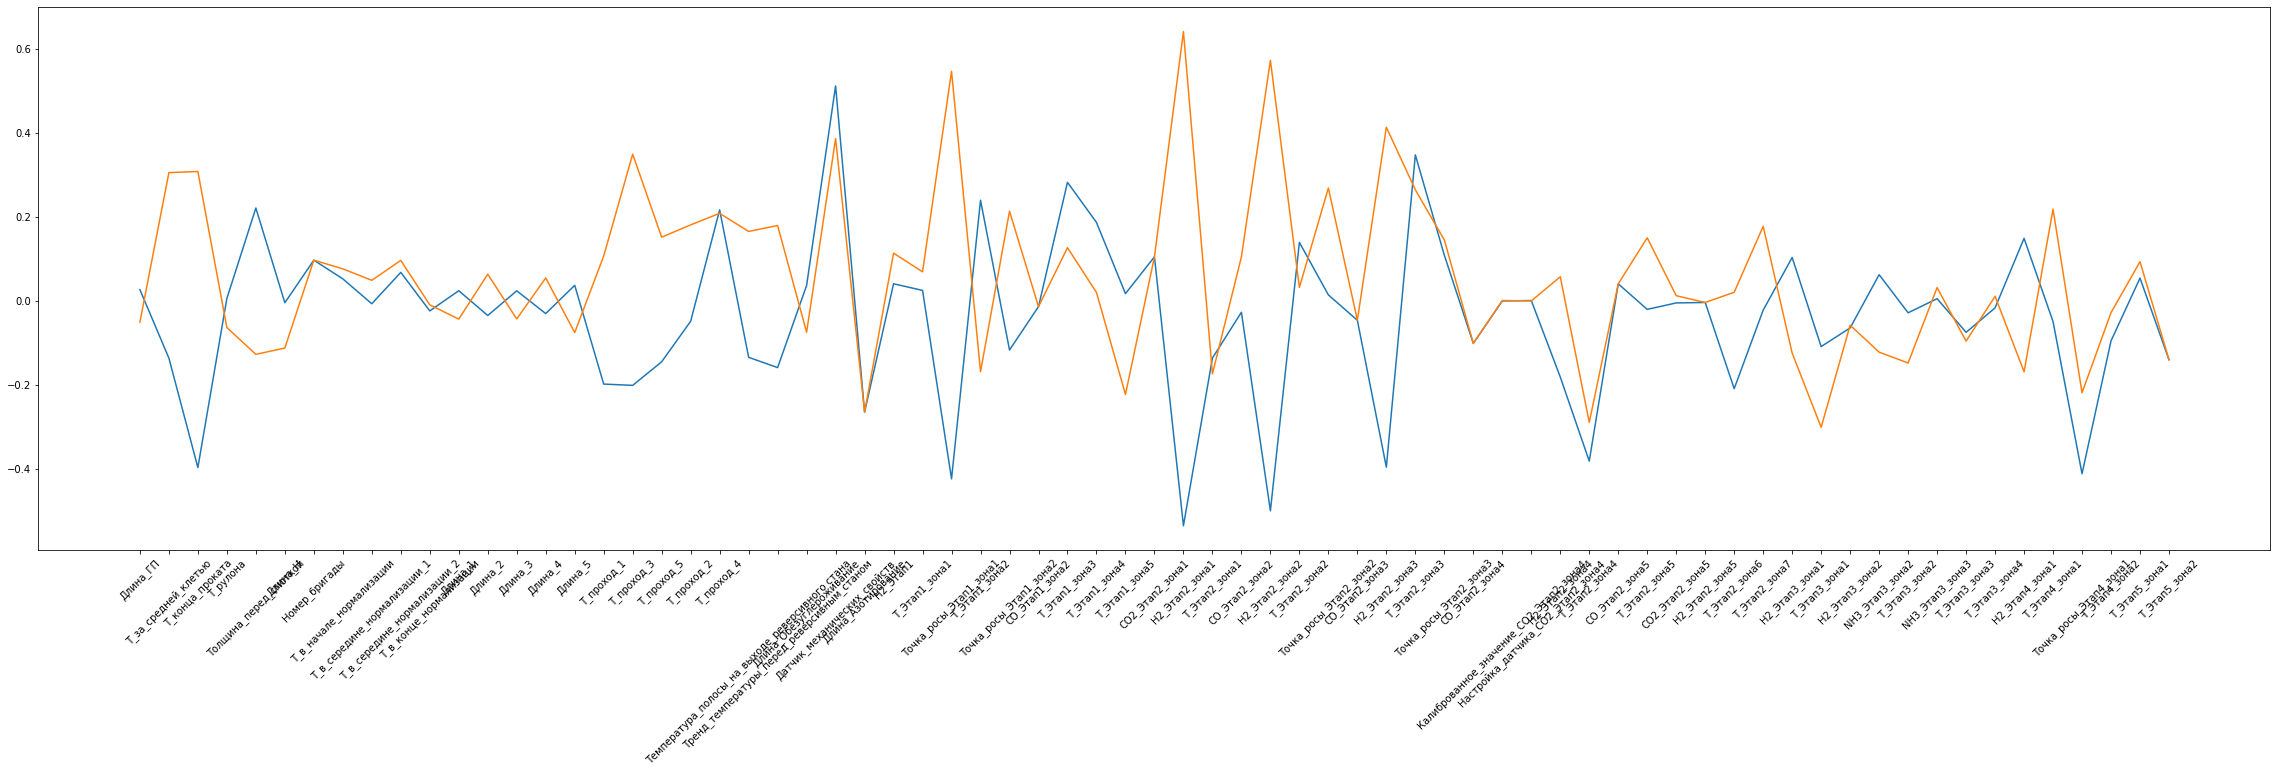

In [ ]:
df_num_quality=pd.concat([df_scaler [num_param] [df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0 ].median(), df_scaler [num_param] [df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1 ].median()], axis=1 )
print(df_num_quality)
fig, ax = plt.subplots( figsize=(40,10))
ax.plot(df_num_quality)
labels = ax.set_xticklabels(df_num_quality.index,  fontsize = 10, rotation = 45)
plt.show()

–í–∏–¥–∏–º, —á—Ç–æ –º–µ–¥–∏–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è —á–∞—Å—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∑–µ—Ä–∫–∞–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –Ω–∞ –¥–≤—É—Ö –≤—ã–±–æ—Ä–∫–∞—Ö. –ü–æ—Å–º–æ—Ç—Ä–∏–º –æ—Ç–ª–∏—á–∏—è –¥–ª—è —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π (—á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–µ–µ –∫ –≤—ã–±—Ä–æ—Å–∞–º). 

                               0         1
N                      -0.344944  0.362136
Al                      0.388775 -0.408151
Si                      0.007462 -0.007834
Mn                      0.041448 -0.043513
Sn                     -0.054912  0.057648
...                          ...       ...
–¢_–≠—Ç–∞–ø4_–∑–æ–Ω–∞1          -0.086323  0.090626
–¢–æ—á–∫–∞_—Ä–æ—Å—ã_–≠—Ç–∞–ø4_–∑–æ–Ω–∞1 -0.024045  0.025244
–¢_–≠—Ç–∞–ø4_–∑–æ–Ω–∞2          -0.034124  0.035825
–¢_–≠—Ç–∞–ø5_–∑–æ–Ω–∞1          -0.002885  0.003029
–¢_–≠—Ç–∞–ø5_–∑–æ–Ω–∞2          -0.019974  0.020970

[83 rows x 2 columns]


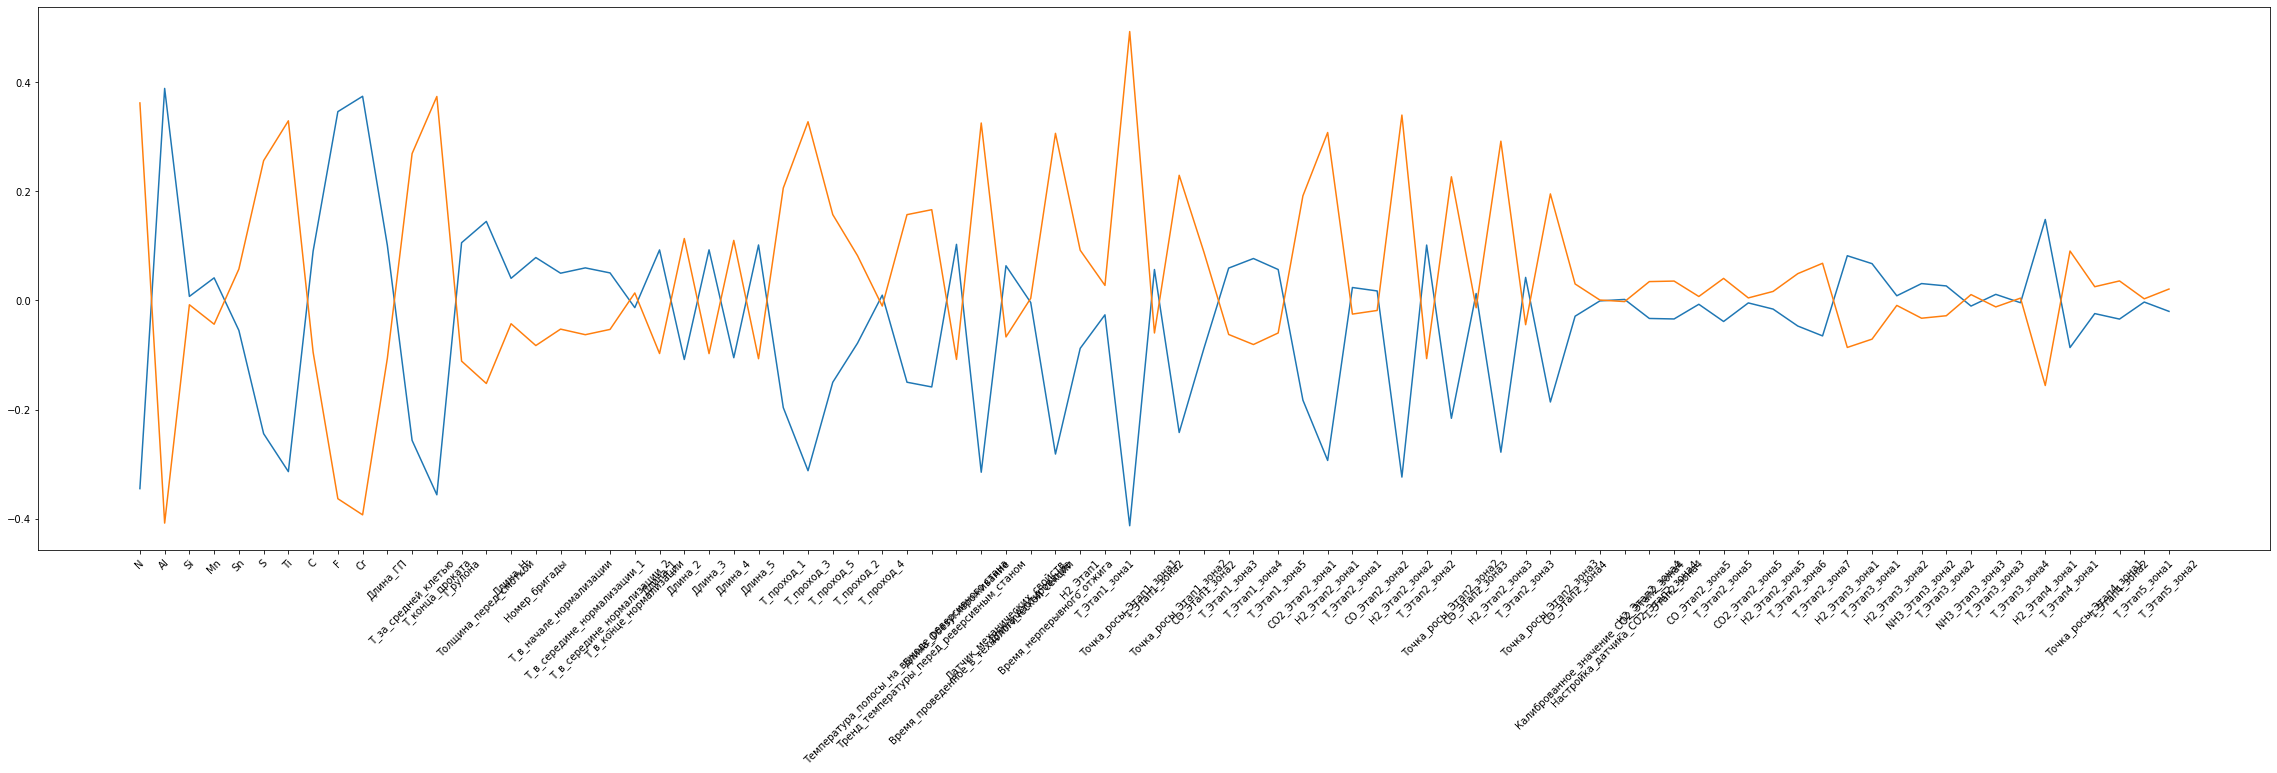

In [ ]:
df_quality=pd.concat([df_scaler [useful_param] [df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0 ].mean(), df_scaler [useful_param] [df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1 ].mean()], axis=1 )
print(df_quality)
fig, ax = plt.subplots( figsize=(40,10))
ax.plot(df_quality)
labels = ax.set_xticklabels(df_quality.index,  fontsize = 10, rotation = 45)
plt.show()

–í–∏–¥–∏–º —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–µ (–º.–æ.) –¥–ª—è –¥–≤—É—Ö –≤—ã–±–æ—Ä–æ–∫ –±—É–∫–≤–∞–ª—å–Ω–æ –∑–µ—Ä–∫–∞–ª—è—Ç –¥—Ä—É–≥ –¥—Ä—É–≥–∞ –Ω–∞ –≤—Å–µ—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö. –ß—Ç–æ –¥–æ–ª–∂–Ω–æ –≥–æ–≤–æ—Ä–∏—Ç—å –æ –Ω–∞–ª–∏—á–∏–∏ –æ–±—Ä–∞—Ç–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –∏ —á—Ç–æ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–º–µ—é—Ç –≤–ª–∏—è–Ω–∏–µ –Ω–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏. –ü—Ä–æ–≤–µ—Ä–∏–º —ç—Ç—É –≥–∏–ø–æ—Ç–µ–∑—É –≤ —Å–ª–µ–¥—É—é—â–µ–º —Ä–∞–∑–¥–µ–ª–µ

–í–∞–∂–Ω–æ—Å—Ç—å –≤–∫–ª–∞–¥–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–∂–µ—Ç –±—ã—Ç—å –æ—Ü–µ–Ω–µ–Ω–∞ –∫–æ–ª–æ–Ω–∫–æ–π diff –≤ —Ç–∞–±–ª–∏—Ü–µ –Ω–∏–∂–µ. –≠—Ç–æ —Ä–∞–∑–Ω–∏—Ü–∞ —Å—Ä–µ–¥–Ω–∏—Ö. –ò–º–µ–Ω–Ω–æ —Ç–∞–∫ —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –º–µ—Ä—É —Å–∏–ª—ã –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –ø–∞—Ä –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä–∞–∑–Ω—ã—Ö —Ç–∏–ø–æ–≤, –∫–∞–∫ —Ä–∞–∑–Ω–∏—Ü—É –º.–æ. –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –Ω–∞ –æ–±—å–µ–∫—Ç–∞—Ö, –ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏ —á—Ç–æ –≤—Ç–æ—Ä–æ–π –ø–∞—Ä–∞–º–µ—Ç—Ä –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∏—Ç –æ–¥–Ω–æ–π –∏ –¥—Ä—É–≥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏:

–í–µ–ª–∏—á–∏–Ω–∞ —ç—Ç–æ –Ω–µ –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–∞—è, —Ç–∞–∫ —á—Ç–æ –≤ —Ü–µ–ª—è—Ö —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Å–∏–ª—ã –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –º–µ–∂–¥—É —Ä–∞–∑–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –º—ã –∫–∞–∫ —Ä–∞–∑ –∏—Å–ø–æ–ª—å–∑—É–µ–º –º–∞—Å—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

In [ ]:
df_quality['diff']=abs(df_quality[0]-df_quality[1])
df_quality.sort_values('diff', ascending=False, inplace=True)#[df_quality['diff']>1]
df_quality

0         1      diff
–¢–æ—á–∫–∞_—Ä–æ—Å—ã_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1                 -0.412990  0.493032  0.906022
Al                                      0.388775 -0.408151  0.796926
Cr                                      0.374366 -0.393024  0.767389
T_–∫–æ–Ω—Ü–∞_–ø—Ä–æ–∫–∞—Ç–∞                        -0.356240  0.373995  0.730234
F                                       0.346214 -0.363470  0.709684
...                                          ...       ...       ...
T_–≠—Ç–∞–ø3_–∑–æ–Ω–∞4                          -0.004123  0.004328  0.008451
–î–ª–∏–Ω–∞_–ê–∑–æ—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ                     -0.003822  0.004012  0.007834
–¢_–≠—Ç–∞–ø5_–∑–æ–Ω–∞1                          -0.002885  0.003029  0.005915
–ù–∞—Å—Ç—Ä–æ–π–∫–∞_–¥–∞—Ç—á–∏–∫–∞_CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞4       0.001932 -0.002028  0.003960
–ö–∞–ª–∏–±—Ä–æ–≤–∞–Ω–Ω–æ–µ_–∑–Ω–∞—á–µ–Ω–∏–µ_CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞4 -0.000805  0.000845  0.001649

[83 rows x 3 columns]

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –º—ã –Ω–∞–±–ª—é–¥–∞–µ–º —Å–≤—è–∑—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –ü–æ—Å–º–æ—Ç—Ä–∏–º 
–ø–æ–¥—Ä–æ–±–Ω–µ–µ –Ω–∞ –∫–∞–∂–¥—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä –∏ –∫–∞–∫–æ–µ –≤–ª–∏—è–Ω–∏–µ –æ–Ω –æ–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ü–µ–ª–µ–≤–æ–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å. –û—Ü–µ–Ω–∏–º –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –∫—Ä–∏—Ç–µ—Ä–∏–µ–º –°—Ç—å—é–¥–µ–Ω—Ç–∞ –¥–ª—è –Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω—ã—Ö —á–∏—Å–ª–æ–≤—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –∫—Ä–∏–µ—Ç—Ä–∏–µ–º –ö—Å–∏ –∫–≤–∞–¥—Ä–∞—Ç –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö.

# Data Visualisation and the dependence of parameters on the target function

–£ –Ω–∞—Å –≤—Å–µ–≥–æ, –ø–æ —Å—É—Ç–∏, –±—É–¥–µ—Ç –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–æ –º–µ–Ω–µ–µ 120 –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –±–æ–ª–µ–µ 12 —Ç—ã—Å. –ø—Ä–∏–º–µ—Ä–æ–≤, —Ç–æ –µ—Å—Ç—å –ø—Ä–æ–≤–µ—Ä–µ–Ω–æ –º–µ–Ω–µ–µ 120 –≥–∏–ø–æ—Ç–µ–∑, –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö –ø–æ–ª–æ–≤–∏–Ω–∞ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏, –æ—Ü–µ–Ω–∏–≤–∞–µ–º—ã–µ –∫—Ä–∏–µ—Ç—Ä–∏–µ–º –°—Ç—å—é–¥–µ–Ω—Ç–∞. –ü–æ—ç—Ç–æ–º—É –º—ã –Ω–µ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø–æ–ø—Ä–∞–≤–∫–∏ –¥–ª—è –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑ –∑–¥–µ—Å—å (–•–æ–ª–º–∞, –ë–µ–Ω–¥–∂–∞–º–∏–Ω–∏-–•–æ—Ö–±–µ—Ä–≥–∞).

## –•–∏–º–∏—è –ø–ª–∞–≤–∫–∏

–•–∏–º–∏—è –ø–ª–∞–≤–∫–∏


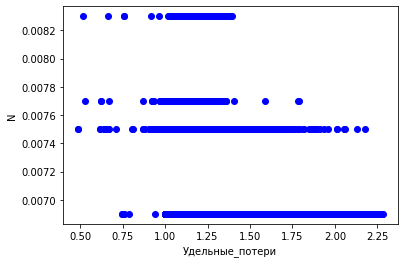

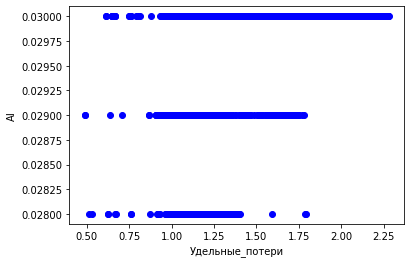

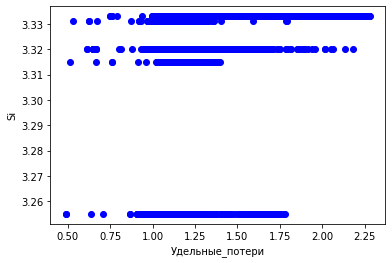

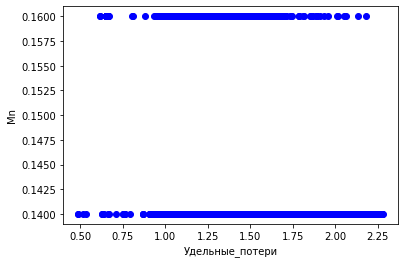

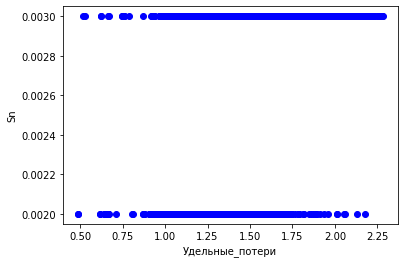

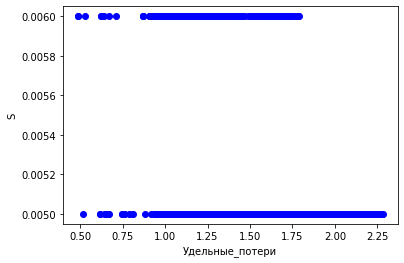

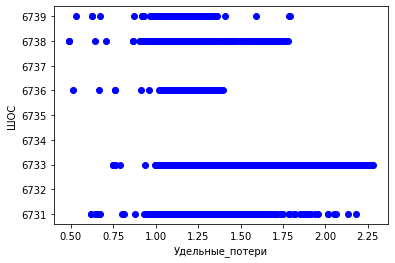

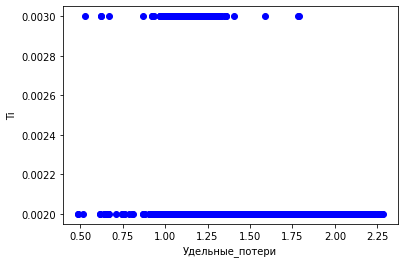

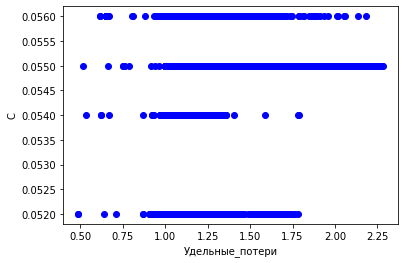

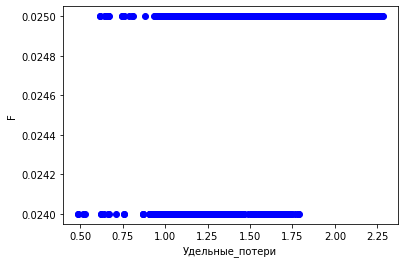

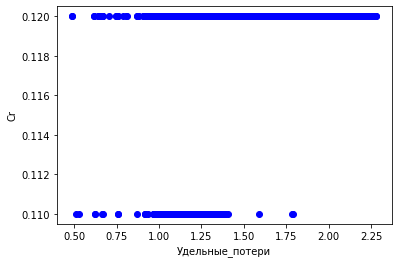

In [ ]:
print ('–•–∏–º–∏—è –ø–ª–∞–≤–∫–∏')
for i in stages['–•–∏–º–∏—è –ø–ª–∞–≤–∫–∏']:
  plt.plot(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, df[i].values, 'bo')
  
  plt.xlabel('–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏')
  plt.ylabel(i)
  plt.show()

–í—Å–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –Ω–∞ –ø–µ—Ä–≤–æ–º —ç—Ç–∞–ø–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ, –Ω–µ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã. –ü—Ä–∏ –∞–Ω–∞–ª–∏–∑–µ —Å –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –∫–ª–∞—Å—Å–∞–º–∏ –º–æ–∂–Ω–æ –±–æ—Ä–æ—Ç—å—Å—è —Å–µ–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏–µ–º, —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏–µ–π, –±—É—Ç—Å—Ç—Ä–µ–ø–æ–º (–ø—Ä–∏ –ø—Ä–æ–≤–µ—Ä–∫–µ –≥–∏–ø–æ—Ç–µ–∑).


–≠—Ç–æ—Ç —ç—Ç–∞–ø - —Ö–∏–º–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ —Ä—É–ª–æ–Ω–∞ –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏.
–°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É 



### –ì–∏–ø–æ—Ç–µ–∑–∞ 1 - –í–ª–∏—è–µ—Ç –ª–∏ —Ö–∏–º–∏—á–µ—Å–∫–∏–π —Å–æ—Å—Ç–∞–≤ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥—É–∫—Ü–∏–∏? 

–í–∑–≥–ª—è–Ω–µ–º –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã —Å—É—â–µ—Å—Ç–≤—É—é—â–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –∫–∞–∂–¥–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–º –∑–Ω–∞—á–µ–Ω–∏–∏

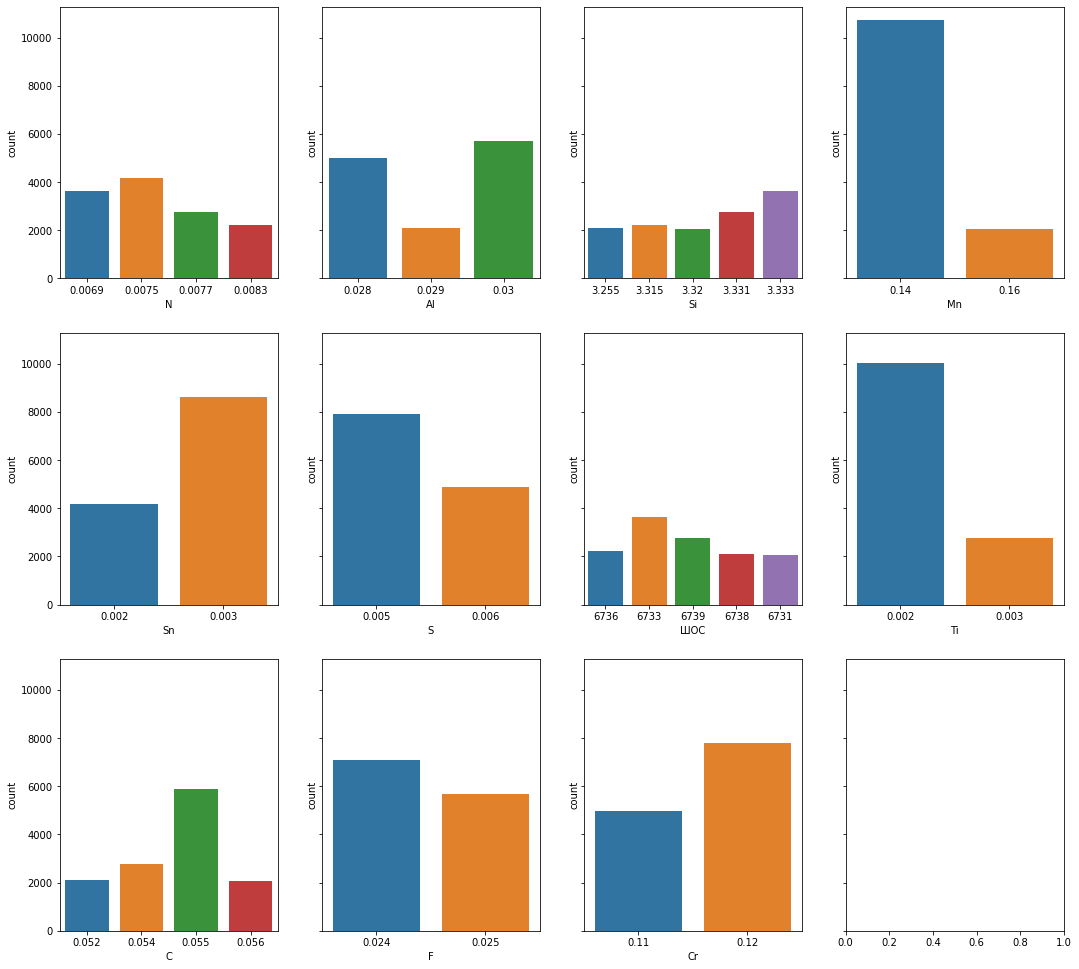

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(18, 17), sharey=True)
  
for i in range(len(stages['–•–∏–º–∏—è –ø–ª–∞–≤–∫–∏'])):
      sns.countplot(x=stages['–•–∏–º–∏—è –ø–ª–∞–≤–∫–∏'][i], data=df, ax=axes[int(i/4), int(i%4)])

–ü–æc–º–æ—Ç—Ä–∏–º –∫–∞–∫ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —ç—Ç–æ–≥–æ —ç—Ç–∞–ø–∞ –¥–ª—è –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∏ –Ω–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–º –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–∏:

–•–∏–º–∏—è –ø–ª–∞–≤–∫–∏


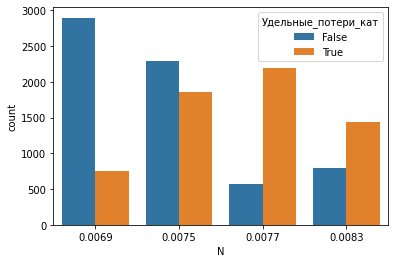

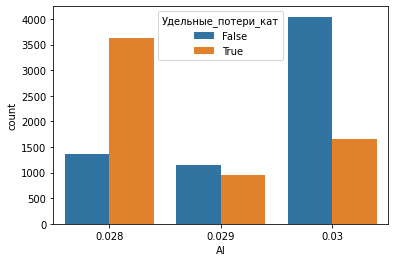

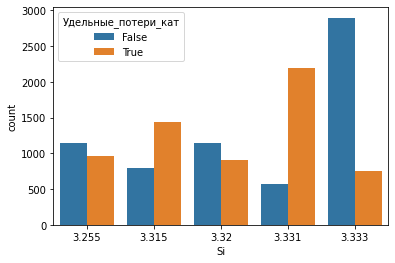

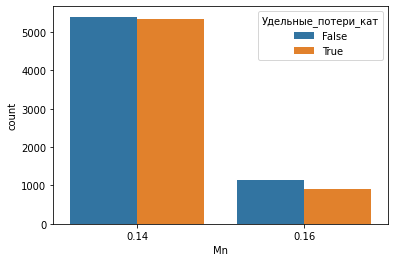

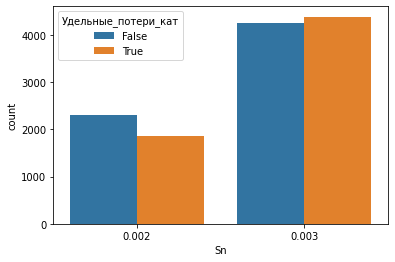

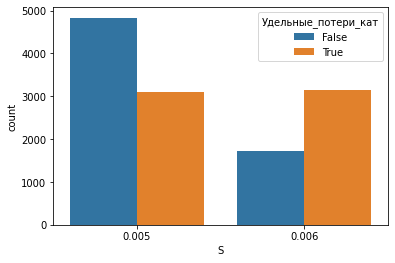

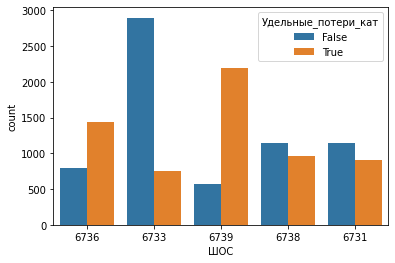

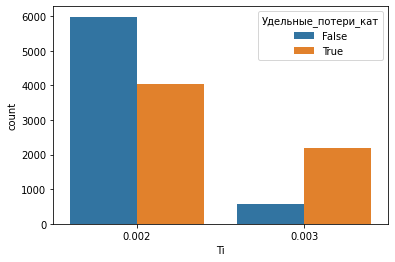

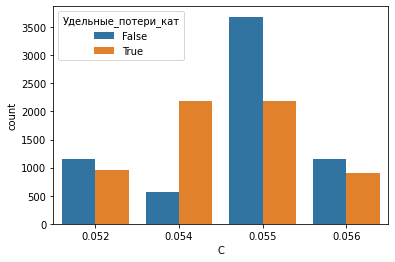

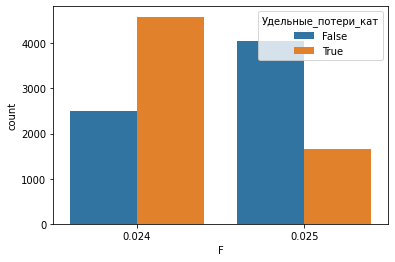

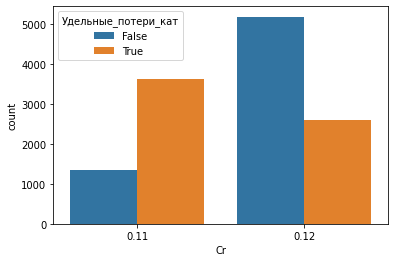

In [ ]:
print ('–•–∏–º–∏—è –ø–ª–∞–≤–∫–∏')
for i in stages['–•–∏–º–∏—è –ø–ª–∞–≤–∫–∏']:
  sns.countplot(x=i, hue="–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç", data=df)
  plt.show()  

–í–∏–∑—É–∞–ª—å–Ω–æ –º—ã –≤–∏–¥–∏–º –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏. –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ—Å—á–∏—Ç–∞—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é.
–¢–∞–∫ –∫–∞–∫ —Ç—É—Ç –≤—Å–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å—ã–Ω–µ –∫–∞–∫ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–∞—Ä–∞–º–µ—Ç—Ä, —Ç–æ –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –ö—Ä–∞–º–µ—Ä–∞.

In [ ]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

–ü—Ä–æ–≤–µ—Ä–∏–º –æ–¥–Ω–æ—Å—Ç–æ—Ä–æ–Ω–Ω—É—é –≥–∏–ø–æ—Ç–µ–∑—É H0: p1=p2 
—á—Ç–æ –ø–∞—Ä–∞–º–µ—Ç—Ä N  –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥—É–∫—Ü–∏–∏. 
–ü—Ä–æ—Ç–∏–≤ –¥–≤—É—Ö—Å—Ç–æ—Ä–æ–Ω–Ω–µ–π –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤—ã H1: p1 <> p2 
, —á—Ç–æ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ N –≤–ª–∏—è–µ—Ç –Ω–∞ –∏–∑–º–µ–Ω–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è.

–ò —Å—Ä–∞–∑—É –ø—Ä–æ–≤–µ—Ä–∏–º –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –∫—Ä–∏–µ—Ä–∏–µ–º –•–∏-–∫–≤–∞–¥—Ä–∞—Ç. –£—Å–ª–æ–≤–∏—è –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è —ç—Ç–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è –≤—ã–ø–æ–ª–Ω—è—é—Ç—Å—è: –≤—Å–µ–≥–æ –Ω–µ –º–µ–Ω–µ–µ 40 –ø—Ä–∏–º–µ—Ä–æ–≤ –∏ –≤ –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –Ω–µ –º–µ–Ω–µ–µ 5 –ø—Ä–∏–º–µ—Ä–æ–≤.


In [ ]:
for i in stages['–•–∏–º–∏—è –ø–ª–∞–≤–∫–∏'] :
  if i in unuseful_param:
      pass

  else:
    confusion_matrix = pd.crosstab(df [i], df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'])
    print( f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ö—Ä–∞–º–µ—Ä–∞ –¥–ª—è {i}: {cramers_v(confusion_matrix)}")
    chi2, p, dof, ex =stats.chi2_contingency(confusion_matrix)
    print(f"–ü—Ä–æ–≤–µ—Ä–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –•–∏-–∫—Ä–∏–µ—Ç—Ä–∏–µ–º chi2: {chi2} p-value: {p} \n\n")

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ö—Ä–∞–º–µ—Ä–∞ –¥–ª—è N: 0.43683546290619935
–ü—Ä–æ–≤–µ—Ä–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –•–∏-–∫—Ä–∏–µ—Ç—Ä–∏–µ–º chi2: 2443.654804573507 p-value: 0.0 


–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ö—Ä–∞–º–µ—Ä–∞ –¥–ª—è Al: 0.4001514411398226
–ü—Ä–æ–≤–µ—Ä–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –•–∏-–∫—Ä–∏–µ—Ç—Ä–∏–µ–º chi2: 2049.9499829267997 p-value: 0.0 


–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ö—Ä–∞–º–µ—Ä–∞ –¥–ª—è Si: 0.4368401568637462
–ü—Ä–æ–≤–µ—Ä–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –•–∏-–∫—Ä–∏–µ—Ç—Ä–∏–µ–º chi2: 2444.7073345015497 p-value: 0.0 


–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ö—Ä–∞–º–µ—Ä–∞ –¥–ª—è Mn: 0.041320895530273155
–ü—Ä–æ–≤–µ—Ä–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –•–∏-–∫—Ä–∏–µ—Ç—Ä–∏–µ–º chi2: 22.83793390353641 p-value: 1.7625235891590232e-06 


–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ö—Ä–∞–º–µ—Ä–∞ –¥–ª—è Sn: 0.05539736949741071
–ü—Ä–æ–≤–µ—Ä–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –•–∏-–∫—Ä–∏–µ—Ç—Ä–∏–µ–º chi2: 40.250906665245665 p-value: 2.2335166362695482e-10 


–ö–æ—Ä—Ä–µ–

–í—ã—Å–æ–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π p-value –Ω–µ—Ç, –≤—Å–µ –≤—ã—á–∏—Å–ª–µ–Ω–Ω—ã–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –∑–Ω–∞—á–∏–º—ã.

–ó–î–µ—Å—å —Å—Ç–æ–∏—Ç –æ—Ç–º–µ—Ç–∏—Ç—å —á—Ç–æ —Ä–∞–∑–Ω–∏—Ü–∞ –≤ –∑–Ω–∞—á–µ–Ω–∏—è—Ö (—Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –º–µ–∂–¥—É –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä 0.11 –∏ 0.12) –Ω–∞—Å—Ç–æ–ª–∫—å–æ –º–∞–ª—ã, —á—Ç–æ –µ—Å—Ç—å —Å–æ–º–Ω–µ–Ω–∏–µ –≤ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Ç–∞–∫–∏–µ –∂–µ—Å—Ç–∫–∏–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –Ω–∞ –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–π –¥–ª—è –ø–ª–∞–≤–∫–∏ –º–∞—Ç–µ—Ä–∏–∞–ª. 

–ö—Ä–æ–º–µ —Ç–æ–≥–æ, –º–æ–∂–Ω–æ –ø—Ä–æ—Å–ª–µ–¥–∏—Ç—å –ø—É—Ç—å –∫–∞–∂–¥–æ–≥–æ —Å–ª—è–±–∞ –æ—Ç –ø–ª–∞–≤–∫–∏ –¥–æ –∫–æ–Ω–µ—á–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –∏ –ø–æ–ø—ã—Ç–∞—Ç—å—Å—è –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –∏ –æ—Ü–µ–Ω–∏—Ç—å —Å–æ–≤–º–µ—Ç–Ω–æ–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (–º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ä–µ–≥—Ä–µ—Å—Å–∏—é)

## –ì–æ—Ä—è—á–∏–π –ø—Ä–æ–∫–∞—Ç

–ì–æ—Ä—è—á–∏–π –ø—Ä–æ–∫–∞—Ç


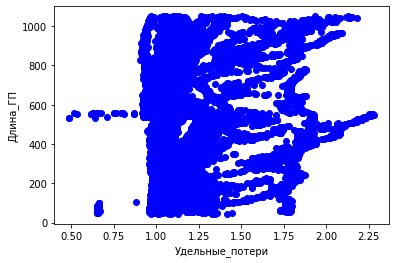

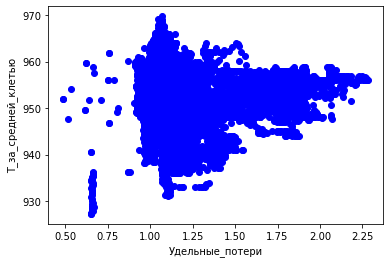

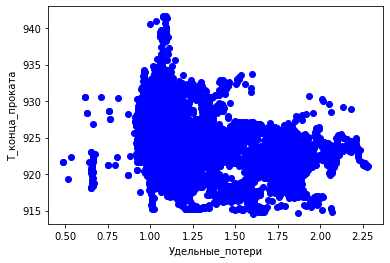

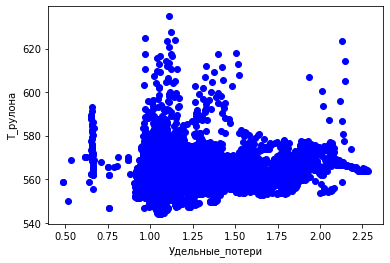

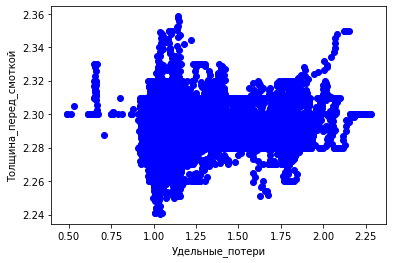

In [ ]:
print ('–ì–æ—Ä—è—á–∏–π –ø—Ä–æ–∫–∞—Ç')
for i in stages['–ì–æ—Ä—è—á–∏–π –ø—Ä–æ–∫–∞—Ç']:
  plt.plot(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, df[i].values, 'bo')
  plt.xlabel('–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏')
  plt.ylabel(i)
  plt.show()

–ù–∞ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –≥—Ä–∞—Ñ–∏–∫–∞—Ö –ø—Ä–æ—Å–º–∞—Ç—Ä–∏–≤–∞–µ—Ç—Å—è –Ω–µ–±–æ–ª—å—à–∞—è –ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å, —Ö–æ—Ç—è —ç—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å—é  –≤—ã–±–æ—Ä–∫–∏.
–ù–∞ –∫–∞–∂–¥–æ–º –≥—Ä–∞—Ñ–∏–∫–µ –Ω–∞ —ç—Ç–∞–ø–µ –≥–æ—Ä—è—á–µ–≥–æ –ø—Ä–æ–∫–∞—Ç–∞ –º—ã –≤–∏–¥–∏–º –≤—ã–¥–µ–ª—è—é—â—É—é—Å—è –Ω–µ–±–æ–ª—å—à—É—é –ø–æ–ª–æ—Å—É —Ç–æ—á–µ–∫, —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏–∑—É—é—â–∏—Ö –æ—á–µ–Ω—å –Ω–∏–∑–∫–∏–µ —É–¥–µ–ª—å–Ω—ã–µ –º–∞–≥–Ω–∏—Ç–Ω—ã–µ –ø–æ—Ç–µ—Ä–∏ –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä. –Ø–≤–ª—è–µ—Ç—Å—è –ª–∏ —ç—Ç–æ –ø—Ä–∏—á–∏–Ω–æ–π –∏–ª–∏ —Å–≤–æ–π—Å—Ç–≤–æ–º –≤—ã–±–æ—Ä–∫–∏? –ü–æc–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É–¥–µ–ª—å–Ω—ã—Ö –ø–æ—Ç–µ—Ä—å –≤ —Ü–µ–ª–æ–º:


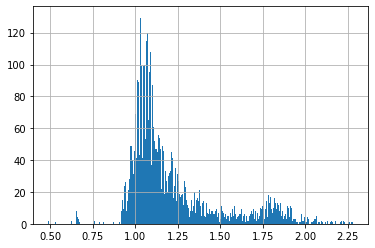

In [ ]:
df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].hist(bins=1000)

–î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–∫–æ—à–µ–Ω–Ω–æ –≤–ª–µ–≤–æ, –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç —à–∏—Ä–æ–∫–∏–π –ø—Ä–∞–≤—ã–π  —Ö–≤–æ—Å—Ç –∏ –æ—á–µ–Ω—å –∫–æ—Ä–æ—Ç–∫–∏–π –ª–µ–≤—ã–π, –∫–æ—Ç–æ—Ä—ã–π –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö –ø—Ä–æ—Å–º–∞—Ç—Ä–∏–≤–∞–µ—Ç—Å—è –∫–∞–∫ –æ–±–ª–∞–∫–æ –≤—ã–±–æ—Ä—Å–æ–≤.

–ù–ê –≥—Ä–∞—Ñ–∏–∫–∞—Ö –≤—ã—à–æ–µ –ø–ª–æ—Ö–æ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ—Ç—Å—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ

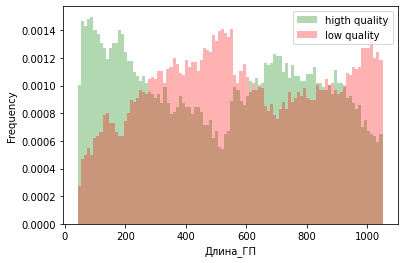

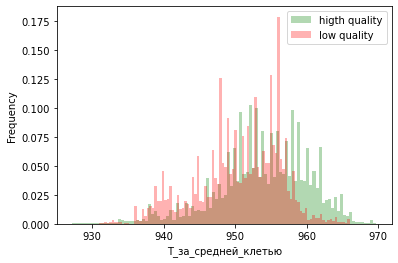

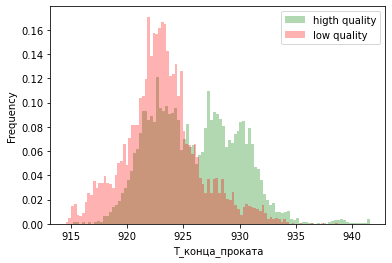

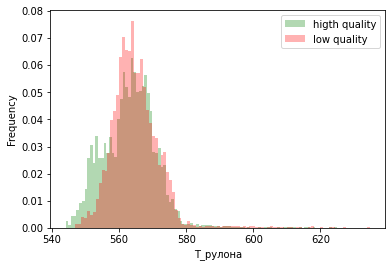

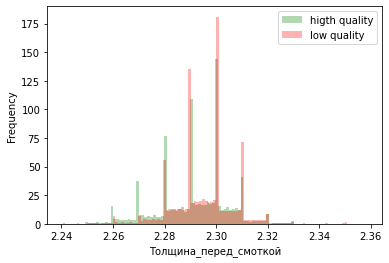

In [ ]:
for i in stages['–ì–æ—Ä—è—á–∏–π –ø—Ä–æ–∫–∞—Ç']:
  plt.hist(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1], bins=100, color='g', density=True,  alpha=0.3, label='higth quality' ) #
  plt.hist(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0], bins=100, color= 'r', density=True,  alpha=0.3, label='low quality' ) #
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()

–ó–¥–µ—Å—å –≤–∏–¥–Ω–æ —á—Ç–æ –µ—Å—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä–∞—è –Ω–µ –±–æ–ª—å—à–∞—è –æ–±–ª–∞—Å—Ç—å —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –∑–µ–ª–µ–Ω–∞—è –æ–±–ª–∞—Å—Ç—å –ø—Ä–µ–≤—ã—à–∞–µ—Ç –∫—Ä–∞—Å–Ω—É—é, —Ç–æ–µ—Å—Ç—å –ø—Ä–∏ –∫–æ—Ç–æ—Ä—ã—Ö –∫–∞—á–µ—Å—Ç–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –ø–æ–ª—É—á–∞–µ—Ç—Å—è –±–æ–ª—å—à–µ. –°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É, —á—Ç–æ

### –ì–∏–ø–æ—Ç–µ–∑–∞ 2 - –í–µ—Ä–Ω–æ –ª–∏ —á—Ç–æ –≤–∏–¥–∏–º—ã–µ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö –æ–±–ª–∞—Å—Ç–∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä –≥–æ—Ä—è—á–µ–≥–æ –ø—Ä–æ–∫–∞—Ç–∞, –≤–ª–∏—è—é—Ç –Ω–∞ –ø–æ–≤—ã—à–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –≤—ã–ø—É—Å–∫–∞–µ–º–æ–π –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏?

–° –ø–æ–º–æ—â—å—é –∫—Ä–∏—Ç–µ—Ä–∏—è –°—Ç—å—é–¥–µ–Ω—Ç–∞ –ø—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ä–∞–∑–≤–µ–Ω—Å—Ç–≤–µ —Å—Ä–µ–¥–Ω–∏—Ö –¥–≤—É—Ö –≤—ã–±–æ—Ä–æ–∫.

–£ –Ω–∞—Å –≤—Å–µ–≥–æ, –ø–æ —Å—É—Ç–∏, –±—É–¥–µ—Ç –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–æ –º–µ–Ω–µ–µ 120 –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –±–æ–ª–µ–µ 12 —Ç—ã—Å—é –ø—Ä–∏–º–µ—Ä–æ–≤, —Ç–æ–µ—Å—Ç—å –ø—Ä–æ–≤–µ—Ä–µ–Ω–æ –º–µ–Ω–µ–µ 120 –≥–∏–ø–æ—Ç–µ–∑, –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö –ø–æ–ª–æ–≤–∏–Ω–∞ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏, –æ—Ü–µ–Ω–∏–≤–∞–µ–º—ã–µ –∫—Ä–∏–µ—Ç—Ä–∏–µ–º –°—Ç—å—é–¥–µ–Ω—Ç–∞. –ü–æ—ç—Ç–æ–º—É –º—ã –Ω–µ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø–æ–ø—Ä–∞–≤–∫—É –•–æ–ª–º–∞ –¥–ª—è –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑.

–ö—Ä–∏—Ç–µ—Ä–∏–π –°—Ç—å—é–¥–µ–Ω—Ç–∞:

ùêª0: —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä –Ω–∞ —ç—Ç–æ–º —ç—Ç–∞–ø–µ –¥–ª—è –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∏ –Ω–µ–∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏ —Ä–∞–≤–Ω—ã.

ùêª0: –Ω–µ —Ä–∞–≤–Ω—ã.

–î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–≤—É—Ö–≤—ã–±–æ—Ä–æ—á–Ω—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π –°—Ç—å—é–¥–µ–Ω—Ç–∞, —É–±–µ–¥–∏–º—Å—è, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤ –≤—ã–±–æ—Ä–∫–∞—Ö —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –Ω–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö.

Populating the interactive namespace from numpy and matplotlib
Shapiro-Wilk normality test, W-statistic: 0.975046, p-value: 0.000000
Shapiro-Wilk normality test, W-statistic: 0.971257, p-value: 0.000000


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


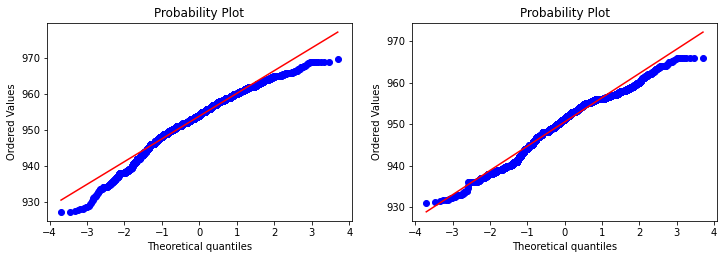

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk normality test, W-statistic: 0.978882, p-value: 0.000000
Shapiro-Wilk normality test, W-statistic: 0.981830, p-value: 0.000000


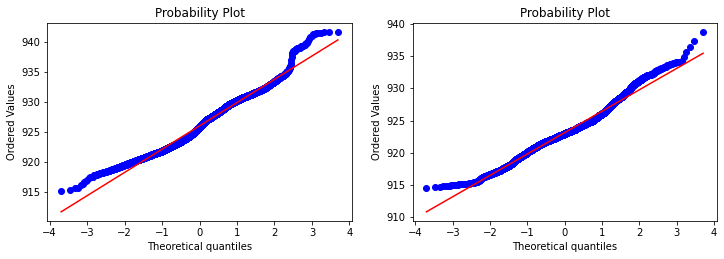

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk normality test, W-statistic: 0.958707, p-value: 0.000000
Shapiro-Wilk normality test, W-statistic: 0.896904, p-value: 0.000000


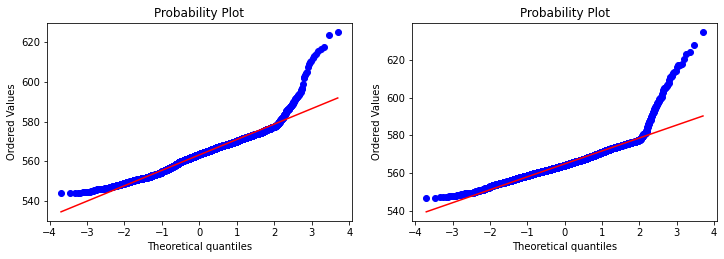

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk normality test, W-statistic: 0.977939, p-value: 0.000000
Shapiro-Wilk normality test, W-statistic: 0.968608, p-value: 0.000000


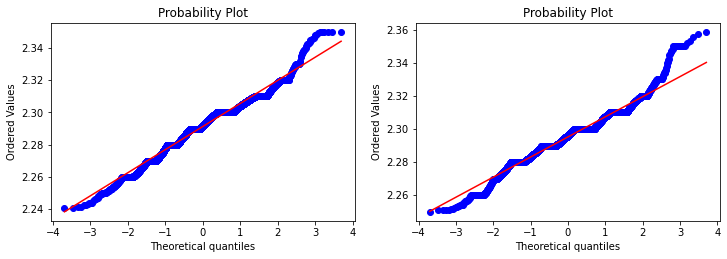

In [ ]:
%pylab inline
for i in stages['–ì–æ—Ä—è—á–∏–π –ø—Ä–æ–∫–∞—Ç'] [1:]:

  pylab.figure(figsize=(12,8))
  pylab.subplot(2,2,1)
  stats.probplot(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1], dist="norm", plot=pylab)
  pylab.subplot(2,2,2)
  stats.probplot(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0], dist="norm", plot=pylab)
  print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1]))
  print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0]))
  pylab.show()

–í–∏–¥–∏–º —á—Ç–æ QQ –≥—Ä–∞—Ñ–∏–∫–∏ —á–∞—Å—Ç–∏—á–Ω–æ –±–ª–∏–∑–∫–∏ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º, –ø—Ä–æ–≤–µ—Ä–∫–∞ –ö—Ä–∏–µ—Ç—Ä–∏–µ–º –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞, –ø–æ–∫–∞–∑–∞–ª–∞ —á—Ç–æ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã –¥–ª—è –æ–±–æ–∏—Ö –≤—ã–±–æ—Ä–æ–∫ –¥–ª—è –∫–∞–∂–¥–æ–π –∏–∑ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä —Ä–∞—Å–ø—Ä–µ–¥–ª–µ–Ω—ã –Ω–æ—Ä–º–∞–ª—å–Ω–æ.

In [ ]:
for i in stages['–ì–æ—Ä—è—á–∏–π –ø—Ä–æ–∫–∞—Ç'] [1:]:

  print(f" \n\n For {i}   {scipy.stats.ttest_ind(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1] , df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0], equal_var = False)}")
  cm = CompareMeans(DescrStatsW(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1]), DescrStatsW(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0]))
  print(f" For {i} 95%% confidence interval : [%f, %f]" % cm.tconfint_diff(usevar='unequal'))

 

 For T_–∑–∞_—Å—Ä–µ–¥–Ω–µ–π_–∫–ª–µ—Ç—å—é   Ttest_indResult(statistic=30.745280585506272, pvalue=3.2609105388515966e-200)
 For T_–∑–∞_—Å—Ä–µ–¥–Ω–µ–π_–∫–ª–µ—Ç—å—é 95% confidence interval : [3.148913, 3.577770]
 

 For T_–∫–æ–Ω—Ü–∞_–ø—Ä–æ–∫–∞—Ç–∞   Ttest_indResult(statistic=44.171954105015544, pvalue=0.0)
 For T_–∫–æ–Ω—Ü–∞_–ø—Ä–æ–∫–∞—Ç–∞ 95% confidence interval : [2.729266, 2.982740]
 

 For T_—Ä—É–ª–æ–Ω–∞   Ttest_indResult(statistic=-12.317657986735009, pvalue=1.153749354806176e-34)
 For T_—Ä—É–ª–æ–Ω–∞ 95% confidence interval : [-1.919950, -1.392783]
 

 For –¢–æ–ª—â–∏–Ω–∞_–ø–µ—Ä–µ–¥_—Å–º–æ—Ç–∫–æ–π   Ttest_indResult(statistic=-16.91711370855228, pvalue=1.7682250743374515e-63)
 For –¢–æ–ª—â–∏–Ω–∞_–ø–µ—Ä–µ–¥_—Å–º–æ—Ç–∫–æ–π 95% confidence interval : [-0.004506, -0.003570]


–í—Å–µ —Ä-value –º–µ–Ω—å—à–µ 0.05, —Ç–∞–∫ —á—Ç–æ —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é –º–µ–Ω—å—à–µ 5% –º—ã –º–æ–∂–µ–º –æ—à–∏–±–∏—Ç—å—Å—è, –æ—Ç–≤–µ—Ä–≥—Ä–Ω—É–≤ –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ —Å—Ä–µ–¥–Ω–∏—Ö. –° –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —Ä –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å —Ä–∞–∑–Ω—ã–µ —Å—Ä–µ–¥–Ω–∏–µ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã –Ω–∞ –≤—ã–±–æ—Ä–∫–µ –∏–∑ –∫–∞—á–µ—Å—Ç–µ–Ω–Ω–æ–π –∏ –Ω–µ–∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –≤ —ç—Ç–æ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ, –∞ –≤ —Ä–µ–∞–ª—å–Ω–æ—Å—Ç–∏ –æ–Ω–∏ –Ω–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è.

–¢–∞–∫–∂–µ –∫–æ–Ω—Ñ–∏—Ü–∏–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –Ω–µ –≤–∫–ª—é—á–∞—é—Ç –Ω–æ–ª—å, –∑–Ω–∞—á–∏—Ç —Ä–∞–∑–Ω–∏—Ü–∞ –Ω–∞ —ç—Ç–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö –µ—Å—Ç—å.

### –ì–∏–ø–æ—Ç–µ–∑–∞ 2.1 –í–µ—Ä–Ω–æ –ª–∏ —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–π —Ä–∞–∑–º–µ—Ä —Ä—É–ª–æ–Ω–∞ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –¥–ª—è –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∏ –Ω–µ –∫–∞—á–µ—Å—Ç–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏?

In [ ]:
for i in stages['–ì–æ—Ä—è—á–∏–π –ø—Ä–æ–∫–∞—Ç'] [:1]:
  print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1]))
  print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0]))
  print(f" \n\n For {i}   {scipy.stats.ttest_ind(  df[i][(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1) ] , df[i][(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0)  ], equal_var = False) }")
  cm = CompareMeans(DescrStatsW(df[i][(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1)  ]), DescrStatsW( df[i][(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0)]) )
  print(f" For {i} 95%% confidence interval : [%f, %f]" % cm.tconfint_diff(usevar='unequal'))

Shapiro-Wilk normality test, W-statistic: 0.940954, p-value: 0.000000
Shapiro-Wilk normality test, W-statistic: 0.961643, p-value: 0.000000
 

 For –î–ª–∏–Ω–∞_–ì–ü   Ttest_indResult(statistic=-11.749894016885014, pvalue=1.034620099061497e-31)
 For –î–ª–∏–Ω–∞_–ì–ü 95% confidence interval : [-69.620778, -49.713140]


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


–î–∞, —Å—Ä–µ–¥–Ω–∏–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è, –Ω–æ —ç—Ç–æ –Ω–µ –≥–æ–≤–æ—Ä–∏—Ç –æ –Ω–∞–ª–∏—á–∏–∏ –ø—Ä–∏—á–∏–Ω–Ω–æ-—Å–ª–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ–π —Å–≤—è–∑–∏. 

–î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º, –æ—Å—Ç–∞–Ω–µ—Ç—Å—è –ª–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω–∞—è —Å–∏–ª–∞ —É –¥–ª–∏–Ω—ã —Ä—É–ª–æ–Ω–∞, –µ—Å–ª–∏ –º—ã —É—á—Ç–µ–º –≤–æ–∑–¥–µ–π—Å—Ç–≤–∏–µ –≤—Å–µ—Ö –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (–≤–æ–∑–º–æ–∂–Ω–æ —Å–ª—É—á–∞–π–Ω–æ —Å–æ–≤–ø–∞–ª–æ, —á—Ç–æ –Ω–∞ —Ä—É–ª–æ–Ω–∞—Ö —ç—Ç–æ–π –¥–ª–∏–Ω—ã –≤ –ø–æ—Å–ª–µ–¥—É—é—â–∏—Ö –∏ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö —ç—Ç–∞–ø–∞—Ö –±—ã–ª–∏  –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –Ω–∞ –≤—Å–µ—Ö —ç—Ç–∞–ø–∞—Ö).

–î–ª—è —ç—Ç–æ–≥–æ –ø–æ—Å—Ç—Ä–æ–∏–º –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é.

In [ ]:
df['–î–ª–∏–Ω–∞_–ì–ü']

–í–æ–ø—Ä–æ—Å –∫ —Ç–µ—Ö–Ω–æ–ª–æ–≥—É: (–ù–µ –Ω–∞—à–ª–∞ –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ) –ù–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ —Ä—É–ª–æ–Ω—ã –≤—ã–ø—É—Å–∫–∞—é—Ç—Å—è –æ–¥–∏–Ω–∞–∫–æ–≤–æ–π —Ç–æ–ª—â–∏–Ω—ã? –§–∞–∫—Ç —á—Ç–æ –±–æ–ª–µ–µ –∫—Ä—É–ø–Ω—ã–µ –¥–µ—Ç–∞–ª–∏ –æ—Å—Ç—ã–≤–∞—é—Ç –∏ –Ω–∞–≥—Ä–µ–≤–∞—é—Ç—Å—è –º–µ–¥–ª–µ–Ω–Ω–µ–µ, –∑–Ω–∞—á–∏—Ç —Ä–∞–∑–º–µ—Ä –º–æ–∂–µ—Ç –≤–ª–∏—è—Ç—å –Ω–∞ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—É —Ä—É–ª–æ–Ω–∞. –ù–æ –≤–ª–∏—è–µ—Ç –ª–∏ —Ç–æ–ª—å–∫–æ —Ç–æ–ª—â–∏–Ω–∞ —Ä—É–ª–æ–Ω–∞ –∏–ª–∏ –¥—Ä—É–≥–∏–µ –¥–≤–∞ –∏–∑–º–µ—Ä–µ–Ω–∏—è —Ç–æ–∂–µ –æ–∫–∞–∑—ã–≤–∞—é—Ç—Å—è –≤–ª–∏—è–Ω–∏–µ? –ò–Ω—Ç–µ—Ä–µ—Å—É–µ—Ç –º–Ω–µ–Ω–∏–µ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–∞-–ø—Ä–∞–∫—Ç–∏–∫–∞.



–ï—Å–ª–∏ –æ–∫–∞–∂–µ—Ç—Å—è —á—Ç–æ –Ω–∞ —Å–∫–æ—Ä–æ—Å—Ç—å –∏–∑–º–µ–Ω–µ–Ω–∏—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã –≤–Ω—É—Ç—Ä–∏ —Ä—É–ª–æ–Ω–∞ –≤–ª–∏—è–µ—Ç –Ω–µ —Ç–æ–ª—å–∫–æ —Ç–æ–ª—â–∏–Ω–∞, –Ω–æ –∏ –¥—Ä—É–≥–∏–µ –≥–µ–æ–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–µ —Ä–∞–∑–º–µ—Ä—ã, —Ç–æ–≥–¥–∞ –≤—Ç–æ—Ä–æ–π –≤–æ–ø—Ä–æ—Å:
–ú–æ–∂–µ—Ç –ª–∏ –Ω–∞—Ä–µ–∑–∫–∞ –Ω–∞ —Ä—É–ª–æ–Ω—ã –æ—Å—É—â–µ—Å—Ç–≤–ª—è—Ç—å—Å—è –ø–æ—Å–ª–µ–¥–∏–º —ç—Ç–∞–ø–æ–º?
–ß—Ç–æ –ø—Ä–æ—â–µ –∏ –¥–µ—à–µ–≤–ª–µ - —Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞—Ç—å —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—É –∏–ª–∏ –Ω–∞—Ä–µ–∑–∫—É —Ä—É–ª–æ–Ω–æ–≤?

## –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è

–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏


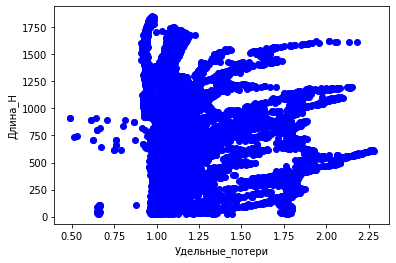

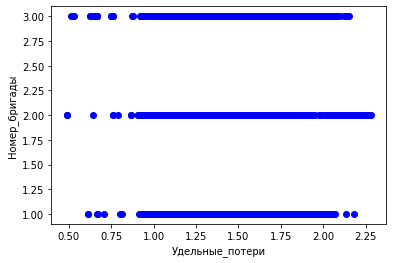

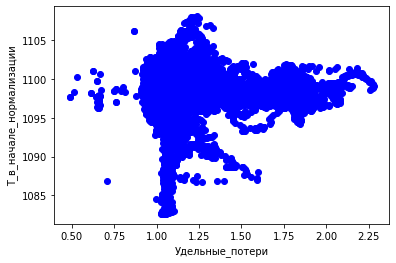

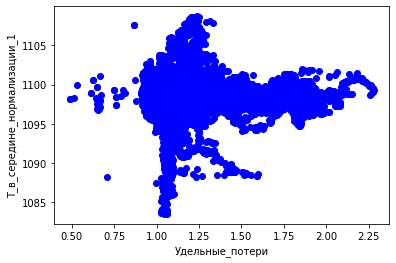

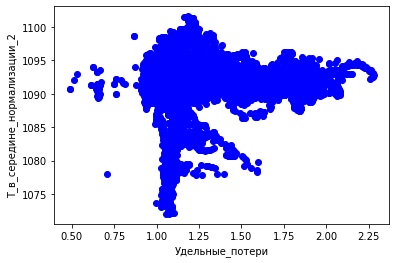

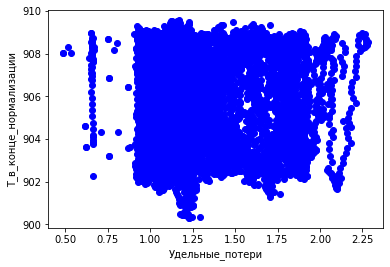

In [ ]:
print ('–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è')
for i in stages['–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è']:
  plt.plot(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, df[i].values, 'bo')
  plt.xlabel('–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏')
  plt.ylabel(i)
  plt.show()

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä –Ω–∞–±–ª—é–¥–∞–µ–º —Å—Ö–æ–∂—É—é –º–µ–∂–¥—É —Å–æ–±–æ–π –Ω–µ–ª–∏–Ω–µ–π–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∏ –Ω–∞–ª–∏—á–∏–µ —á–µ—Ç–∫–æ –æ—Ç–¥–µ–ª–µ–Ω–Ω–æ–≥–æ –æ–±–ª–∞–∫–∞ —Ç–æ—á–µ–∫ —Å –æ—Å–æ–±–æ –Ω–∏–∑–∫–∏–º –ø–æ–∫–∞–∑–µ—Ç–µ–ª–µ–º —É–¥–µ–ª—å–Ω—ã—Ö –º–∞–≥–Ω–∏—Ç–Ω—ã—Ö –ø–æ—Ç–µ—Ä—å.

–ù–ê –≥—Ä–∞—Ñ–∏–∫–∞—Ö –≤—ã—à–æ–µ –ø–ª–æ—Ö–æ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ—Ç—Å—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ

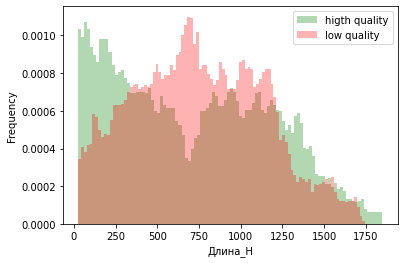

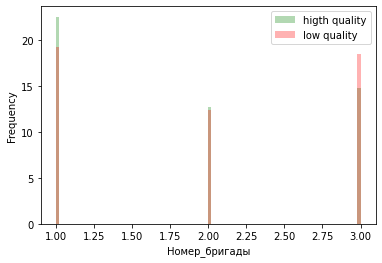

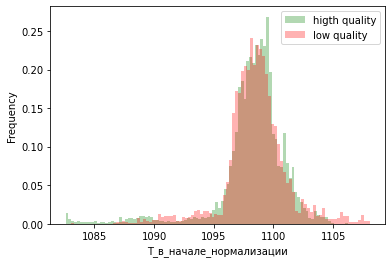

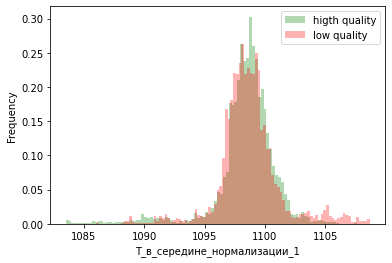

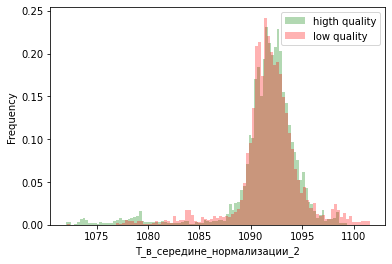

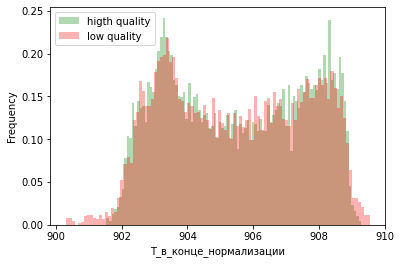

In [ ]:
for i in stages['–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è']:
  plt.hist(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1], bins=100, color='g', density=True,  alpha=0.3, label='higth quality' ) #
  plt.hist(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0], bins=100, color= 'r', density=True,  alpha=0.3, label='low quality' ) #
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()

–ó–¥–µ—Å—å –≤–∏–¥–Ω–æ —á—Ç–æ –µ—Å—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä–∞—è –Ω–µ –±–æ–ª—å—à–∞—è –æ–±–ª–∞—Å—Ç—å —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –∑–µ–ª–µ–Ω–∞—è –æ–±–ª–∞—Å—Ç—å –ø—Ä–µ–≤—ã—à–∞–µ—Ç –∫—Ä–∞—Å–Ω—É—é, —Ç–æ–µ—Å—Ç—å –ø—Ä–∏ –∫–æ—Ç–æ—Ä—ã—Ö –∫–∞—á–µ—Å—Ç–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –ø–æ–ª—É—á–∞–µ—Ç—Å—è –±–æ–ª—å—à–µ. –ö—Ä–æ–º–µ —Ç–æ–≥–æ –≤–∏–¥–∏–º —Ä–∞–∑–ª–∏—á–∏—è –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –¥–ª–∏–Ω—ã. 

 –°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—ã, —á—Ç–æ 

### –ì–∏–ø–æ—Ç–µ–∑–∞ 3.1 - –í–µ—Ä–Ω–æ –ª–∏ —á—Ç–æ –ø—Ä–∏ –±–æ–ª–µ–µ –Ω–∏–∑–∫–∏—Ö —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞—Ö –≤ –Ω–∞—á–∞–ª–µ –∏ —Å–µ—Ä–µ–¥–∏–Ω–µ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –ø–æ–ª—É—á–∞–µ—Ç—Å—è –±–æ–ª—å—à–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏?

–° –ø–æ–º–æ—â—å—é –∫—Ä–∏—Ç–µ—Ä–∏—è –°—Ç—å—é–¥–µ–Ω—Ç–∞ –ø—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ä–∞–∑–≤–µ–Ω—Å—Ç–≤–µ —Å—Ä–µ–¥–Ω–∏—Ö –¥–≤—É—Ö –≤—ã–±–æ—Ä–æ–∫.

–ö—Ä–∏—Ç–µ—Ä–∏–π –°—Ç—å—é–¥–µ–Ω—Ç–∞:

ùêª0: —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä –Ω–∞ —ç—Ç–æ–º —ç—Ç–∞–ø–µ –¥–ª—è –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∏ –Ω–µ–∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏ —Ä–∞–≤–Ω—ã.

ùêª0: –Ω–µ –æ–¥–∏–Ω–∞–∫–æ–≤—ã.


–î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–≤—É—Ö–≤—ã–±–æ—Ä–æ—á–Ω—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π –°—Ç—å—é–¥–µ–Ω—Ç–∞, —É–±–µ–¥–∏–º—Å—è, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤ –≤—ã–±–æ—Ä–∫–∞—Ö —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –Ω–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö.

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk normality test, W-statistic: 0.802756, p-value: 0.000000
Shapiro-Wilk normality test, W-statistic: 0.923911, p-value: 0.000000


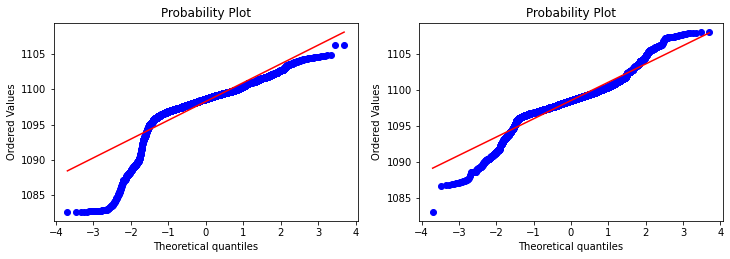

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk normality test, W-statistic: 0.821197, p-value: 0.000000
Shapiro-Wilk normality test, W-statistic: 0.904239, p-value: 0.000000


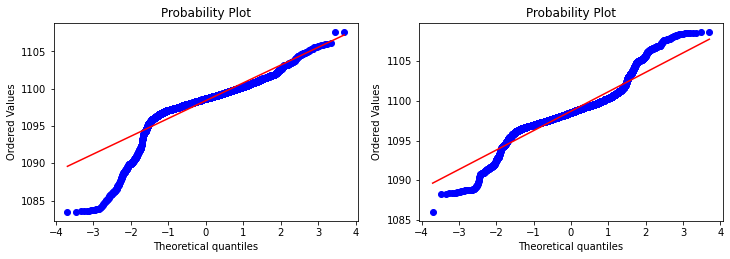

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk normality test, W-statistic: 0.741396, p-value: 0.000000
Shapiro-Wilk normality test, W-statistic: 0.886485, p-value: 0.000000


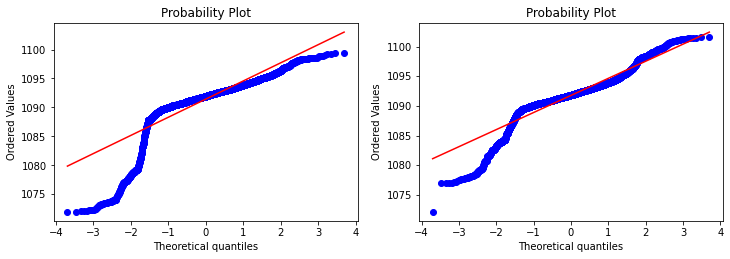

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk normality test, W-statistic: 0.939125, p-value: 0.000000
Shapiro-Wilk normality test, W-statistic: 0.956166, p-value: 0.000000


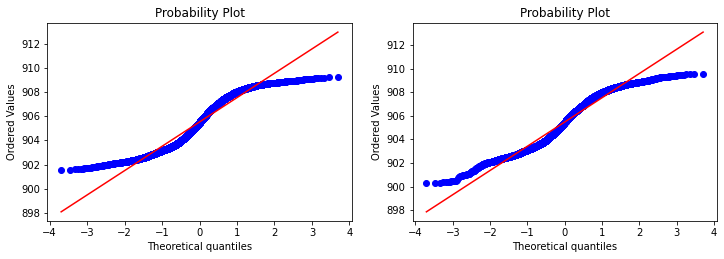

In [ ]:
%pylab inline
for i in stages['–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è'] [2:]:

  pylab.figure(figsize=(12,8))
  pylab.subplot(2,2,1)
  stats.probplot(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1], dist="norm", plot=pylab)
  pylab.subplot(2,2,2)
  stats.probplot(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0], dist="norm", plot=pylab)
  print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1]))
  print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0]))
  pylab.show()

–í–∏–¥–∏–º —á—Ç–æ QQ –≥—Ä–∞—Ñ–∏–∫–∏ —á–∞—Å—Ç–∏—á–Ω–æ –±–ª–∏–∑–∫–∏ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º, –ø—Ä–æ–≤–µ—Ä–∫–∞ –ö—Ä–∏–µ—Ç—Ä–∏–µ–º –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞, –ø–æ–∫–∞–∑–∞–ª–∞ —á—Ç–æ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã –¥–ª—è –æ–±–æ–∏—Ö –≤—ã–±–æ—Ä–æ–∫ –¥–ª—è –∫–∞–∂–¥–æ–π –∏–∑ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä  —Ä–∞—Å–ø—Ä–µ–¥–ª–µ–Ω—ã –Ω–æ—Ä–º–∞–ª—å–Ω–æ.

In [ ]:
for i in stages['–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è'] [2:]:

  print(f" \n\n For {i}   {scipy.stats.ttest_ind(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1] , df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0], equal_var = False)}")
  cm = CompareMeans(DescrStatsW(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1]), DescrStatsW(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0]))
  print(f" For {i} 95%% confidence interval : [%f, %f]" % cm.tconfint_diff(usevar='unequal'))

 

 For T_–≤_–Ω–∞—á–∞–ª–µ_–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏   Ttest_indResult(statistic=-5.784737644263881, pvalue=7.437248319253339e-09)
 For T_–≤_–Ω–∞—á–∞–ª–µ_–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ 95% confidence interval : [-0.386628, -0.190925]
 

 For T_–≤_—Å–µ—Ä–µ–¥–∏–Ω–µ_–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏_1   Ttest_indResult(statistic=-6.933702092523347, pvalue=4.297606523335403e-12)
 For T_–≤_—Å–µ—Ä–µ–¥–∏–Ω–µ_–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏_1 95% confidence interval : [-0.409762, -0.229144]
 

 For T_–≤_—Å–µ—Ä–µ–¥–∏–Ω–µ_–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏_2   Ttest_indResult(statistic=-5.836677019728793, pvalue=5.46059117935418e-09)
 For T_–≤_—Å–µ—Ä–µ–¥–∏–Ω–µ_–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏_2 95% confidence interval : [-0.464229, -0.230811]
 

 For T_–≤_–∫–æ–Ω—Ü–µ_–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏   Ttest_indResult(statistic=1.5250072515946531, pvalue=0.1272820539465299)
 For T_–≤_–∫–æ–Ω—Ü–µ_–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ 95% confidence interval : [-0.016082, 0.128802]


–í–∏–¥–∏–º, —á—Ç–æ –≤—Å–µ —Ä-value, –∫—Ä–æ–º–µ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ, –º–µ–Ω—å—à–µ 0.05, —Ç–∞–∫ —á—Ç–æ —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é –º–µ–Ω—å—à–µ 5% –º—ã –º–æ–∂–µ–º –æ—à–∏–±–∏—Ç—å—Å—è, –æ—Ç–≤–µ—Ä–≥—Ä–Ω—É–≤ –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ —Å—Ä–µ–¥–Ω–∏—Ö. –° –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —Ä –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å —Ä–∞–∑–Ω—ã–µ —Å—Ä–µ–¥–Ω–∏–µ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã –Ω–∞ –≤—ã–±–æ—Ä–∫–µ –∏–∑ –∫–∞—á–µ—Å—Ç–µ–Ω–Ω–æ–π –∏ –Ω–µ–∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –≤ —ç—Ç–æ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ, –∞ –≤ —Ä–µ–∞–ª—å–Ω–æ—Å—Ç–∏ –æ–Ω–∏ –Ω–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è.


–¢–∞–∫–∂–µ –∫–æ–Ω—Ñ–∏—Ü–∏–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –Ω–µ –≤–∫–ª—é—á–∞—é—Ç –Ω–æ–ª—å, –∫—Ä–æ–º–µ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ, –∑–Ω–∞—á–∏—Ç —Ä–∞–∑–Ω–∏—Ü–∞ –Ω–∞ —ç—Ç–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö –µ—Å—Ç—å.

### –ì–∏–ø–æ—Ç–µ–∑–∞ 3.2 –í–µ—Ä–Ω–æ –ª–∏, —á—Ç–æ —Ä–∞–∑–º–µ—Ä —Ä—É–ª–æ–Ω–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ –µ–≥–æ –∫–∞—á–µ—Å—Ç–≤–æ, –∞ —Ç–æ—á–Ω–µ–µ, —á—Ç–æ —Ä—É–ª–æ–Ω—ã –±–æ–ª—å—à–∏—Ö —Ä–∞–∑–º–µ—Ä–æ–≤ —Å–ª–µ–¥—É–µ—Ç –æ—Å—Ç—É–∂–∞—Ç—å –∏–ª–∏ –Ω–∞–≥—Ä–µ–≤–∞—Ç—å –±–æ–ª–µ–µ –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ, —á–µ–º –º–µ–Ω—å—à–∏—Ö —Ä–∞–∑–º–µ—Ä–æ–≤

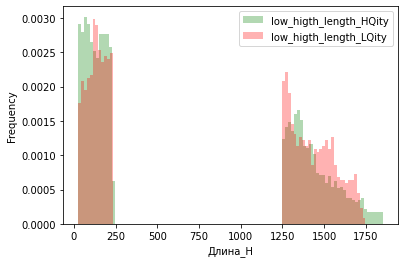

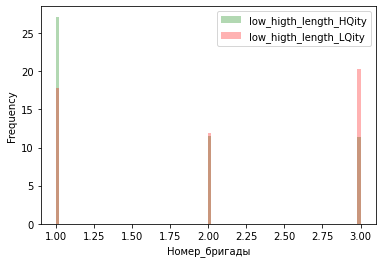

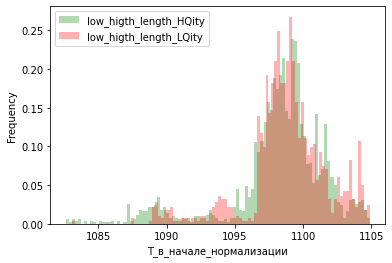

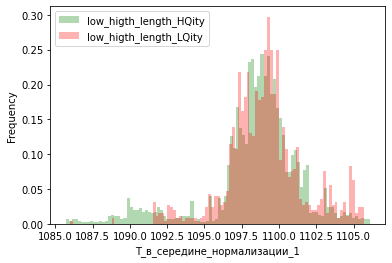

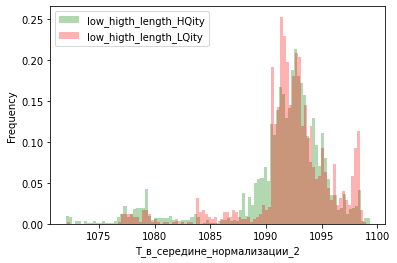

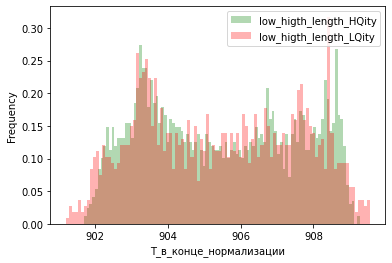

In [ ]:
for i in stages['–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è']:
  #plt.hist(df[i][ (df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1) & (df['–î–ª–∏–Ω–∞_–ù'] >250) & (df['–î–ª–∏–Ω–∞_–ù'] <1250) ], bins=100, color='b', density=True,  alpha=0.3, label='midium_length_HQity' ) #
  plt.hist(df[i][ (df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1) & ((df['–î–ª–∏–Ω–∞_–ù'] <230) | (df['–î–ª–∏–Ω–∞_–ù'] >1250)) ], bins=100, color= 'g', density=True,  alpha=0.3, label='low_higth_length_HQity' ) #
  #plt.hist(df[i][ (df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0) & (df['–î–ª–∏–Ω–∞_–ù'] >250) & (df['–î–ª–∏–Ω–∞_–ù'] <1350) ], bins=100, color='r', density=True,  alpha=0.3, label='midium_length_LQity' ) #
  plt.hist(df[i][ (df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0) & ((df['–î–ª–∏–Ω–∞_–ù'] <230) | (df['–î–ª–∏–Ω–∞_–ù'] >1250)) ], bins=100, color= 'r', density=True,  alpha=0.3, label='low_higth_length_LQity' ) #
  
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()

## –•–æ–ª–æ–¥–Ω—ã–π –ø—Ä–æ–∫–∞—Ç

–•–æ–ª–æ–¥–Ω—ã–π –ø—Ä–æ–∫–∞—Ç


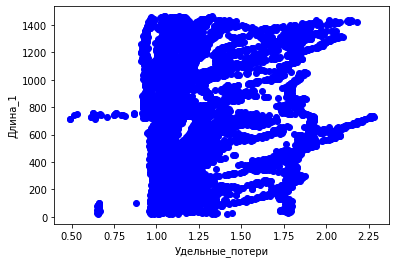

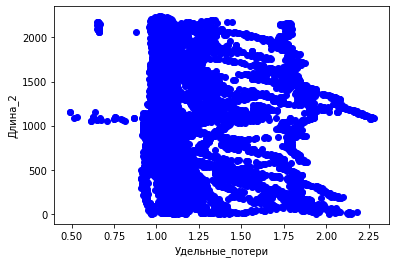

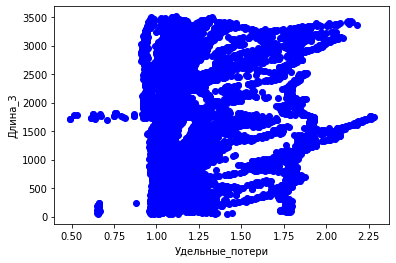

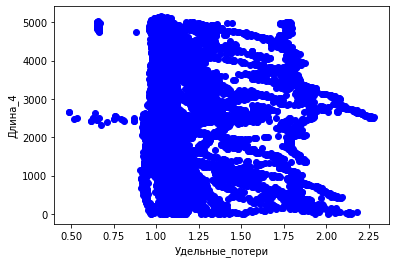

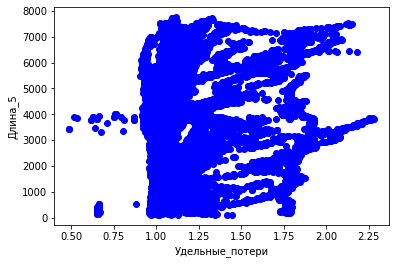

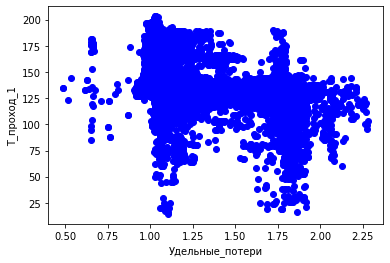

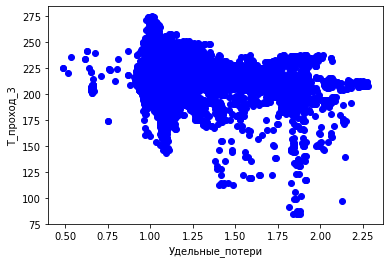

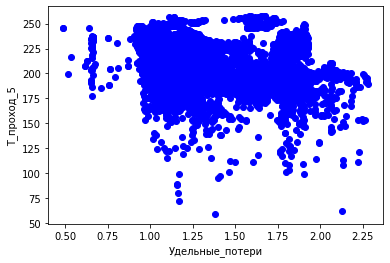

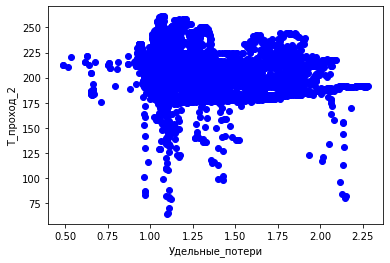

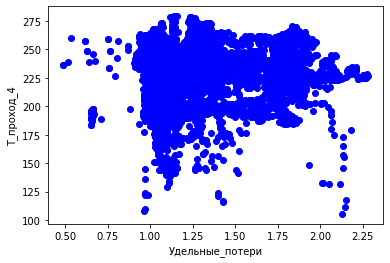

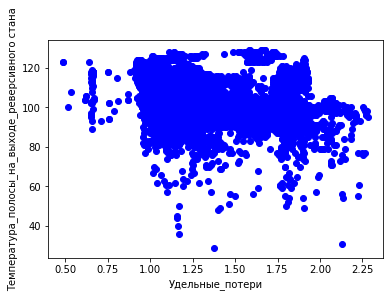

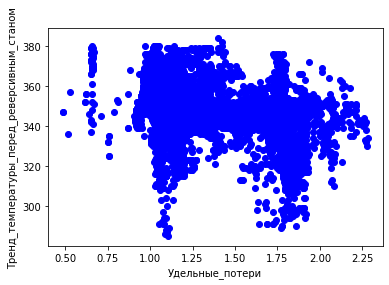

In [ ]:
print ('–•–æ–ª–æ–¥–Ω—ã–π –ø—Ä–æ–∫–∞—Ç')
for i in stages['–•–æ–ª–æ–¥–Ω—ã–π –ø—Ä–æ–∫–∞—Ç']:
  plt.plot(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, df[i].values, 'bo')
  plt.xlabel('–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏')
  plt.ylabel(i)
  plt.show()

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä –∏ –¥–ª–∏–Ω—ã –Ω–∞–±–ª—é–¥–∞–µ–º  –Ω–∞–ª–∏—á–∏–µ —á–µ—Ç–∫–æ –æ—Ç–¥–µ–ª–µ–Ω–Ω–æ–≥–æ –æ–±–ª–∞–∫–∞ —Ç–æ—á–µ–∫ —Å –æ—Å–æ–±–æ –Ω–∏–∑–∫–∏–º –ø–æ–∫–∞–∑–µ—Ç–µ–ª–µ–º —É–¥–µ–ª—å–Ω—ã—Ö –º–∞–≥–Ω–∏—Ç–Ω—ã—Ö –ø–æ—Ç–µ—Ä—å. –ü—Ä–∏ —ç—Ç–æ–º –æ–±–ª–∞–∫–æ –æ—Å–æ–±–æ –Ω–∏–∑–∫–∏—Ö —É–¥–µ–ª—å–Ω—ã—Ö –ø–æ—Ç–µ—Ä—å —Ñ–æ—Ä–º–∏—Ä—É–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ –ø—Ä–∏ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞—Ö.

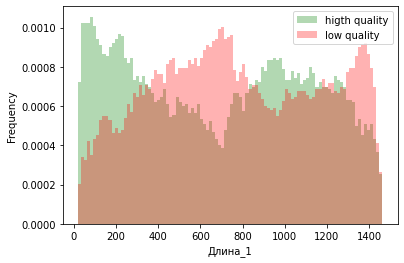

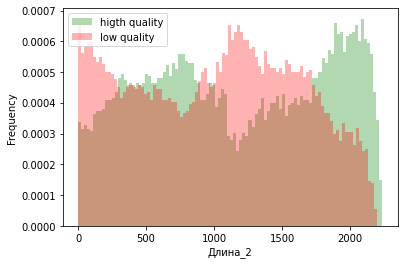

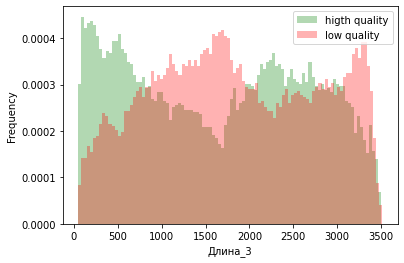

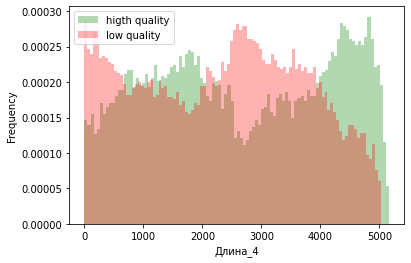

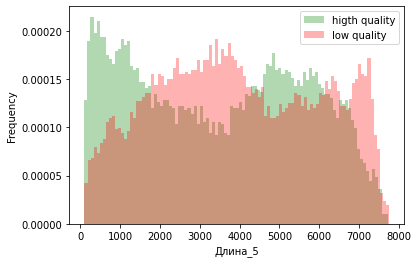

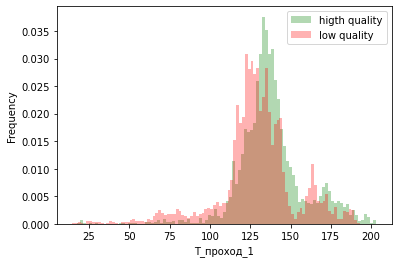

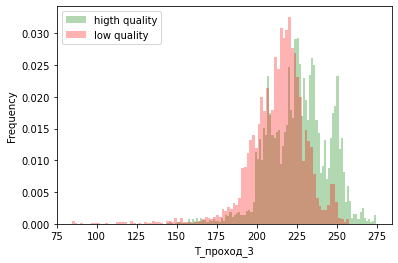

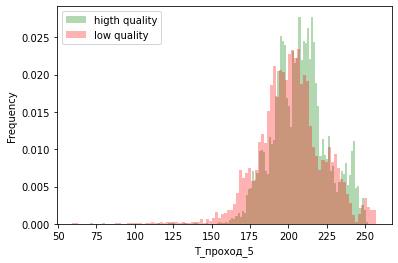

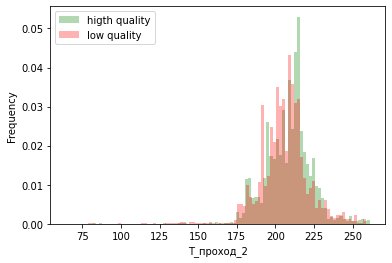

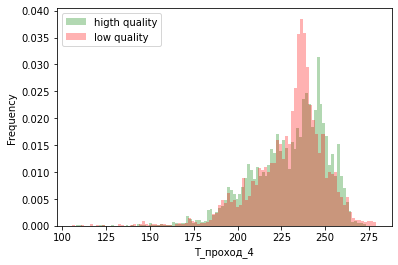

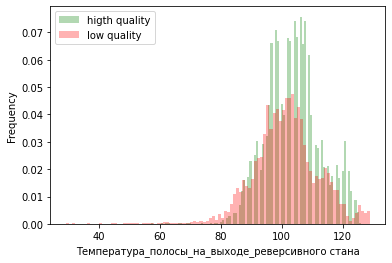

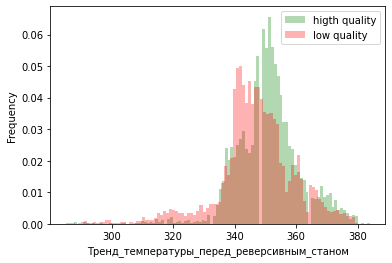

In [ ]:
for i in stages['–•–æ–ª–æ–¥–Ω—ã–π –ø—Ä–æ–∫–∞—Ç']:
  plt.hist(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1], bins=100, color='g', density=True,  alpha=0.3, label='higth quality' ) #
  plt.hist(df[i][df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0], bins=100, color= 'r', density=True,  alpha=0.3, label='low quality' ) #
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()

–î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ, –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö –∑–∞–º–µ—Ç–Ω–æ –Ω–µ–∫–æ—Ç–æ—Ä–µ —Å–º–µ—â–µ–Ω–∏–µ –¥–ª—è –≤—ã–±–æ—Ä–∫–∏ –≤—ã—Å–æ–∫–æ–≥–æ –∏ –Ω–∏–∑–∫–æ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞. –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —ç—Ç—É –≥–∏–ø–æ—Ç–µ–∑—É
### –ì–∏–ø–æ—Ç–µ–∑–∞ 4 - –í–µ—Ä–Ω–æ –ª–∏ —á—Ç–æ –ª—É—á—à–µ (–±—ã—Å—Ç—Ä–µ–µ) –æ—Å—Ç—ã–≤—à–∏–µ –∫—É—Å–∫–∏ –∫ —ç—Ç–∞–ø—É —Ö–æ–ª–æ–¥–Ω–æ–≥–æ –ø—Ä–æ–∫–∞—Ç–∞ –¥–∞—é—Ç –±–æ–ª—å—à–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏?

In [ ]:
df[i].nunique()

12757

## –û–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏–µ

–û–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏–µ


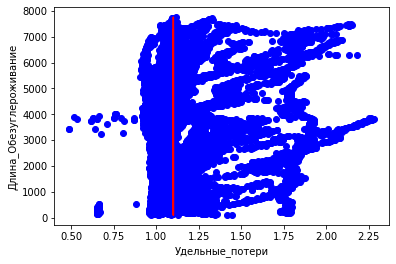

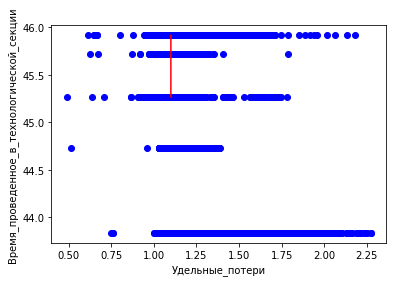

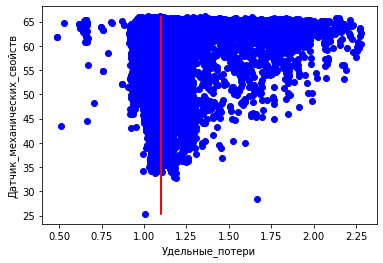

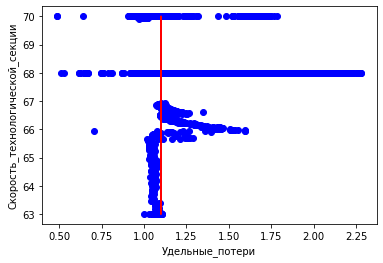

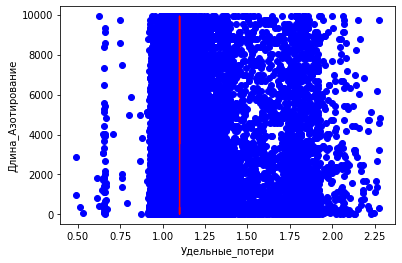

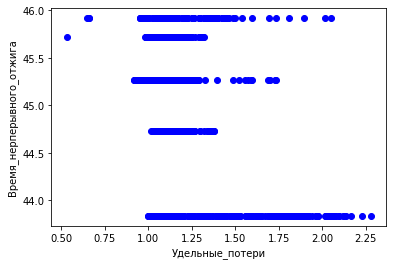

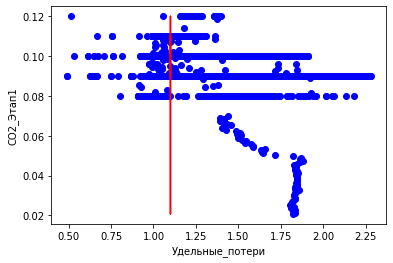

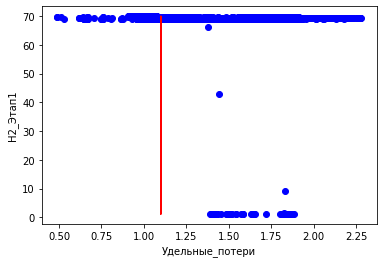

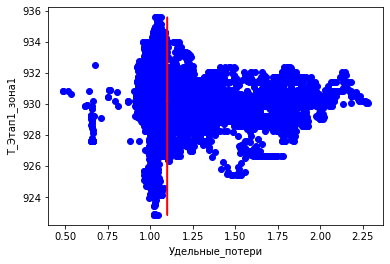

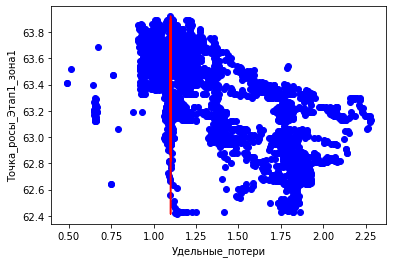

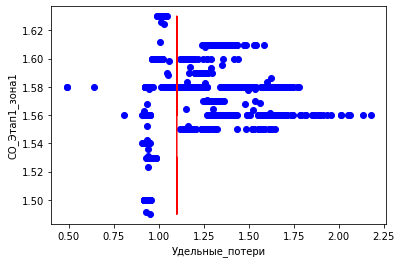

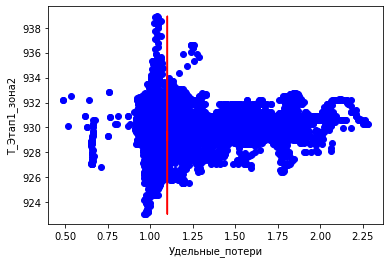

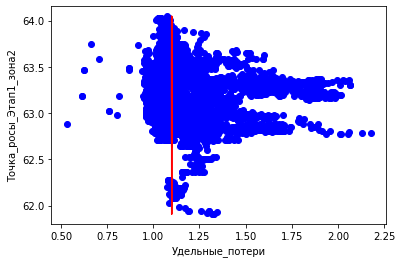

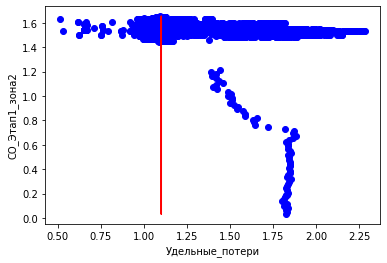

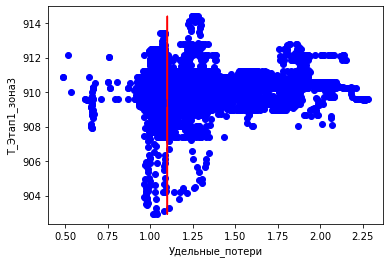

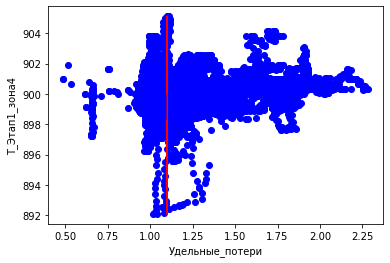

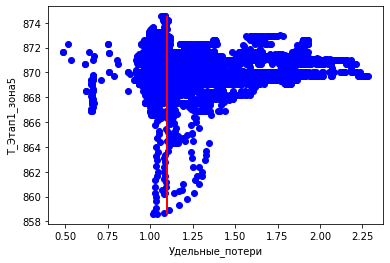

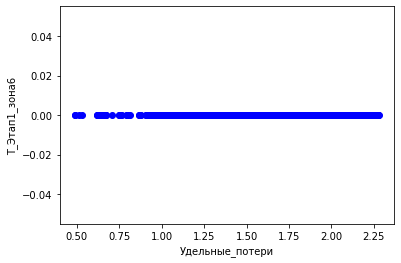

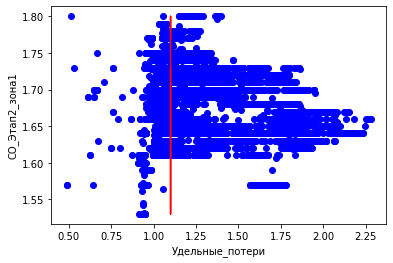

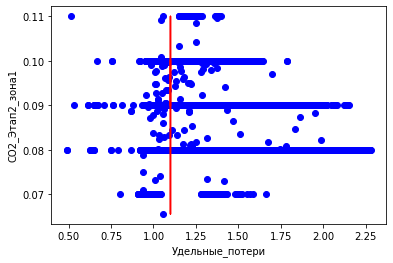

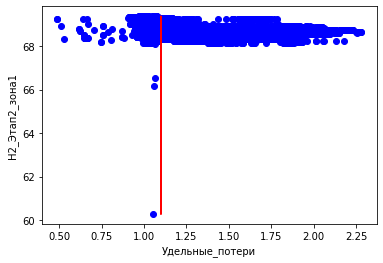

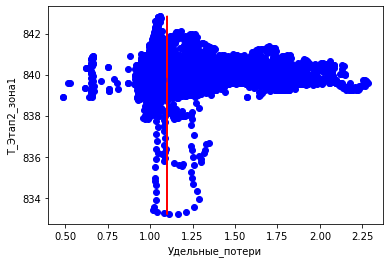

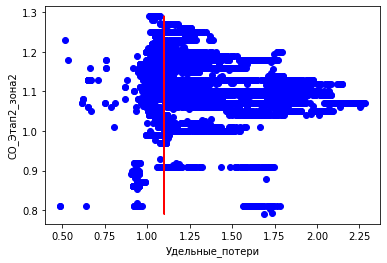

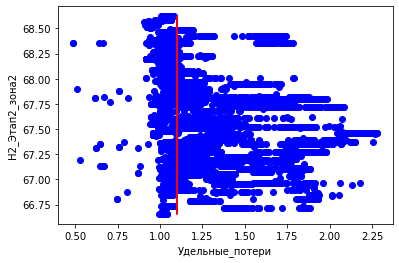

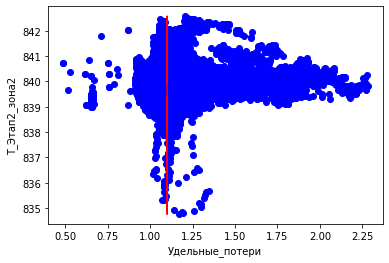

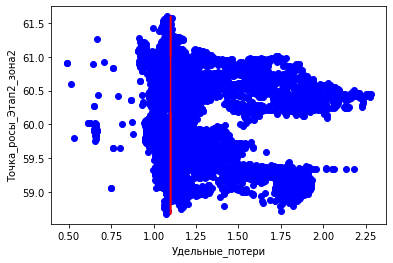

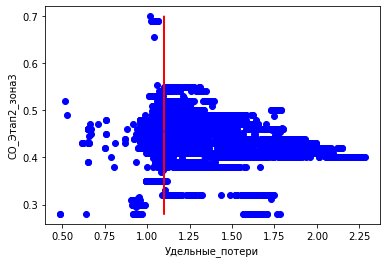

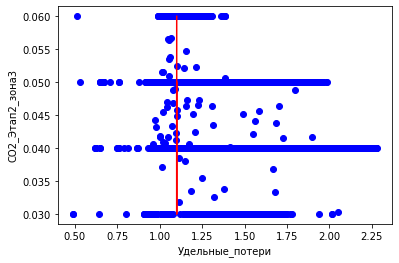

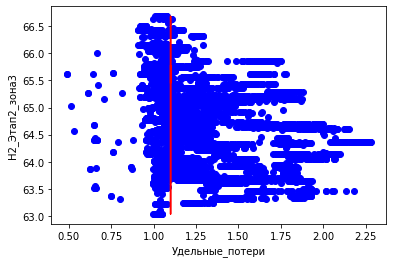

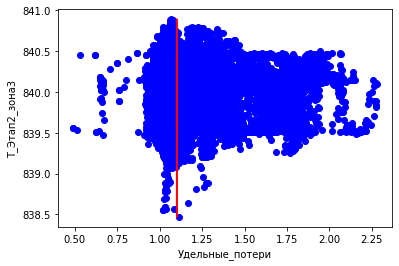

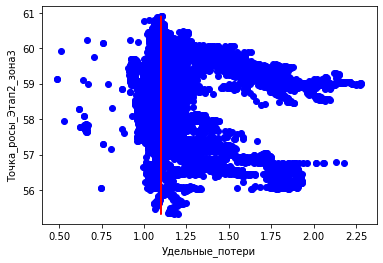

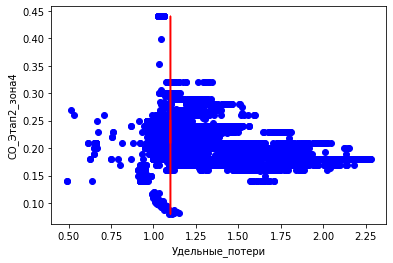

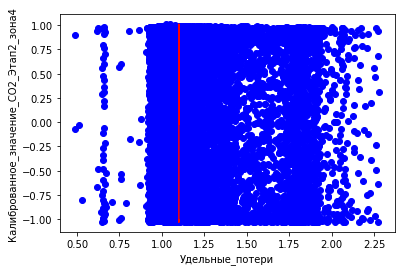

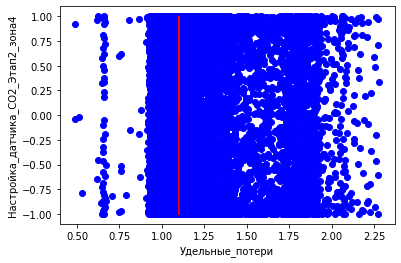

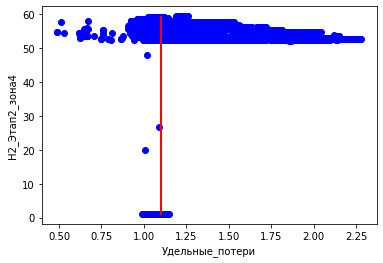

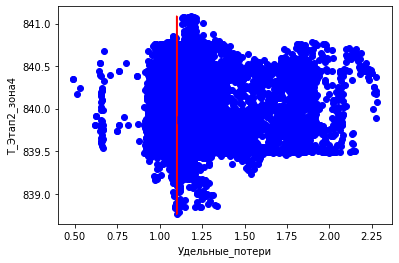

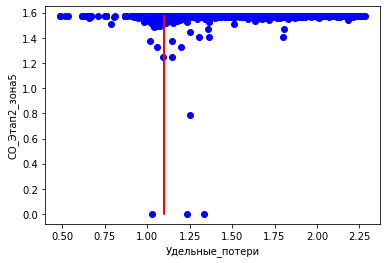

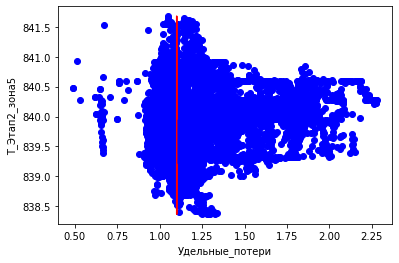

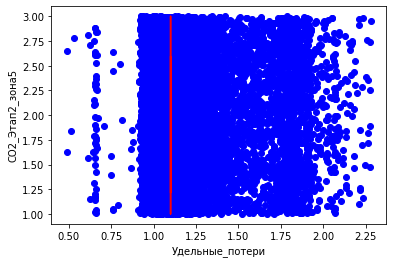

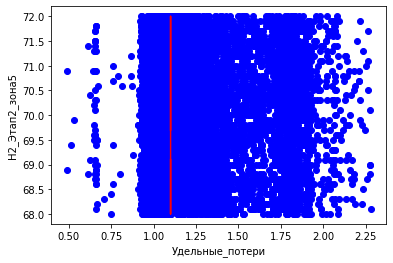

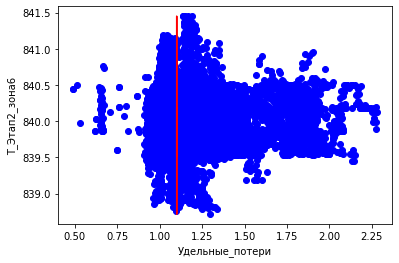

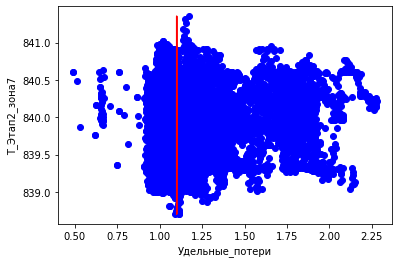

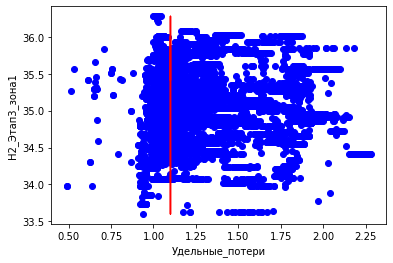

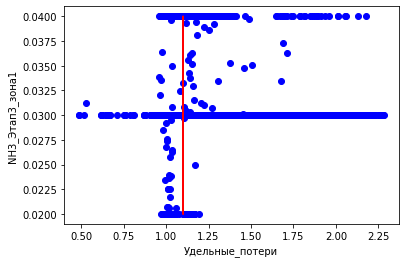

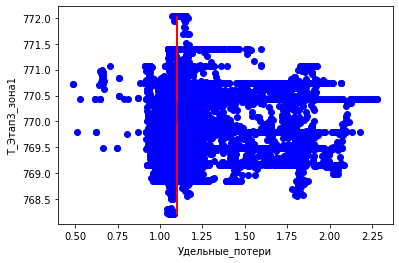

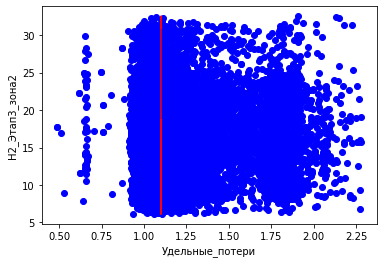

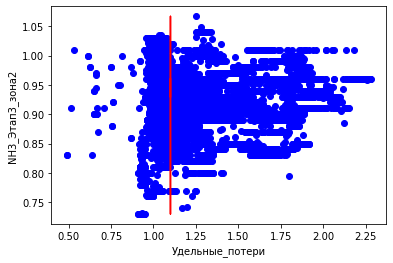

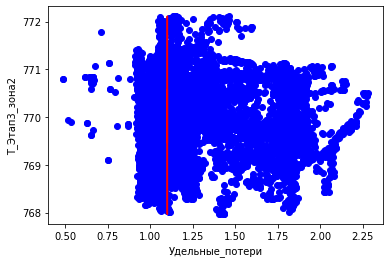

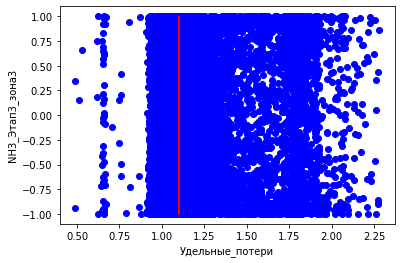

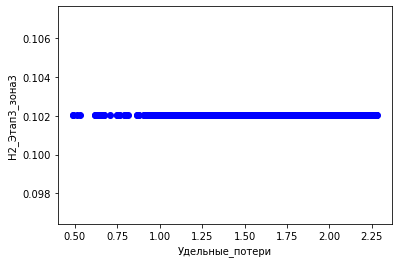

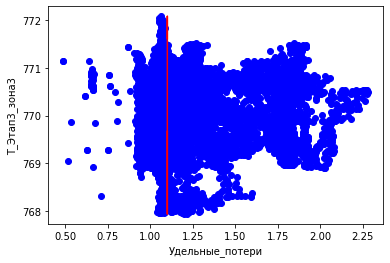

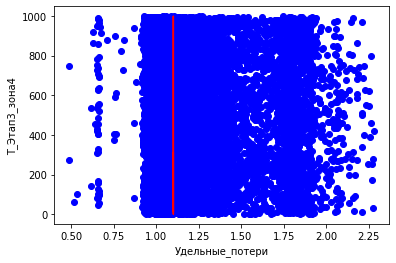

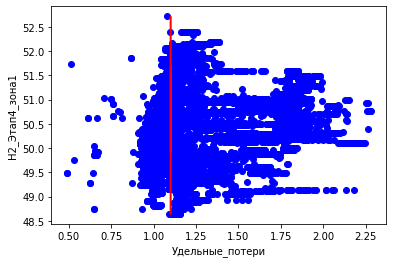

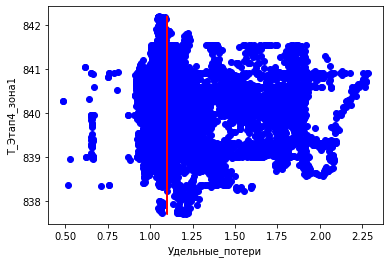

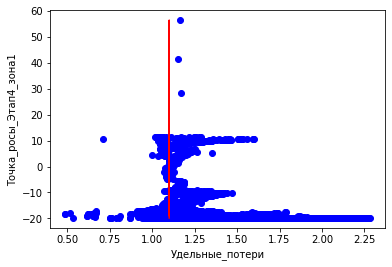

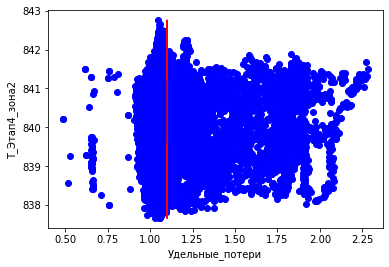

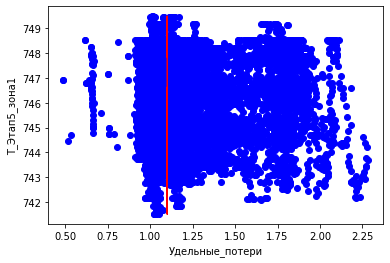

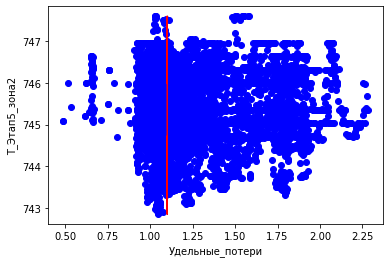

In [ ]:
print ('–û–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏–µ')
for i in stages['–û–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏–µ']:
  plt.plot(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, df[i].values, 'bo')
  plt.plot([1.1]*len(df[i]), df[i].values, 'r')
  #plt.plot( df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, [67]*len(df[i]), 'r')
  plt.xlabel('–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏')
  plt.ylabel(i)
  plt.show()

–ó–¥–µ—Å—å –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –º–Ω–æ–≥–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–æ —Å—É—Ç–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ—Ç–Ω–µ—Å—Ç–∏ –∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º, —Ç–∞–∫–∏–µ –∫–∞–∫: –≤—Ä–µ–º—è –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ –≤ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π —Å–µ–∫—Ü–∏–∏ –∏ –≤—Ä–µ–º—è –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ–≥–æ –æ—Ç–∂–∏–≥–∞, –∞ —Ç–∞–∫–∂–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –≤–æ–∑–¥–µ–π—Å—Ç–≤—É—é—â–∏—Ö –≤–µ—â–µ—Å—Ç–≤, –µ—Å–ª–∏ —É–¥–∞–ª–∏—Ç—å –≤—ã–±—Ä–æ—Å—ã.


–í–æ–ø—Ä–æ—Å –∫ —Ç–µ—Ö–Ω–æ–ª–æ–≥—É: –≤ –∫–∞–∫–∏—Ö –≤–µ–ª–∏—á–∏–Ω–∞—Ö –∏–∑–º–µ—Ä–µ–Ω—ã –≤—Å–µ —Ö–∏–º–∏—á–µ—Å–∫–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å –¥–∞—Ç—á–∏–∫–æ–≤ (–∫—Ä–æ–º–µ –≤—Ä–µ–º–µ–Ω–∏–∏ –∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã)?
–ü–æ—á–µ–º—É –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ö–∏–º–∏—á–µ—Å–∫–∏—Ö –≤–µ—â–µ—Å—Ç–≤ –Ω–∞ —ç—Ç–∞–ø–µ –û–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏–µ –ø–æ—è–≤–ª—è—é—Ç—Å—è –∏—Å–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ  –≤ –Ω–µ–∫—Å–æ–ª—å–∫–∏—Ö  –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã—Ö –¥–æ–∑–∏—Ä–æ–≤–∫–∞—Ö?

### Prepare numerical and categorical features list

 Made categorical features list

In [ ]:
stages['–û–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏–µ']

cat_param= ['–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏', '–°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏','–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞','CO2_–≠—Ç–∞–ø1',
 'H2_–≠—Ç–∞–ø1', 'CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1', 'CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1', 'CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3', 'NH3_–≠—Ç–∞–ø3_–∑–æ–Ω–∞1', '–®–û–°', 'CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3']



In [ ]:
num_param= [ i for i in num_param if i not in cat_param ]

cat_param[0]  in num_param

False

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö –ø–ª–æ—Ö–æ –≤–∏–¥–Ω—ã –∑–Ω–∞—á–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π. –û–∫—Ä—É–≥–ª–∏–º –∏—Ö –¥–ª—è –ª—É—á—à–µ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏

In [ ]:
print(df['–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏'].value_counts())
df['–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏']= df['–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏'].apply(lambda x: round(x,2))
df['–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏'].value_counts()

43.833333    1632
45.716667    1331
44.733333    1057
45.266667     979
45.916667     926
Name: –í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


43.83    1632
45.72    1331
44.73    1057
45.27     979
45.92     926
Name: –í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏, dtype: int64

In [ ]:
print(df['–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞'].value_counts())
df['–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞']= df['–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞'].apply(lambda x: round(x,2))
df['–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞'].value_counts()

43.833333    355
45.716667    267
45.266667    224
44.733333    220
45.916667    187
Name: –í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


43.83    355
45.72    267
45.27    224
44.73    220
45.92    187
Name: –í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞, dtype: int64

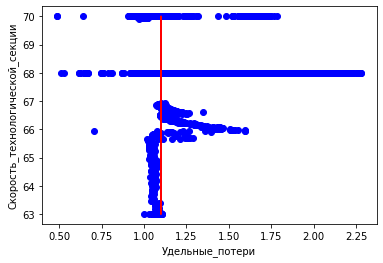

In [ ]:
plt.plot(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, df['–°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏'].values, 'bo')
plt.plot([1.1]*len(df['–°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏']), df['–°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏'].values, 'r')
plt.xlabel('–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏')
plt.ylabel('–°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏')
plt.show()

In [ ]:
df['–°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏_–∫–∞—Ç']=df['–°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏'].apply(lambda x:  '63-65.5' if x < 65.5 else( '65.5-67' if x <67 else( '70' if x > 69.5  else '68')  )         )
df['–°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏_–∫–∞—Ç'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


68         11404
70           696
65.5-67      420
63-65.5      271
Name: –°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏_–∫–∞—Ç, dtype: int64

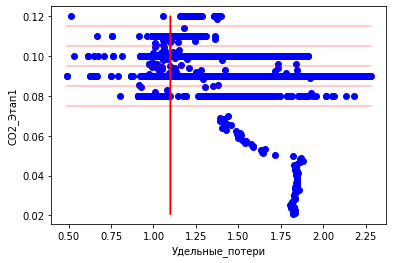

In [ ]:
plt.plot(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, df['CO2_–≠—Ç–∞–ø1'].values, 'bo')
plt.plot([1.1]*len(df['CO2_–≠—Ç–∞–ø1']), df['CO2_–≠—Ç–∞–ø1'].values, 'r')
for j in np.arange (0.075, 0.115, 0.01):
    plt.plot( df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, [j]*len(df['CO2_–≠—Ç–∞–ø1']), 'r', alpha=0.2 )
plt.xlabel('–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏')
plt.ylabel('CO2_–≠—Ç–∞–ø1')
plt.show()

In [ ]:
df['CO2_–≠—Ç–∞–ø1_–∫–∞—Ç']=df['CO2_–≠—Ç–∞–ø1'].apply(lambda x:  '0.02-0.075' if x < 0.075 else  round(x, 2)     )
df['CO2_–≠—Ç–∞–ø1_–∫–∞—Ç'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.1           5741
0.09          5326
0.11           832
0.08           759
0.02-0.075      68
0.12            65
Name: CO2_–≠—Ç–∞–ø1_–∫–∞—Ç, dtype: int64

In [ ]:
df['H2_–≠—Ç–∞–ø1'][df['H2_–≠—Ç–∞–ø1']<65].value_counts()

1.210000     63
42.897561     1
9.099268      1
1.210244      1
1.237317      1
1.694634      1
Name: H2_–≠—Ç–∞–ø1, dtype: int64

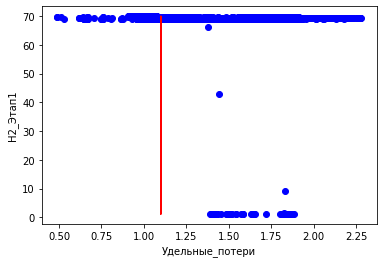

In [ ]:
for i in cat_param[4:5]:
  plt.plot(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, df[i].values, 'bo')
  plt.plot([1.1]*len(df[i]), df[i].values, 'r')
  #for j in np.arange (0.075, 0.115, 0.01):
    #plt.plot( df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, [j]*len(df[i]), 'r')
  plt.xlabel('–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏')
  plt.ylabel(i)
  plt.show()

–ó–¥–µ—Å—å –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Ä–∞–π–æ–Ω–µ –Ω—É–ª—è –æ—á–µ–Ω—å –º–∞–ª–æ. –ò –ø–æ—Å–∫–æ–ª—å–∫—É —ç—Ç–æ –æ—á–µ–Ω—å –Ω–∏–∑–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è,—Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ —ç—Ç–æ –ª–∏–±–æ –æ—à–∏–±–∫–∞ –∏–∑–º–µ—Ä–µ–Ω–∏—è –ª–∏–±–æ –æ—à–∏–±–∫–∞ —Ä–∞–±–æ—Ç—ã –∫–æ–Ω–≤–µ–π–µ—Ä–∞. –ó–¥–µ—Å—å –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É—Ç–æ—á–Ω–∏—Ç—å —É —Ç–µ—Ö–Ω–æ–ª–æ–≥–∞. –ù–æ —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ —ç—Ç–æ –æ—à–∏–±–∫–∏ –∏ –º—ã –º–æ–∂–µ–º —Å—á–∏—Ç–∞—Ç—å —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ –≤—ã–±—Ä–æ—Å–∞–º–∏ –∏ —É–±–µ—Ä–µ–º —ç—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏—è

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


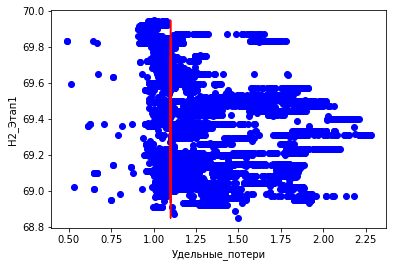

In [ ]:
df['H2_–≠—Ç–∞–ø1']=df['H2_–≠—Ç–∞–ø1'].apply(lambda x:  x if x > 68.5 else np.nan )
plt.plot(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, df['H2_–≠—Ç–∞–ø1'].values, 'bo')
plt.plot([1.1]*len(df['H2_–≠—Ç–∞–ø1']), df['H2_–≠—Ç–∞–ø1'].values, 'r')
  
plt.xlabel('–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏')
plt.ylabel('H2_–≠—Ç–∞–ø1')
plt.show()

–ó–¥–µ—Å—å —É–∂–µ —Å–ª–æ–∂–Ω–µ–µ —Å—á–∏—Ç–∞—Ç—å —ç—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º, –ø—Ä–æ—â–µ –æ—Å—Ç–∞–≤–∏—Ç—å –µ–≥–æ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–º —á–∏—Å–ª–æ–≤—ã–º. –ò–¥–µ–º –¥–∞–ª—å—à–µ

In [ ]:
#cat_param.remove ( 'H2_–≠—Ç–∞–ø1')
num_param.append('H2_–≠—Ç–∞–ø1')

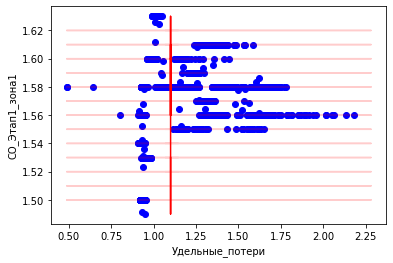

In [ ]:
for i in cat_param[5:6]:
  plt.plot(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, df[i].values, 'bo')
  plt.plot([1.1]*len(df[i]), df[i].values, 'r')
  for j in np.arange (1.5, 1.63, 0.01):
    plt.plot( df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, [j]*len(df[i]),  'r', alpha=0.2)
  plt.xlabel('–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏')
  plt.ylabel(i)
  plt.show()

In [ ]:
df['CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1'].count()

1315

In [ ]:
df['CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1_–∫–∞—Ç']=df['CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1'].apply(lambda x:  '1.5-1.54' if x <= 1.545 else ( '1.61-1.62' if x > 1.61 else round(x, 2)))
df['CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1_–∫–∞—Ç'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1.58         346
1.56         295
1.5-1.54     207
1.6          119
1.61-1.62     71
1.57          71
1.55          70
1.59          70
1.61          66
Name: CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1_–∫–∞—Ç, dtype: int64

–û—á–µ–Ω—å –º–∞–ª–æ –∑–Ω–∞—á–µ–Ω–∏–π, –Ω–æ –∑–∞—Ç–æ –µ—Å—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å. –ü—Ä–∏ –∑–∞–Ω—á–µ–Ω–∏—è—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –º–µ–Ω—å—à–µ 1.55 –Ω–µ—Ç –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –Ω–∏–∑–∫–æ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞. –ù–µ–æ–±—Ö–æ–¥–∏–º–æ —É–∑–Ω–∞—Ç—å —É —Ç–µ—Ö–Ω–æ–ª–æ–≥–∞ –æ –ø—Ä–∏—á–∏–Ω–µ –Ω–∞–ª–∏—á–∏—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –∏ –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ –≤–ª–∏—è–Ω–∏–∏ —ç—Ç–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –Ω–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏. –ö —Å–æ–∂–∞–ª–µ–Ω–∏—é –≤—ã–±–æ—Ä–∫–∞ —Å–ª–∏—à–∫–æ–º –º–∞–ª–∞.

In [ ]:
#cat_param.remove ( 'CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1')

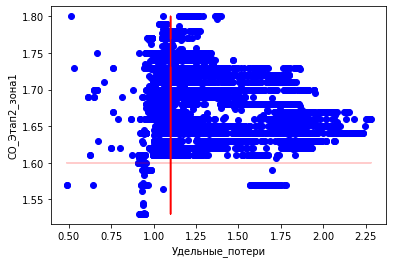

In [ ]:
for i in cat_param[6:7]:
  plt.plot(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, df[i].values, 'bo')
  plt.plot([1.1]*len(df[i]), df[i].values, 'r')
  plt.plot( df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, [1.6]*len(df[i]),  'r', alpha=0.2)
  plt.xlabel('–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏')
  plt.ylabel(i)
  plt.show()

In [ ]:
df['CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1_–∫–∞—Ç']=df['CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1'].apply(lambda x:  '1.5-1.6' if x <= 1.6 else round(x, 2))
df['CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1_–∫–∞—Ç'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1.7        1238
1.73       1180
1.66       1133
1.68        957
1.65        944
1.64        917
1.67        853
1.63        735
1.72        665
1.62        662
1.69        624
1.71        568
1.61        546
1.75        490
1.74        401
1.5-1.6     271
1.77        247
1.78        198
1.8          66
1.79         66
1.76         30
Name: CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1_–∫–∞—Ç, dtype: int64

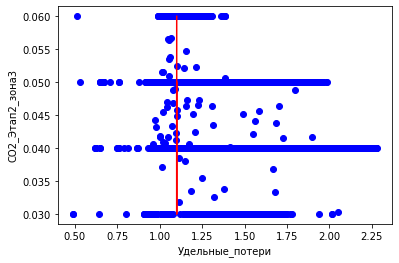

In [ ]:
for i in cat_param[7:8]:
  plt.plot(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, df[i].values, 'bo')
  plt.plot([1.1]*len(df[i]), df[i].values, 'r')
  plt.xlabel('–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏')
  plt.ylabel(i)
  plt.show()

In [ ]:
df['CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3_–∫–∞—Ç']=df['CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3'].apply(lambda x:  round(x, 2))
df['CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3_–∫–∞—Ç'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.04    5596
0.05    5549
0.03     935
0.06     711
Name: CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3_–∫–∞—Ç, dtype: int64

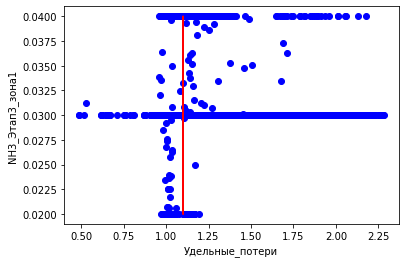

In [ ]:
for i in cat_param[8:9]:
  plt.plot(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, df[i].values, 'bo')
  plt.plot([1.1]*len(df[i]), df[i].values, 'r')
  plt.xlabel('–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏')
  plt.ylabel(i)
  plt.show()

In [ ]:
df['NH3_–≠—Ç–∞–ø3_–∑–æ–Ω–∞1_–∫–∞—Ç']=df['NH3_–≠—Ç–∞–ø3_–∑–æ–Ω–∞1'].apply(lambda x:  round(x, 2) )
df['NH3_–≠—Ç–∞–ø3_–∑–æ–Ω–∞1_–∫–∞—Ç'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.03    11627
0.04      819
0.02      345
Name: NH3_–≠—Ç–∞–ø3_–∑–æ–Ω–∞1_–∫–∞—Ç, dtype: int64

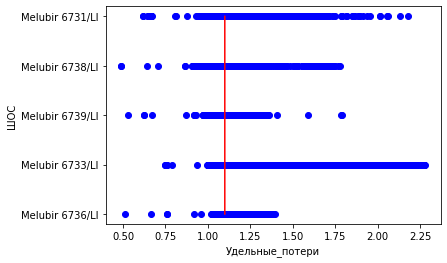

In [ ]:
for i in cat_param[9:10]:
  plt.plot(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, df[i].values, 'bo')
  plt.plot([1.1]*len(df[i]), df[i].values, 'r')
  plt.xlabel('–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏')
  plt.ylabel(i)
  plt.show()

In [ ]:
cat_param = ['–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏', '–°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏_–∫–∞—Ç','–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞','CO2_–≠—Ç–∞–ø1_–∫–∞—Ç',
 'CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1_–∫–∞—Ç', 'CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1_–∫–∞—Ç', 'CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3_–∫–∞—Ç', 'NH3_–≠—Ç–∞–ø3_–∑–æ–Ω–∞1_–∫–∞—Ç']

num_param.append('H2_–≠—Ç–∞–ø1')


unuseful_param=unuseful_param+['–°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏', 'CO2_–≠—Ç–∞–ø1', 'CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1', 'CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1', 'CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3', 'NH3_–≠—Ç–∞–ø3_–∑–æ–Ω–∞1']
unuseful_param

### –ì–∏–ø–æ—Ç–µ–∑–∞ 5 - –î–µ–π—Å—Ç–∏—Ç–µ–ª—å–Ω–æ –ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –≤–µ—â–µ—Å—Ç–≤ –¥–ª—è –æ–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏—è –≤  –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –≥—Ä–∞–Ω–∏—Ü–∞—Ö –¥–∞–µ—Ç –ø–æ–≤—ã—à–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏?

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –≤—ã–±–æ—Ä–∫–∞–º –æ—á–∏—â–µ–Ω–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

–û–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏–µ


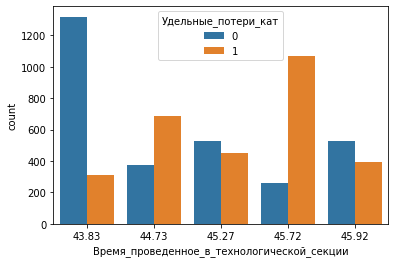

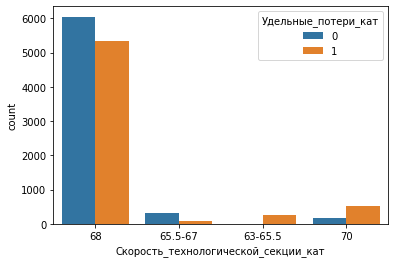

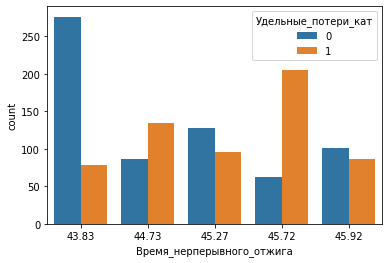

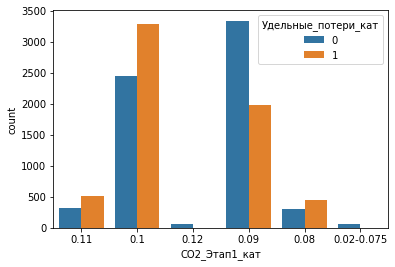

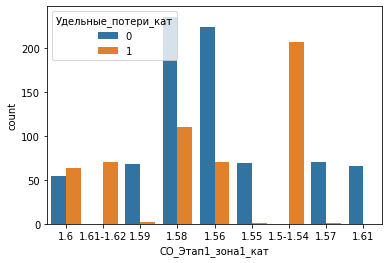

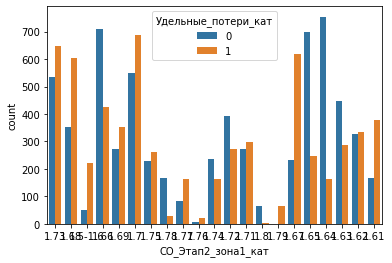

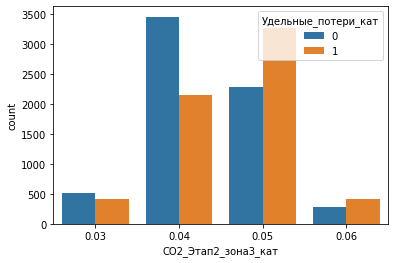

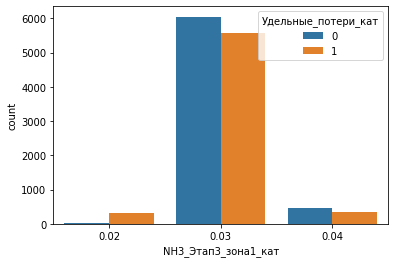

In [ ]:
print ('–û–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏–µ')
for i in cat_param:
  #print ('\n\n',i,'\n',  pd.get_dummies(df[i]).corrwith(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'],  method='spearman') , '\n')
  sns.countplot(x=i, hue="–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç", data=df)
  plt.show()

–ó–¥–µ—Å—å –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –µ—Å—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ö–∏–º–∏—á–µ—Å–∫–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä–µ–∂–∏–º–æ–≤, –ø—Ä–∏ –∫–æ—Ç–æ—Ä—ã—Ö –∫–∞—á–µ—Å—Ç–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –≤—ã–ø—É—Å–∫–∞–µ—Ç—Å—è –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª—å—à–µ –∏ –Ω–∞–æ–±–æ—Ä–æ—Ç.

–í–∏–∑—É–∞–ª—å–Ω–æ –º—ã –≤–∏–¥–∏–º –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏. –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ—Å—á–∏—Ç–∞—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é.
–¢–∞–∫ –∫–∞–∫ —Ç—É—Ç –æ—Ü–µ–Ω–∏–≤–∞–µ–º—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∏ —Ü–µ–ª–µ–≤–æ–π –ø–∞—Ä–∞–º–µ—Ç—Ä –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ, —Ç–æ  –±—É–¥–µ–º —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –ö—Ä–∞–º–µ—Ä–∞

In [ ]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

–ü—Ä–æ–≤–µ—Ä–∏–º –æ–¥–Ω–æ—Å—Ç–æ—Ä–æ–Ω–Ω—É—é –≥–∏–ø–æ—Ç–µ–∑—É H0: p1=p2 
—á—Ç–æ –ø–∞—Ä–∞–º–µ—Ç—Ä N  –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥—É–∫—Ü–∏–∏. 
–ü—Ä–æ—Ç–∏–≤ –¥–≤—É—Ö—Å—Ç–æ—Ä–æ–Ω–Ω–µ–π –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤—ã H1: p1 <> p2 
, —á—Ç–æ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ N –≤–ª–∏—è–µ—Ç –Ω–∞ –∏–∑–º–µ–Ω–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è.

–ò —Å—Ä–∞–∑—É –ø—Ä–æ–≤–µ—Ä–∏–º –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –∫—Ä–∏–µ—Ä–∏–µ–º –•–∏-–∫–≤–∞–¥—Ä–∞—Ç. –£—Å–ª–æ–≤–∏—è –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è —ç—Ç–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è –≤—ã–ø–æ–ª–Ω—è—é—Ç—Å—è: –≤—Å–µ–≥–æ –Ω–µ –º–µ–Ω–µ–µ 40 –ø—Ä–∏–º–µ—Ä–æ–≤ –∏ –≤ –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –Ω–µ –º–µ–Ω–µ–µ 5 –ø—Ä–∏–º–µ—Ä–æ–≤.


In [ ]:
for i in cat_param :
  if i in unuseful_param:
      pass
  else:
    confusion_matrix = pd.crosstab(df [i], df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'])
    print( f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ö—Ä–∞–º–µ—Ä–∞ –¥–ª—è {i}: {cramers_v(confusion_matrix)}")
    chi2, p, dof, ex =stats.chi2_contingency(confusion_matrix)
    print(f"–ü—Ä–æ–≤–µ—Ä–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –•–∏-–∫—Ä–∏–µ—Ç—Ä–∏–µ–º chi2: {chi2} p-value: {p} \n\n")

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ö—Ä–∞–º–µ—Ä–∞ –¥–ª—è –í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏: 0.454020449539797
–ü—Ä–æ–≤–µ—Ä–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –•–∏-–∫—Ä–∏–µ—Ç—Ä–∏–µ–º chi2: 1225.1418248112204 p-value: 5.6454391491431275e-264 


–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ö—Ä–∞–º–µ—Ä–∞ –¥–ª—è –°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏_–∫–∞—Ç: 0.2151013662623421
–ü—Ä–æ–≤–µ—Ä–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –•–∏-–∫—Ä–∏–µ—Ç—Ä–∏–µ–º chi2: 594.7755963924649 p-value: 1.367619358439978e-128 


–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ö—Ä–∞–º–µ—Ä–∞ –¥–ª—è –í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞: 0.39593575981858165
–ü—Ä–æ–≤–µ—Ä–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –•–∏-–∫—Ä–∏–µ—Ç—Ä–∏–µ–º chi2: 200.2730073071202 p-value: 3.282290093055011e-42 


–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ö—Ä–∞–º–µ—Ä–∞ –¥–ª—è CO2_–≠—Ç–∞–ø1_–∫–∞—Ç: 0.22514966730615255
–ü—Ä–æ–≤–µ—Ä–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –•–∏-–∫—Ä–∏–µ—Ç—Ä–∏–µ–º chi2: 653.35583364

–í—ã—Å–æ–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π p-value –Ω–µ—Ç, –≤—Å–µ –≤—ã—á–∏—Å–ª–µ–Ω–Ω—ã–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –∑–Ω–∞—á–∏–º—ã.

–ó–î–µ—Å—å —Å—Ç–æ–∏—Ç –æ—Ç–º–µ—Ç–∏—Ç—å —á—Ç–æ —Ä–∞–∑–Ω–∏—Ü–∞ –≤ –∑–Ω–∞—á–µ–Ω–∏—è—Ö (—Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –º–µ–∂–¥—É –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä 0.11 –∏ 0.12) –Ω–∞—Å—Ç–æ–ª–∫—å–æ –º–∞–ª—ã, —á—Ç–æ –µ—Å—Ç—å —Å–æ–º–Ω–µ–Ω–∏–µ –≤ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Ç–∞–∫–∏–µ –∂–µ—Å—Ç–∫–∏–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è. 

–ö—Ä–æ–º–µ —Ç–æ–≥–æ, –Ω—É–∂–Ω–æ –ø—Ä–æ—Å–ª–µ–¥–∏—Ç—å –ø—É—Ç—å –∫–∞–∂–¥–æ–≥–æ —Ä—É–ª–æ–Ω–∞ –Ω–∞ –∫–∞–∂–¥–æ–º –ø–æ–¥—ç—Ç–∞–ø–µ –¥–æ –∫–æ–Ω–µ—á–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –∏ –ø–æ–ø—ã—Ç–∞—Ç—å—Å—è –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –∏ –æ—Ü–µ–Ω–∏—Ç—å —Å–æ–≤–º–µ—Ç–Ω–æ–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (–º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ä–µ–≥—Ä–µ—Å—Å–∏—é)

## –•–∏–º–∏—è –∏—Ç–æ–≥

–•–∏–º–∏—è –∏—Ç–æ–≥


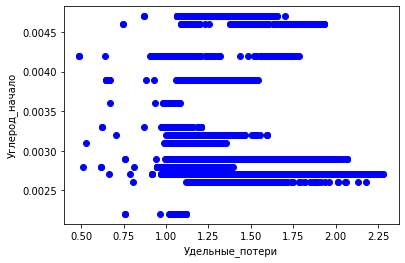

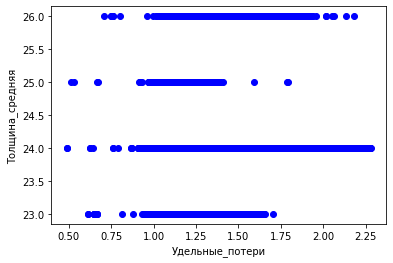

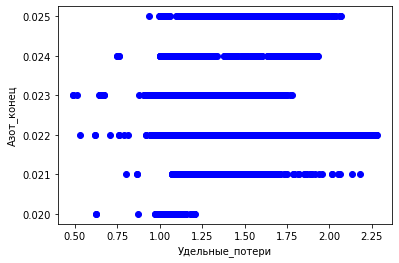

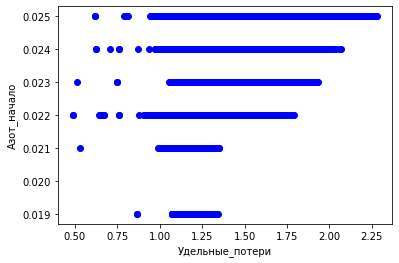

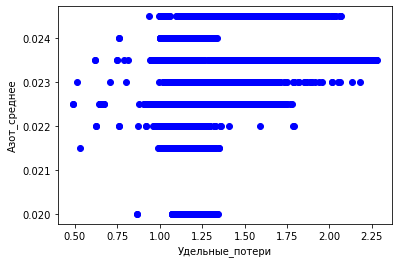

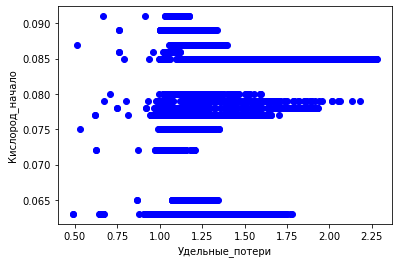

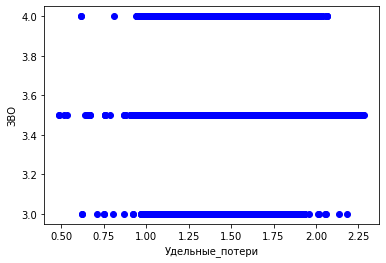

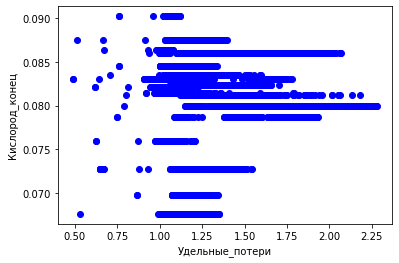

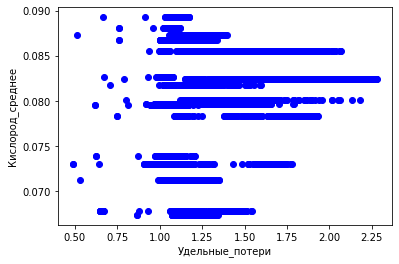

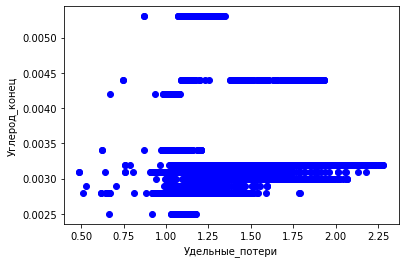

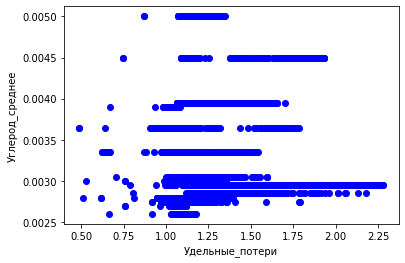

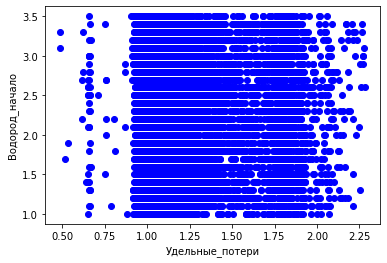

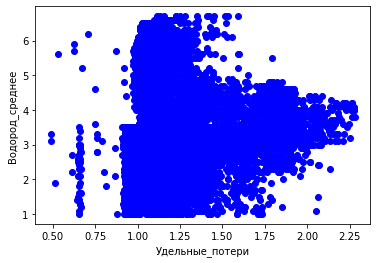

In [ ]:
print ('–•–∏–º–∏—è –∏—Ç–æ–≥')
for i in stages['–•–∏–º–∏—è –∏—Ç–æ–≥']:
  plt.plot(df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'].values, df[i].values, 'bo')
  plt.xlabel('–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏')
  plt.ylabel(i)
  plt.show()

–í—Å–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ, –∫—Ä–æ–º–µ –í–æ–¥—Ä–æ–¥_—Å—Ä–µ–¥–Ω–µ–µ.

–í–æ–ø—Ä–æ—Å : –ß—Ç–æ –∑–Ω–∞—á–∏—Ç '–£–≥–ª–µ—Ä–æ–¥_–Ω–∞—á–∞–ª–æ' –∏ '–£–≥–ª–µ—Ä–æ–¥_–∫–æ–Ω–µ—Ü' –≤—Ä–æ–¥–µ –≤ –æ–ø–∏—Å–∞–Ω–∏–∏ —É–∫–∞–∑–∞–Ω–æ, —á—Ç–æ —ç—Ç–æ –ò—Ç–æ–≥–æ–≤—ã–π —Ö–∏–º–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ —Ä—É–ª–æ–Ω–∞? –ì–¥–µ –∏–ª–∏ –∫–æ–≥–¥–∞ –±–µ—Ä—É—Ç—Å—è —ç—Ç–∏ –∏–∑–º–µ—Ä–µ–Ω–∏—è?


#Get important parameters and stages

–¢–µ–ø–µ—Ä—å —è —Å—á–∏—Ç–∞—é, —á—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –≤–∞—Ä–∏–∞–Ω—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ "–£–¥–µ–ª—å–Ω—ã–µ –ø–æ—Ç–µ—Ä–∏" , –≥–¥–µ 1, –µ—Å–ª–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å < 1.1 –∏ 0, –µ—Å–ª–∏ –≤—ã—à–µ –∏

1. —Å—á–∏—Ç–∞—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –ö—Ä–∞–º–µ—Ä–∞ –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ 

2. —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–º–∏ –æ–∂–∏–¥–∞–Ω–∏—è–º–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –ø—Ä–∏ —É–¥–µ–ª—å–Ω—ã—Ö –ø–æ—Ç–µ—Ä—è—Ö ==1 –∏ == 0 —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ

### Parameters correlation

In [ ]:
cat_param = ['–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏', '–°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏_–∫–∞—Ç','–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞','CO2_–≠—Ç–∞–ø1_–∫–∞—Ç',
 'CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1_–∫–∞—Ç', 'CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1_–∫–∞—Ç', 'CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3_–∫–∞—Ç', 'NH3_–≠—Ç–∞–ø3_–∑–æ–Ω–∞1_–∫–∞—Ç']
cat_param= cat_param+(stages['–•–∏–º–∏—è –ø–ª–∞–≤–∫–∏'] )
cat_param=[i for i in cat_param if i not in unuseful_param]

num_param=list(param['–ù–∞–∑–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞'][param['–ù–æ–º–µ—Ä –ø–ø'].isin(list(range(1,6)))].unique())
num_param= [ i for i in num_param if i not in cat_param + unuseful_param ]
#num_param.append('H2_–≠—Ç–∞–ø1')
'H2_–≠—Ç–∞–ø1' in num_param


True

In [ ]:
df['–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞']= df['–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞'].apply(lambda x: round(x,2))
df['–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏']= df['–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏'].apply(lambda x: round(x,2))
df['–°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏_–∫–∞—Ç']=df['–°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏'].apply(lambda x:  '63-65.5' if x < 65.5 else( '65.5-67' if x <67 else( '70' if x > 69.5  else '68')  )         )
df['CO2_–≠—Ç–∞–ø1_–∫–∞—Ç']=df['CO2_–≠—Ç–∞–ø1'].apply(lambda x:  '0.02-0.075' if x < 0.075 else  round(x, 2)     )
df['H2_–≠—Ç–∞–ø1']=df['H2_–≠—Ç–∞–ø1'].apply(lambda x:  x if x > 68.5 else np.nan )
df['CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1_–∫–∞—Ç']=df['CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1'].apply(lambda x:  '1.5-1.54' if x <= 1.545 else ( '1.61-1.62' if x > 1.61 else round(x, 2)))
df['CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1_–∫–∞—Ç']=df['CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1'].apply(lambda x:  '1.5-1.6' if x <= 1.6 else round(x, 2))
df['CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3_–∫–∞—Ç']=df['CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3'].apply(lambda x:  round(x, 2))
df['NH3_–≠—Ç–∞–ø3_–∑–æ–Ω–∞1_–∫–∞—Ç']=df['NH3_–≠—Ç–∞–ø3_–∑–æ–Ω–∞1'].apply(lambda x:  round(x, 2) )


–í —è—á–µ–π–∫–µ –≤—ã—à–µ –ø–æ—Å—á–∏—Ç–∞–Ω–æ –ø—Ä–∏–º–µ—Ä–Ω–æ–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –∫–∞–∂–¥–æ–≥–æ –∏–∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ä–∞–∑–Ω–∏—Ü—ã —Å—Ä–µ–¥–Ω–∏—Ö:
https://colab.research.google.com/drive/1aHWuDgqt_uuMI31sVJSsu0DNV-NMP6IP#scrollTo=ptojf5NLpt1E&line=2&uniqifier=1

–ò—Å–ø–æ–ª—å–∑—É–µ–º —ç—Ç–æ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ –≤–∫–ª–∞–¥–∞ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã—Ö —á–∏—Å–ª–æ–≤—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π:

### **The most important continual numerical parameters:**

In [ ]:
"""scaler = StandardScaler()
df_scaler = pd.DataFrame(columns=df[num_param].columns,  data=scaler.fit_transform(df[num_param]) )
df_num_quality=pd.concat([df_scaler [num_param] [df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==0 ].mean(), df_scaler [num_param] [df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'] ==1 ].mean()], axis=1 )
df_num_quality['diff']=abs(df_num_quality[0]-df_num_quality[1])
df_num_quality.sort_values('diff', ascending=False, inplace=True)#[df_quality['diff']>1]
print(df_num_quality)"""

In [ ]:
df_quality.loc[num_param, :].sort_values('diff', ascending=False)

0         1      diff
–¢–æ—á–∫–∞_—Ä–æ—Å—ã_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1                 -0.412990  0.493032  0.906022
T_–∫–æ–Ω—Ü–∞_–ø—Ä–æ–∫–∞—Ç–∞                        -0.356240  0.373995  0.730234
H2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞2                         -0.323777  0.339914  0.663690
T_–ø—Ä–æ—Ö–æ–¥_3                             -0.312110  0.327666  0.639776
H2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1                         -0.293313  0.307932  0.601245
...                                          ...       ...       ...
–î–ª–∏–Ω–∞_–ê–∑–æ—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ                     -0.003822  0.004012  0.007834
–¢_–≠—Ç–∞–ø5_–∑–æ–Ω–∞1                          -0.002885  0.003029  0.005915
–ù–∞—Å—Ç—Ä–æ–π–∫–∞_–¥–∞—Ç—á–∏–∫–∞_CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞4       0.001932 -0.002028  0.003960
–°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏        -0.001301  0.001366  0.002667
–ö–∞–ª–∏–±—Ä–æ–≤–∞–Ω–Ω–æ–µ_–∑–Ω–∞—á–µ–Ω–∏–µ_CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞4 -0.000805  0.000845  0.001649

[78 rows x 3 columns]

### **The most important continual categorical parameters:**

–í —è—á–µ–π–∫–∞—Ö –≤—ã—à–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω —Ä–∞—Å—á–µ—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∫ —Ü–µ–ª–µ–≤–æ–º—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—é:
https://colab.research.google.com/drive/1aHWuDgqt_uuMI31sVJSsu0DNV-NMP6IP#scrollTo=yMopOHjO98rf&line=4&uniqifier=1  


–ò—Å–ø–æ–ª—å–∑—É–µ–º —ç—Ç–æ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ –≤–∫–ª–∞–¥–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π:

In [ ]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [ ]:
df_cat_quality=pd.DataFrame(index=cat_param, columns=['Corr'])
df_cat_quality['Corr']= [ cramers_v(pd.crosstab(df [i], df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏_–∫–∞—Ç'])) for i in cat_param]
 
df_cat_quality.sort_values('Corr', ascending=False, inplace=True)
df_cat_quality

Corr
CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1_–∫–∞—Ç                          0.692759
–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏  0.454020
–®–û–°                                         0.436840
Si                                          0.436840
N                                           0.436835
Al                                          0.400151
–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞                   0.395936
Cr                                          0.383334
F                                           0.354483
CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1_–∫–∞—Ç                          0.334607
C                                           0.327819
Ti                                          0.321195
S                                           0.249894
CO2_–≠—Ç–∞–ø1_–∫–∞—Ç                               0.225150
–°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏_–∫–∞—Ç         0.215101
CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3_–∫–∞—Ç                         0.199312
NH3_–≠—Ç–∞–ø3_–∑–æ–Ω–∞1_–∫–∞—Ç                         0.135806
Sn                                          0.055397
Mn                                          0.041321

### Stages correlation

I think here necessary to estimate by median for to account for outliers

In [ ]:
print ('Have a look on the correlation Stages with the target parameter: –£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏ \n' )
importance_stages=pd.DataFrame(index=stages.keys(), columns=['median', 'mean', 'min', 'max'])
for stage in ['–•–æ–ª–æ–¥–Ω—ã–π –ø—Ä–æ–∫–∞—Ç', '–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è','–ì–æ—Ä—è—á–∏–π –ø—Ä–æ–∫–∞—Ç']:
  x=df[stages[stage]].corrwith( df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'])
  importance_stages['median'][stage]=x.median()
  importance_stages['mean'][stage]=x.mean()
  importance_stages['min'][stage]=x.min()
  importance_stages['max'][stage]=x.max()
importance_stages  

Have a look on the correlation Stages with the target parameter: –£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏ 



median         mean        min       max
–ì–æ—Ä—è—á–∏–π –ø—Ä–æ–∫–∞—Ç      0.0700617  0.000676421   -0.32147  0.132616
–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è      -0.00181562    0.0202483 -0.0152398  0.119369
–û–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏–µ         NaN          NaN        NaN       NaN
–•–∏–º–∏—è –ø–ª–∞–≤–∫–∏              NaN          NaN        NaN       NaN
–•–æ–ª–æ–¥–Ω—ã–π –ø—Ä–æ–∫–∞—Ç     -0.131035    -0.119558  -0.376231  0.106784
–•–∏–º–∏—è –∏—Ç–æ–≥                NaN          NaN        NaN       NaN

In [ ]:
print ('Have a look on the correlation with the target parameter: –£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏ \n' )
importance_decarbon=pd.DataFrame(index=decarbonization['–≠—Ç–∞–ø_–æ–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏—è'].unique() , columns=['median', 'mean', 'min', 'max'])
for p in [decarbonization['–≠—Ç–∞–ø_–æ–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏—è'].unique()]:
  
  x=  df[decarbonization['–ù–∞–∑–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞'] [ decarbonization['–≠—Ç–∞–ø_–æ–±–µ–∑—É–≥–ª–µ—Ä–æ–∂–∏–≤–∞–Ω–∏—è'].isin(p) ].to_list()] .corrwith( df['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏'] )
  importance_decarbon['median'][p]=x.median()
  importance_decarbon['mean'][p]=x.mean()
  importance_decarbon['min'][p]=x.min()
  importance_decarbon['max'][p]=x.max()
importance_decarbon  

Have a look on the correlation with the target parameter: –£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏ 



median       mean       min       max
0 -0.00545742 -0.0670091 -0.705928  0.175156
1 -0.00545742 -0.0670091 -0.705928  0.175156
2 -0.00545742 -0.0670091 -0.705928  0.175156
3 -0.00545742 -0.0670091 -0.705928  0.175156
4 -0.00545742 -0.0670091 -0.705928  0.175156
5 -0.00545742 -0.0670091 -0.705928  0.175156

# Detection and delete collinearity features 

Seaborn visualisation the correlation

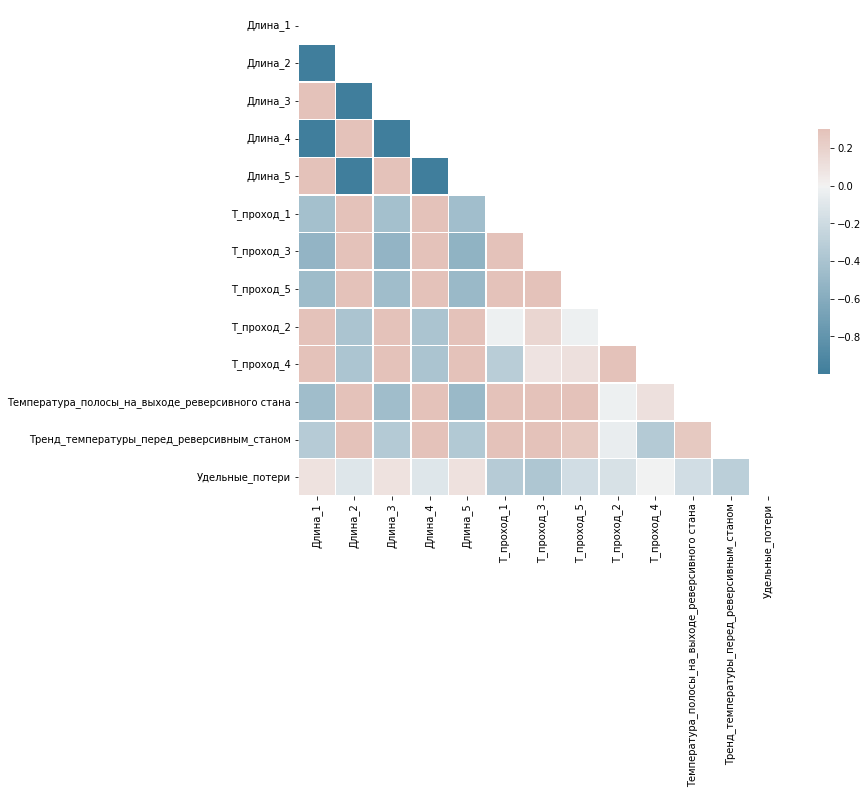

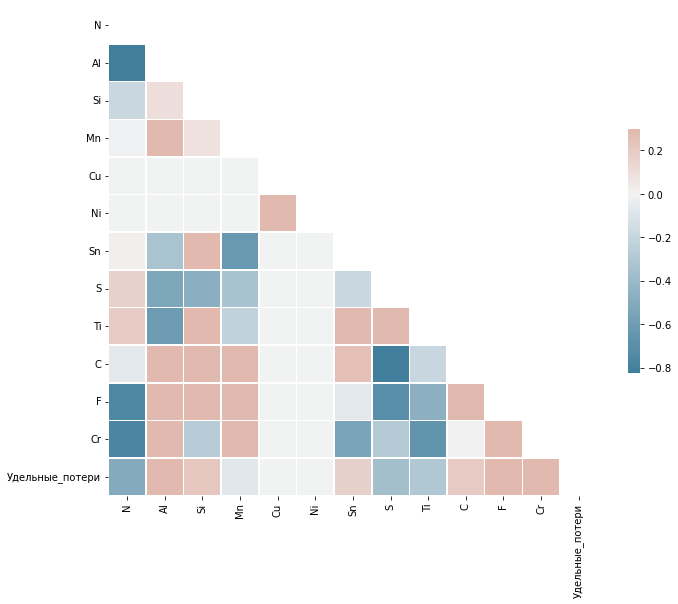

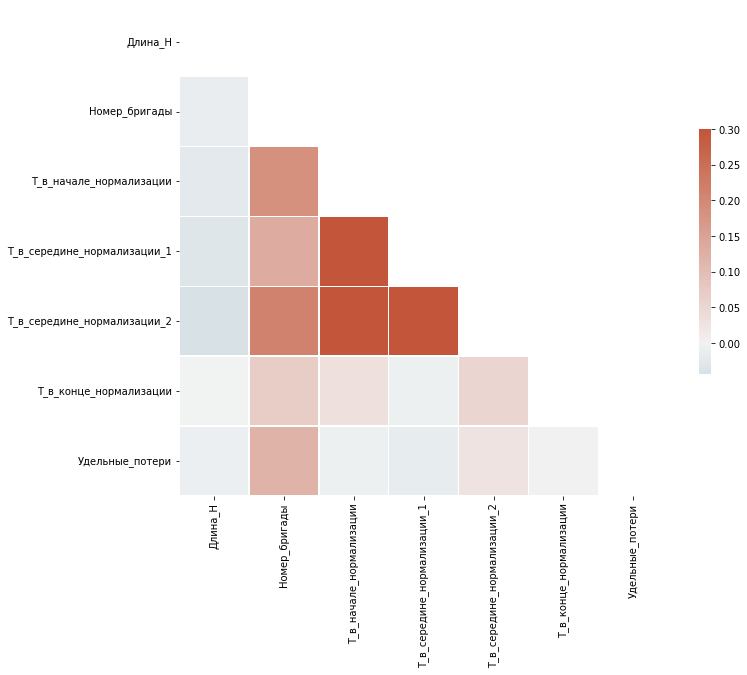

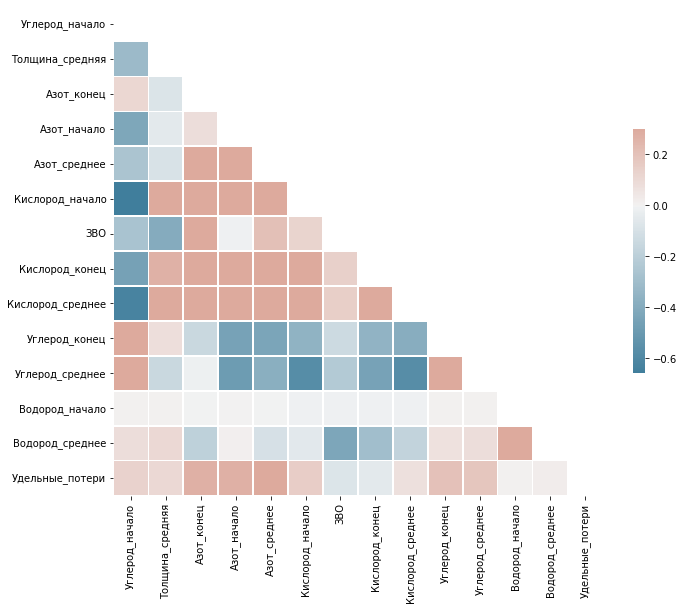

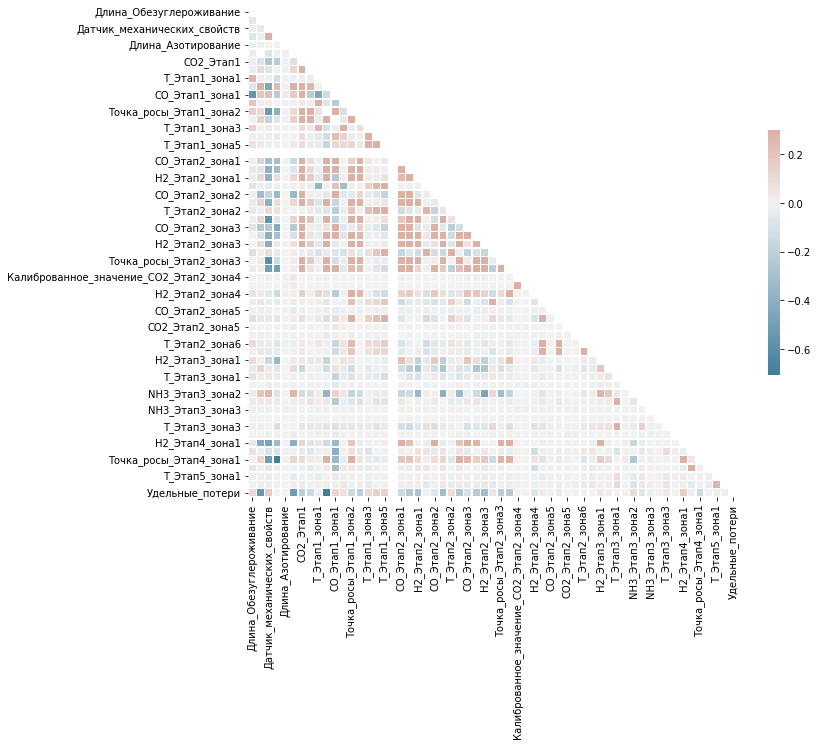

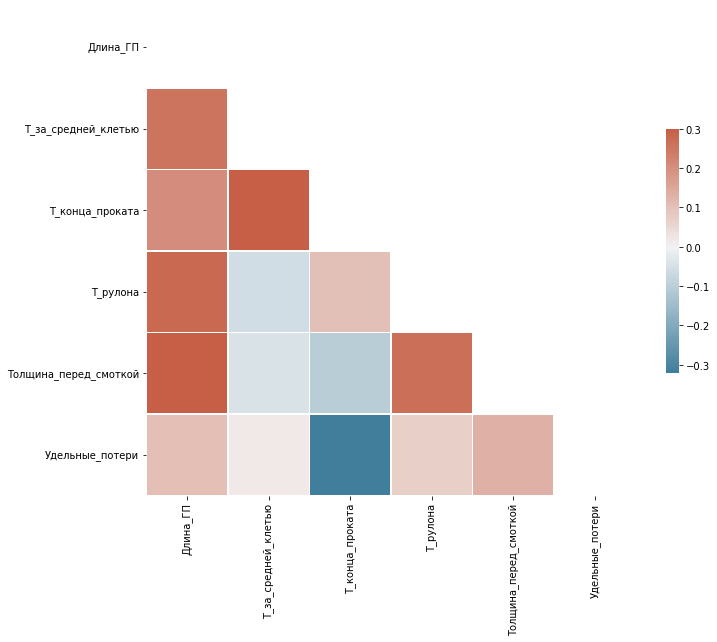

In [ ]:
for stage in stages:
    
 

    # Compute the correlation matrix
    corr = df[stages[stage]+['–£–¥–µ–ª—å–Ω—ã–µ_–ø–æ—Ç–µ—Ä–∏']].corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

# –°onclusions

**–ì–∏–ø–æ—Ç–µ–∑–∞ 1** –î–∞, –¥–æ–ª—è –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∏ –Ω–µ–∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –∑–Ω–∞—á–∏–º–æ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –¥–ª—è —á–∞—Å—Ç–∏ —Ö–∏–º–∏—á–µ—Å–∫–∏—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –ø–ª–∞–≤–∫–∏.
–°–ø–∏—Å–æ–∫ –≤–∞–∂–Ω—ã—Ö:

–ó–î–µ—Å—å —Å—Ç–æ–∏—Ç –æ—Ç–º–µ—Ç–∏—Ç—å —á—Ç–æ —Ä–∞–∑–Ω–∏—Ü–∞ –≤ –∑–Ω–∞—á–µ–Ω–∏—è—Ö (—Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –º–µ–∂–¥—É –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä 0.11 –∏ 0.12) –Ω–∞—Å—Ç–æ–ª–∫—å–æ –º–∞–ª—ã, —á—Ç–æ –µ—Å—Ç—å —Å–æ–º–Ω–µ–Ω–∏–µ –≤ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Ç–∞–∫–∏–µ –∂–µ—Å—Ç–∫–∏–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –Ω–∞ –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–π –¥–ª—è –ø–ª–∞–≤–∫–∏ –º–∞—Ç–µ—Ä–∏–∞–ª.

*–í–æ–ø—Ä–æ—Å –∫ —Ç–µ—Ö–Ω–æ–ª–æ–≥—É: *–ú–æ–∂–Ω–æ –ª–∏ —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –±–æ–ª–µ–µ –∂–µ—Å—Ç–∫–∏–µ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è –∫ —Ö–∏–º–∏—á–µ—Å–∫–æ–º—É —Å–æ—Å—Ç–∞–≤—É –º–µ—Ç–∞—Ä–∏–∞–ª–∞ –¥–ª—è –ø–ª–∞–≤–∫–∏ —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ –¥–µ—Å—è—Ç—ã—Ö –∏ —Å–æ—Ç—ã—Ö?

–ö—Ä–æ–º–µ —Ç–æ–≥–æ, –º–æ–∂–Ω–æ –ø—Ä–æ—Å–ª–µ–¥–∏—Ç—å –ø—É—Ç—å –∫–∞–∂–¥–æ–≥–æ —Å–ª—è–±–∞ –æ—Ç –ø–ª–∞–≤–∫–∏ –¥–æ –∫–æ–Ω–µ—á–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –∏ –ø–æ–ø—ã—Ç–∞—Ç—å—Å—è –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –∏ –æ—Ü–µ–Ω–∏—Ç—å —Å–æ–≤–º–µ—Ç–Ω–æ–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤(—Ä–µ–≥—Ä–µ—Å—Å–∏—è).

–í–∞–∂–Ω–æ—Å—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –Ω–∞ —ç—Ç–æ–º —ç—Ç–∞–ø–µ:
https://colab.research.google.com/drive/1aHWuDgqt_uuMI31sVJSsu0DNV-NMP6IP#scrollTo=yMopOHjO98rf&line=9&uniqifier=1


**–ì–∏–ø–æ—Ç–µ–∑–∞ 2.1 / 3.1** –î–∞, —Å—Ä–µ–¥–Ω–∏–µ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –¥–ª—è –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∏ –Ω–µ–∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏, –∫—Ä–æ–º–µ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –ø—Ä–æ—Ö–æ–¥–∞.
–°–ø–∏—Å–æ–∫ –≤–∞–∂–Ω—ã—Ö:

*–í–æ–ø—Ä–æ—Å –∫ —Ç–µ—Ö–Ω–æ–ª–æ–≥—É: *–í–æ–∑–º–æ–∂–Ω–æ –ª–∏ —É–¥–µ—Ä–∂–∏–≤–∞—Ç—å —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—É –≥–æ—Ä—è—á–µ–≥–æ –ø—Ä–æ–∫–∞—Ç–∞ –∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ –ø—è—Ç–∏ –≥—Ä–∞–¥—É—Å–æ–≤, –¥–æ –≥—Ä–∞–¥—É—Å–∞?

**–ì–∏–ø–æ—Ç–µ–∑–∞ 2.2 / 3.2** 
–ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é, —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω—É—é —Å–∏–ª—É –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ "–î–ª–∏–Ω–∞" —Å —É—á–µ—Ç–æ–º –≤–ª–∏—è–Ω–∏—è –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤—Å–µ—Ö –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.

*–í–æ–ø—Ä–æ—Å –∫ —Ç–µ—Ö–Ω–æ–ª–æ–≥—É:* (–ù–µ –Ω–∞—à–ª–∞ –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ) –ù–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ —Ä—É–ª–æ–Ω—ã –≤—ã–ø—É—Å–∫–∞—é—Ç—Å—è –æ–¥–∏–Ω–∞–∫–æ–≤–æ–π —Ç–æ–ª—â–∏–Ω—ã? –§–∞–∫—Ç —á—Ç–æ –±–æ–ª–µ–µ –∫—Ä—É–ø–Ω—ã–µ –¥–µ—Ç–∞–ª–∏ –æ—Å—Ç—ã–≤–∞—é—Ç –∏ –Ω–∞–≥—Ä–µ–≤–∞—é—Ç—Å—è –º–µ–¥–ª–µ–Ω–Ω–µ–µ, –∑–Ω–∞—á–∏—Ç —Ä–∞–∑–º–µ—Ä –º–æ–∂–µ—Ç –≤–ª–∏—è—Ç—å –Ω–∞ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—É —Ä—É–ª–æ–Ω–∞. –ù–æ –≤–ª–∏—è–µ—Ç –ª–∏ —Ç–æ–ª—å–∫–æ —Ç–æ–ª—â–∏–Ω–∞ —Ä—É–ª–æ–Ω–∞ –∏–ª–∏ –¥—Ä—É–≥–∏–µ –¥–≤–∞ –∏–∑–º–µ—Ä–µ–Ω–∏—è —Ç–æ–∂–µ –æ–∫–∞–∑—ã–≤–∞—é—Ç—Å—è –≤–ª–∏—è–Ω–∏–µ? –ò–Ω—Ç–µ—Ä–µ—Å—É–µ—Ç –º–Ω–µ–Ω–∏–µ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–∞-–ø—Ä–∞–∫—Ç–∏–∫–∞.

–ï—Å–ª–∏ –æ–∫–∞–∂–µ—Ç—Å—è —á—Ç–æ –Ω–∞ —Å–∫–æ—Ä–æ—Å—Ç—å –∏–∑–º–µ–Ω–µ–Ω–∏—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã –≤–Ω—É—Ç—Ä–∏ —Ä—É–ª–æ–Ω–∞ –≤–ª–∏—è–µ—Ç –Ω–µ —Ç–æ–ª—å–∫–æ —Ç–æ–ª—â–∏–Ω–∞, –Ω–æ –∏ –¥—Ä—É–≥–∏–µ –≥–µ–æ–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–µ —Ä–∞–∑–º–µ—Ä—ã, —Ç–æ–≥–¥–∞ –≤—Ç–æ—Ä–æ–π –≤–æ–ø—Ä–æ—Å: –ú–æ–∂–µ—Ç –ª–∏ –Ω–∞—Ä–µ–∑–∫–∞ –Ω–∞ —Ä—É–ª–æ–Ω—ã –æ—Å—É—â–µ—Å—Ç–≤–ª—è—Ç—å—Å—è –ø–æ—Å–ª–µ–¥–∏–º —ç—Ç–∞–ø–æ–º? –ß—Ç–æ –ø—Ä–æ—â–µ –∏ –¥–µ—à–µ–≤–ª–µ - —Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞—Ç—å —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—É –∏–ª–∏ –Ω–∞—Ä–µ–∑–∫—É —Ä—É–ª–æ–Ω–æ–≤?



**–ì–∏–ø–æ—Ç–µ–∑–∞ 4.1** –î–∞, —Å—Ä–µ–¥–Ω–∏–µ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –¥–ª—è –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∏ –Ω–µ–∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏, –∫—Ä–æ–º–µ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –ø—Ä–æ—Ö–æ–¥–∞.
–°–ø–∏—Å–æ–∫ –≤–∞–∂–Ω—ã—Ö:

*–í–æ–ø—Ä–æ—Å –∫ —Ç–µ—Ö–Ω–æ–ª–æ–≥—É:* –í–æ–∑–º–æ–∂–Ω–æ –ª–∏ —É–¥–µ—Ä–∂–∏–≤–∞—Ç—å —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—É —Ö–æ–ª–æ–¥–Ω–æ–≥–æ –ø—Ä–æ–∫–∞—Ç–∞ –∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ –¥–µ—Å—è—Ç–∏ –≥—Ä–∞–¥—É—Å–æ–≤?
–ß—Ç–æ –∑–∞ 4 –¥–ª–∏–Ω—ã? –†–∞–∑–º–µ—Ä—ã –∏–∑–º–µ–Ω—è—é—Ç—Å—è –ø–æ—Å–ª–µ –ø—Ä–æ—Ö–æ–¥–æ–≤?


**–†–µ–π—Ç–∏–Ω–≥ –≤–∞–∂–Ω–æ—Å—Ç–∏ –≤—Å–µ—Ö –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã—Ö —á–∏—Å–ª–æ–≤—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤:**

In [ ]:
#–í–∞–∂–Ω–æ—Å—Ç—å –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã—Ö —á–∏—Å–ª–æ–≤—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤:
df_quality.loc[num_param, ['diff']].sort_values('diff', ascending=False)

diff
–¢–æ—á–∫–∞_—Ä–æ—Å—ã_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1                  0.906022
T_–∫–æ–Ω—Ü–∞_–ø—Ä–æ–∫–∞—Ç–∞                         0.730234
H2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞2                          0.663690
T_–ø—Ä–æ—Ö–æ–¥_3                              0.639776
H2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1                          0.601245
...                                          ...
–î–ª–∏–Ω–∞_–ê–∑–æ—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ                      0.007834
–¢_–≠—Ç–∞–ø5_–∑–æ–Ω–∞1                           0.005915
–ù–∞—Å—Ç—Ä–æ–π–∫–∞_–¥–∞—Ç—á–∏–∫–∞_CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞4       0.003960
–°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏         0.002667
–ö–∞–ª–∏–±—Ä–æ–≤–∞–Ω–Ω–æ–µ_–∑–Ω–∞—á–µ–Ω–∏–µ_CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞4  0.001649

[77 rows x 1 columns]

**–ì–∏–ø–æ—Ç–µ–∑–∞ 5** –ú–Ω–æ–≥–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö. –î–∞, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –≤–µ—â–µ—Å—Ç–≤ –≤ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –≥—Ä–∞–Ω–∏—Ü–∞—Ö –¥–∞–µ—Ç –ø–æ–≤—ã—à–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–¥—É–∫—Ü–∏–∏. –ü–æ—á—Ç–∏ –≤—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ, –Ω—É–∂–¥–∞–ª–∏—Å—å –≤ –æ—á–∏—Å—Ç–∫–µ –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤ (—Å–¥–µ–ª–∞–Ω–æ).
–ù–∞–∏–±–æ–ª–µ–µ –≤–∞–∂–Ω—ã–µ: https://colab.research.google.com/drive/1aHWuDgqt_uuMI31sVJSsu0DNV-NMP6IP#scrollTo=RwYw0J3xtda0&line=5&uniqifier=1


H2_–≠—Ç–∞–ø1 - –ó–¥–µ—Å—å –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Ä–∞–π–æ–Ω–µ –Ω—É–ª—è –æ—á–µ–Ω—å –º–∞–ª–æ. –ò –ø–æ—Å–∫–æ–ª—å–∫—É —ç—Ç–æ –æ—á–µ–Ω—å –Ω–∏–∑–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è,—Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ —ç—Ç–æ –ª–∏–±–æ –æ—à–∏–±–∫–∞ –∏–∑–º–µ—Ä–µ–Ω–∏—è –ª–∏–±–æ –æ—à–∏–±–∫–∞ —Ä–∞–±–æ—Ç—ã –∫–æ–Ω–≤–µ–π–µ—Ä–∞. –ó–¥–µ—Å—å –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É—Ç–æ—á–Ω–∏—Ç—å —É —Ç–µ—Ö–Ω–æ–ª–æ–≥–∞. –ù–æ —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ —ç—Ç–æ –æ—à–∏–±–∫–∏ –∏ –º—ã –º–æ–∂–µ–º —Å—á–∏—Ç–∞—Ç—å —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ –≤—ã–±—Ä–æ—Å–∞–º–∏ –∏ —É–±–µ—Ä–µ–º —ç—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏—è

CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1 -–û—á–µ–Ω—å –º–∞–ª–æ –∑–Ω–∞—á–µ–Ω–∏–π, –Ω–æ –∑–∞—Ç–æ –µ—Å—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å. –ü—Ä–∏ –∑–∞–Ω—á–µ–Ω–∏—è—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –º–µ–Ω—å—à–µ 1.55 –Ω–µ—Ç –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –Ω–∏–∑–∫–æ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞. –ù–µ–æ–±—Ö–æ–¥–∏–º–æ —É–∑–Ω–∞—Ç—å —É —Ç–µ—Ö–Ω–æ–ª–æ–≥–∞ –æ –ø—Ä–∏—á–∏–Ω–µ –Ω–∞–ª–∏—á–∏—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –∏ –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ –≤–ª–∏—è–Ω–∏–∏ —ç—Ç–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –Ω–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏. –ö —Å–æ–∂–∞–ª–µ–Ω–∏—é –≤—ã–±–æ—Ä–∫–∞ —Å–ª–∏—à–∫–æ–º –º–∞–ª–∞.


**–†–µ–π—Ç–∏–Ω–≥ –≤—Å–µ—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤:**

In [ ]:
df_cat_quality

Corr
CO_–≠—Ç–∞–ø1_–∑–æ–Ω–∞1_–∫–∞—Ç                          0.692759
–í—Ä–µ–º—è_–ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ_–≤_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏  0.454020
–®–û–°                                         0.436840
Si                                          0.436840
N                                           0.436835
Al                                          0.400151
–í—Ä–µ–º—è_–Ω–µ—Ä–ø–µ—Ä—ã–≤–Ω–æ–≥–æ_–æ—Ç–∂–∏–≥–∞                   0.395936
Cr                                          0.383334
F                                           0.354483
CO_–≠—Ç–∞–ø2_–∑–æ–Ω–∞1_–∫–∞—Ç                          0.334607
C                                           0.327819
Ti                                          0.321195
S                                           0.249894
CO2_–≠—Ç–∞–ø1_–∫–∞—Ç                               0.225150
–°–∫–æ—Ä–æ—Å—Ç—å_—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π_—Å–µ–∫—Ü–∏–∏_–∫–∞—Ç         0.215101
CO2_–≠—Ç–∞–ø2_–∑–æ–Ω–∞3_–∫–∞—Ç                         0.199312
NH3_–≠—Ç–∞–ø3_–∑–æ–Ω–∞1_–∫–∞—Ç                         0.135806
Sn                                          0.055397
Mn                                          0.041321

## Suggestions

–í–∞–∂–Ω—ã–µ —ç—Ç–∞–ø—ã –∫–æ—Ç–æ—Ä—ã–µ –±—ã–ª–∏ —É–ø—É—â–µ–Ω—ã: 
- –æ—Ü–µ–Ω–∫–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–≥–æ –≤–ª–∏—è–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –Ω–∞ —É–≤–µ–ª–∏—á–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏ (—É—Å–ª–æ–≤–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è)

- –æ—Ü–µ–Ω–∫–∞ 



–û—Ç–±–æ—Ä –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ª–µ–∑–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è ML –º–æ–∂–Ω–æ –æ—Å—É—â–µ—Å—Ç–≤–∏—Ç—å —Ç–∞–∫–∂–µ